In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [48]:
#load table with F1 Scores per column type for small, medium and large train set
#sorted from largest to smalled F1 Score for small train set
f1_scores = pd.read_csv('../../../src/data/data/CSV_files/turl_eval_mode4.csv')
f1_scores

,Columns_combined,Category,Column,per_type_instance,Small_F1_Score,Medium_F1_Score,Large_F1_Score,Unnamed: 7
0,Recipe.nutrition,Recipe,nutrition,2990000,0.9967,0.9967,0.9950,NaN
1,MusicRecording.duration,MusicRecording,duration,10750000,0.9902,0.9949,0.9967,NaN
2,Product.aggregaterating,Product,aggregaterating,16690000,0.9833,0.9886,0.9943,NaN
3,Event.eventattendancemode,Event,eventattendancemode,2420000,0.9796,0.9896,0.9877,NaN
4,Product.offers,Product,offers,36970000,0.9777,0.9859,0.9916,NaN
...,...,...,...,...,...,...,...,...
202,Product.offerdetails,Product,offerdetails,30000,0.0000,0.0000,0.0000,NaN
203,Product.itemlistelement,Product,itemlistelement,20000,0.0000,0.0000,0.6667,NaN
204,LocalBusiness.founder,LocalBusiness,founder,20000,0.0000,0.0000,0.0000,NaN
205,Restaurant.menu,Restaurant,menu,20000,0.0000,0.0000,0.0000,NaN


In [49]:
#sort f1 values by Category
f1_scores = f1_scores.sort_values('Columns_combined')
f1_scores

,Columns_combined,Category,Column,per_type_instance,Small_F1_Score,Medium_F1_Score,Large_F1_Score,Unnamed: 7
87,Book.aggregaterating,Book,aggregaterating,150000,0.7059,0.8125,10000.0000,NaN
128,Book.author,Book,author,590000,0.5345,0.6341,0.7031,NaN
104,Book.bookedition,Book,bookedition,120000,0.6316,0.7619,0.8182,NaN
71,Book.bookformat,Book,bookformat,290000,0.7667,0.8197,0.8621,NaN
95,Book.datepublished,Book,datepublished,460000,0.6471,0.7475,0.8602,NaN
...,...,...,...,...,...,...,...,...
53,Restaurant.servescuisine,Restaurant,servescuisine,510000,0.8081,0.8738,0.9320,NaN
105,Restaurant.telephone,Restaurant,telephone,610000,0.6304,0.8319,0.8718,NaN
150,TVEpisode.episodenumber,TVEpisode,episodenumber,140000,0.3590,0.5806,0.9630,NaN
96,TVEpisode.name,TVEpisode,name,310000,0.6441,0.8276,0.9333,NaN


In [50]:
# load list of error tables in large dataset

large_errors = ['Product_kingsun.com.vn_September2020.json.gz', 'Product_boticas23.com_September2020.json.gz', 'Product_genuineoempartsdirect.com_September2020.json.gz', 'Product_banisternissanofchesapeake.com_September2020.json.gz', 'Product_angelmania.net_September2020.json.gz', 'Product_allabout-cherokee.com_September2020.json.gz', 'Product_tradeboilerparts.co.uk_September2020.json.gz', 'Recipe_ozlemsturkishtable.com_September2020.json.gz', 'Event_centercityjews.org_September2020.json.gz', 'CreativeWork_tel-group.com_September2020.json.gz', 'Recipe_homestylefoodandfitness.com_September2020.json.gz', 'Product_thailand-villas.com_September2020.json.gz', 'Person_lee-funeralhomes.com_September2020.json.gz', 'CreativeWork_wellingtoncoloradochamber.net_September2020.json.gz', 'CreativeWork_halterofiliabarcelona.com_September2020.json.gz', 'Product_fabbmatic.com_September2020.json.gz', 'Product_fantastichumanhair.com_September2020.json.gz', 'CreativeWork_nextplora.com_September2020.json.gz', 'Recipe_foodrecipeshub.com_September2020.json.gz', 'Hotel_villasmarrakech.com_September2020.json.gz', 'Product_donghovang.net_September2020.json.gz', 'Recipe_mexicanplease.com_September2020.json.gz', 'CreativeWork_inspire-create.com_September2020.json.gz', 'Product_gusti-leather.co.uk_September2020.json.gz', 'Event_classicmelbourne.com.au_September2020.json.gz', 'Event_permiankids.com_September2020.json.gz', 'Product_splitticketing.com_September2020.json.gz', 'Product_ladybaileycaravans.co.uk_September2020.json.gz', 'Product_ekkip.com_September2020.json.gz', 'Product_blackrapid.com_September2020.json.gz', 'Product_quat-rues.com_September2020.json.gz', 'Person_westernsouthern.com_September2020.json.gz', 'Product_beelinebicycles.co.uk_September2020.json.gz', 'Event_gunshowtrader.com_September2020.json.gz', 'Product_raymondtravel.co.uk_September2020.json.gz', 'Person_agg.com_September2020.json.gz', 'Product_edwards-jewelers.com_September2020.json.gz', 'Person_mitchellwhale.com_September2020.json.gz', 'Recipe_pressurecookrecipes.com_September2020.json.gz', 'Recipe_myxxrecipes.com_September2020.json.gz', 'Person_fkks.com_September2020.json.gz', 'Product_rivercityauto.com_September2020.json.gz', 'Product_katiejdesignandevents.com.au_September2020.json.gz', 'CreativeWork_ajaja.com.br_September2020.json.gz', 'Event_iitpsa.org.za_September2020.json.gz', 'Recipe_pmqfortwo.com_September2020.json.gz', 'Product_troledejeux.com_September2020.json.gz', 'Product_playground.com.cn_September2020.json.gz', 'Product_flowers4lisbon.com_September2020.json.gz', 'Event_yourfortdodge.com_September2020.json.gz', 'Product_subaruofwinchester.com_September2020.json.gz', 'Event_playmatches.com_September2020.json.gz', 'Product_smokonow.com_September2020.json.gz', 'Product_4thandreckless.com_September2020.json.gz', 'Product_hytest.com_September2020.json.gz', 'Product_opumo.com_September2020.json.gz', 'Product_uktoolcentre.co.uk_September2020.json.gz', 'Product_toyotaofnashua.com_September2020.json.gz', 'Product_simpleecards.com_September2020.json.gz', 'Product_your-outfit.com_September2020.json.gz', 'Product_thegoodchic.com_September2020.json.gz', 'Product_flowers4medina.com_September2020.json.gz', 'Product_highpaceenterprises.com_September2020.json.gz', 'Product_track-motor.com_September2020.json.gz', 'MusicAlbum_djyoungster.org_September2020.json.gz', 'Product_welcomeorganics.com.au_September2020.json.gz', 'Product_advancedtoolcorp.com_September2020.json.gz', 'LocalBusiness_alwaysbestcare.com_September2020.json.gz', 'CreativeWork_developeasy.com_September2020.json.gz', 'Event_gastein.com_September2020.json.gz', 'Person_homeswithlopez.com_September2020.json.gz', 'Product_esportsgear.uk_September2020.json.gz', 'Product_ultracleanservicesgoldcoast.com.au_September2020.json.gz', 'Person_camsfinder.com_September2020.json.gz', 'CreativeWork_experiencesalonstudios.com_September2020.json.gz', 'MusicRecording_geoffrobb.com_September2020.json.gz', 'Product_strapsco.com_September2020.json.gz', 'Product_ohiospeedshops.com_September2020.json.gz', 'Product_keratinbeauty.com_September2020.json.gz', 'Recipe_sousvideways.com_September2020.json.gz', 'Event_wackenbus.com_September2020.json.gz', 'Product_lucrin.co.uk_September2020.json.gz', 'Product_mastermachineryllc.com_September2020.json.gz', 'Product_gmemployeepartsdiscount.com_September2020.json.gz', 'CreativeWork_gapsaustralia.com.au_September2020.json.gz', 'CreativeWork_200forums.com_September2020.json.gz', 'CreativeWork_gta5-mods.com_September2020.json.gz', 'CreativeWork_monstersconcrete.com_September2020.json.gz', 'CreativeWork_silikal.com_September2020.json.gz', 'Product_vwoaklawn.com_September2020.json.gz', 'Product_amycoz.com_September2020.json.gz', 'CreativeWork_titosvodka.com_September2020.json.gz', 'Product_myla.com_September2020.json.gz', 'Product_houseandhold.com_September2020.json.gz', 'Recipe_ahealthysliceoflife.com_September2020.json.gz', 'CreativeWork_massageplanet.net_September2020.json.gz', 'Recipe_thebakingwizard.com_September2020.json.gz', 'Person_captainvet.com_September2020.json.gz', 'Product_cityxplora.com_September2020.json.gz', 'Product_bitek.com.tw_September2020.json.gz', 'Recipe_recipeszone.net_September2020.json.gz', 'Recipe_cookingclassy.com_September2020.json.gz', 'Product_touchlcdhouse.com_September2020.json.gz', 'LocalBusiness_pmrecoverysystems.com_September2020.json.gz', 'Event_luthercourt.org_September2020.json.gz', 'Person_expertbase.org_September2020.json.gz', 'Recipe_bakersroyale.com_September2020.json.gz', 'Product_officialmemorabilia.com.au_September2020.json.gz', 'Product_solovela.net_September2020.json.gz', 'Product_progressyourhealth.com_September2020.json.gz', 'Product_mosaicnatural.com_September2020.json.gz', 'Product_emarinepx.com_September2020.json.gz', 'Product_emckay.com_September2020.json.gz', 'Product_oxfordmillsoutlet.com_September2020.json.gz', 'Person_missionfamilymortuary.com_September2020.json.gz', 'Product_xposed.com.au_September2020.json.gz', 'Event_vceonline.com_September2020.json.gz', 'Hotel_travital.com_September2020.json.gz', 'Product_karaca-home.com_September2020.json.gz', 'Recipe_worldfoodtour.co.uk_September2020.json.gz', 'Event_mobilelifetoday.com_September2020.json.gz', 'Product_prolocktoolstorage.com_September2020.json.gz', 'Recipe_pachakam.com_September2020.json.gz', 'CreativeWork_buzzfrag.com_September2020.json.gz', 'LocalBusiness_filmshasta.com_September2020.json.gz', 'Product_pterodactyl-addons.com_September2020.json.gz', 'CreativeWork_allatus.co.uk_September2020.json.gz', 'Event_hrcertpreppros.com_September2020.json.gz', 'Product_eastcoastmoparts.com_September2020.json.gz', 'Product_nissanofvictoria.com_September2020.json.gz', 'MusicRecording_queencityjazzband.com_September2020.json.gz', 'Recipe_albioncafes.com_September2020.json.gz', 'Product_hillwebcreations.com_September2020.json.gz', 'Product_chubbiesshorts.com_September2020.json.gz', 'Product_basenotes.net_September2020.json.gz', 'CreativeWork_k-bikes.com_September2020.json.gz', 'Product_de-atramentis.com_September2020.json.gz', 'Event_studiosixtytwo.co.uk_September2020.json.gz', 'Product_canvastsupplyco.com_September2020.json.gz', 'CreativeWork_agtp.org_September2020.json.gz', 'Product_primeclassicdesign.com_September2020.json.gz', 'Recipe_versatilefoodie.com_September2020.json.gz', 'Product_treekeeperbag.com_September2020.json.gz', 'Hotel_charmingitaly.com_September2020.json.gz', 'Product_milkncookiez.com_September2020.json.gz', 'Product_flowers4milan.com_September2020.json.gz', 'Event_clownaroundinc.com_September2020.json.gz', 'Product_lightsdaddy.com_September2020.json.gz', 'Product_tickets.co.uk_September2020.json.gz', 'Event_mitchhayesmusic.com_September2020.json.gz', 'Product_augustaloja.com_September2020.json.gz', 'Product_ashaybythebay.com_September2020.json.gz', 'Product_zebraz.com_September2020.json.gz', 'Product_twinset.com_September2020.json.gz', 'Product_everythingtrackandfield.com_September2020.json.gz', 'Product_hometreatsuk.com_September2020.json.gz', 'CreativeWork_clinicadeolhosfernandes.com.br_September2020.json.gz', 'Recipe_dinnerplanner.com_September2020.json.gz', 'Person_tidelandshealth.org_September2020.json.gz', 'CreativeWork_clcpublications.com_September2020.json.gz', 'Product_tyrepoint.com.au_September2020.json.gz', 'Product_adnams.co.uk_September2020.json.gz', 'Person_nalderfuneralhome.com_September2020.json.gz', 'Product_compendiumstore.com_September2020.json.gz', 'Product_northstarfox.com_September2020.json.gz', 'Product_bulktoystore.com_September2020.json.gz', 'Product_gsmzone.co.uk_September2020.json.gz', 'Product_perfumesonline.com.mx_September2020.json.gz', 'Product_ar15discounts.com_September2020.json.gz', 'Event_chrcsf.org_September2020.json.gz', 'Restaurant_theinfatuation.com_September2020.json.gz', 'Product_nonstophype.com_September2020.json.gz', 'Product_miccys.com_September2020.json.gz', 'CreativeWork_nettl.com_September2020.json.gz', 'Recipe_completerecipes.com_September2020.json.gz', 'Product_scrapbooking-warehouse.com_September2020.json.gz', 'Product_brambletonimports.com_September2020.json.gz', 'Product_kuyhaacrack.com_September2020.json.gz', 'Product_famouschairs.com_September2020.json.gz', 'CreativeWork_fractracker.org_September2020.json.gz', 'CreativeWork_santoshumaninc.com_September2020.json.gz', 'Recipe_jonesdairyfarm.com_September2020.json.gz', 'Product_archibalds.net_September2020.json.gz', 'Event_healingspiritwithlove.com_September2020.json.gz', 'CreativeWork_butterwick.org.uk_September2020.json.gz', 'Event_seedlingproductions.org_September2020.json.gz', 'Product_gypsyrockco.com_September2020.json.gz', 'Product_awoodidea.co.uk_September2020.json.gz', 'Recipe_gracehillbandb.com_September2020.json.gz', 'Product_jugais.com_September2020.json.gz', 'Product_sieuthihangmy.com.vn_September2020.json.gz', 'Product_bobcatarmament.com_September2020.json.gz', 'Product_youbuyitall.com_September2020.json.gz', 'Event_businessimpactnw.org_September2020.json.gz', 'Product_onadas.com_September2020.json.gz', 'Hotel_hotellook.com.au_September2020.json.gz', 'Product_buykamagraonline.net_September2020.json.gz', 'Recipe_lowcarberista.com_September2020.json.gz', 'Product_hoppier.com_September2020.json.gz', 'Product_mysecuritysign.com_September2020.json.gz', 'Event_ipwatchdog.com_September2020.json.gz', 'Person_edmiston.com_September2020.json.gz', 'Product_islandgirlhome.com_September2020.json.gz', 'Product_durangokia.com_September2020.json.gz', 'Event_unitedstatesbowlingacademy.com_September2020.json.gz', 'Product_emulateclothing.co.uk_September2020.json.gz', 'CreativeWork_themefuse.com_September2020.json.gz', 'CreativeWork_efbrett.com_September2020.json.gz', 'Event_feltbetter.com_September2020.json.gz', 'Restaurant_bookatable.co.uk_September2020.json.gz', 'Product_boogemes.com_September2020.json.gz', 'Product_miasoulmarket.com_September2020.json.gz', 'Product_thatawesomeshirt.com_September2020.json.gz', 'Event_goldendragontkd.com_September2020.json.gz', 'CreativeWork_challengertalk.com_September2020.json.gz', 'Restaurant_courtepaille.com_September2020.json.gz', 'Product_eastdallasdiesel.com_September2020.json.gz', 'CreativeWork_shikwaru-adventures.com_September2020.json.gz', 'Recipe_mydarlingvegan.com_September2020.json.gz', 'Product_helvetin16.com_September2020.json.gz', 'CreativeWork_xploraalmeria.com_September2020.json.gz', 'Product_navonejewelry.com_September2020.json.gz', 'MusicRecording_alechershey.com_September2020.json.gz', 'Product_simplycheese.net_September2020.json.gz', 'Recipe_completelyketo.com_September2020.json.gz', 'Event_suncresttownecentrewv.com_September2020.json.gz', 'Product_fencescreen.com_September2020.json.gz', 'Person_carepirates.com_September2020.json.gz', 'Product_prodryers.com_September2020.json.gz', 'Product_shop4de.com_September2020.json.gz', 'Product_earnhardtvw.com_September2020.json.gz', 'Product_rockillos.com_September2020.json.gz', 'Person_gentrylocke.com_September2020.json.gz', 'Product_mapcards.net_September2020.json.gz', 'LocalBusiness_ggjeans.com_September2020.json.gz', 'Recipe_nyonyacooking.com_September2020.json.gz', 'CreativeWork_rdv360.com_September2020.json.gz', 'Recipe_itsahero.com_September2020.json.gz', 'Product_diftech.com_September2020.json.gz', 'Product_thehouseofeunice.com_September2020.json.gz', 'Product_educator.com_September2020.json.gz', 'LocalBusiness_steinbachchamber.com_September2020.json.gz', 'Event_theoldbarge.com_September2020.json.gz', 'Product_flowers4bonaire.com_September2020.json.gz', 'CreativeWork_grabo-balloons.com_September2020.json.gz', 'Product_adulttoystore.com.au_September2020.json.gz', 'Product_wallface-shop.com_September2020.json.gz', 'CreativeWork_volvov40club.com_September2020.json.gz', 'Product_thefogworks.co.uk_September2020.json.gz', 'Product_piperloucollection.com_September2020.json.gz', 'Product_flowers4rabat.com_September2020.json.gz', 'Product_madsonofamerica.com_September2020.json.gz', 'Product_smartairflights.com_September2020.json.gz', 'Product_elizabetharden.com_September2020.json.gz', 'Product_joyeehottub.com_September2020.json.gz', 'Product_otterbox.com_September2020.json.gz', 'CreativeWork_astrologomurcia.com_September2020.json.gz', 'CreativeWork_240sxforums.com_September2020.json.gz', 'CreativeWork_vheadline.com_September2020.json.gz', 'Person_remax-cite.com_September2020.json.gz', 'Product_autolider.org_September2020.json.gz', 'Product_scrubs-express.com_September2020.json.gz', 'Event_clf-church.com_September2020.json.gz', 'Product_portuguesetiles.co.uk_September2020.json.gz', 'Product_beautyforashesnepal.com_September2020.json.gz', 'Product_littlethingsme.com_September2020.json.gz', 'Product_thewomandress.com_September2020.json.gz', 'Product_landroverhinsdale.com_September2020.json.gz', 'Product_orgonitepower.com_September2020.json.gz', 'Event_fortworthchamber.com_September2020.json.gz', 'CreativeWork_digital-eliteboard.com_September2020.json.gz', 'CreativeWork_proactivesafetyservices.com_September2020.json.gz', 'Product_everybodysrecords.com_September2020.json.gz', 'Product_ratedbystudents.com_September2020.json.gz', 'Hotel_goodwoodparkhotel.com_September2020.json.gz', 'Product_topserverparts.com_September2020.json.gz', 'Hotel_laostravel.net_September2020.json.gz', 'Product_rcm-creations.com_September2020.json.gz', 'Product_ki-essentials.com_September2020.json.gz', 'Product_zapaka.co.uk_September2020.json.gz', 'CreativeWork_yellowbullet.com_September2020.json.gz', 'Product_elitemodelsonline.co.uk_September2020.json.gz', 'Product_accessdoorsandpanels.com_September2020.json.gz', 'CreativeWork_gandhiisthatyou.com_September2020.json.gz', 'Product_codecanyon.net_September2020.json.gz', 'Event_beardedeagle.com_September2020.json.gz', 'Recipe_nursekristin.org_September2020.json.gz', 'LocalBusiness_homeandgardennj.com_September2020.json.gz', 'Event_bvuuf.org_September2020.json.gz', 'Recipe_minamade.com_September2020.json.gz', 'LocalBusiness_mclanegloballogistics.com_September2020.json.gz', 'Recipe_hellofresh.co.uk_September2020.json.gz', 'Recipe_backtomysouthernroots.com_September2020.json.gz', 'MusicRecording_florbromleymusic.com_September2020.json.gz', 'Recipe_simplerecipes.net_September2020.json.gz', 'Product_dinazahstore.com_September2020.json.gz', 'Product_skylineautosalesandleasing.com_September2020.json.gz', 'CreativeWork_treizedegres.com_September2020.json.gz', 'Product_bargainmax.co.uk_September2020.json.gz', 'Product_trafficsafetystore.com_September2020.json.gz', 'Product_airfreshenershop.com_September2020.json.gz', 'Recipe_cookingandme.com_September2020.json.gz', 'Product_bestpassionzone.com_September2020.json.gz', 'Recipe_thegelatolife.com_September2020.json.gz', 'LocalBusiness_escapehunt.com_September2020.json.gz', 'CreativeWork_rotbesho.com_September2020.json.gz', 'Product_c-in2.com_September2020.json.gz', 'CreativeWork_hamtramckfirefighters.com_September2020.json.gz', 'Product_lw-wholesale.com_September2020.json.gz', 'Product_rmstator.com_September2020.json.gz', 'Recipe_midgetmomma.com_September2020.json.gz', 'Product_garagedoorrepairdfw.com_September2020.json.gz', 'Event_fabfempreneurs.com_September2020.json.gz', 'Product_verbling.com_September2020.json.gz', 'Product_tylershonda.com_September2020.json.gz', 'Event_occainfo.org_September2020.json.gz', 'CreativeWork_fluffycarpets.com_September2020.json.gz', 'MusicRecording_adrianbourgeois.com_September2020.json.gz', 'Recipe_nutritionstripped.com_September2020.json.gz', 'Product_mikewardinfiniti.com_September2020.json.gz', 'Product_teacherspayteachers.com_September2020.json.gz', 'Product_partyonusa.com_September2020.json.gz', 'CreativeWork_brosilab.org_September2020.json.gz', 'CreativeWork_craftingagreenworld.com_September2020.json.gz', 'MusicRecording_customanthems.com_September2020.json.gz', 'CreativeWork_paincaremassage.co.uk_September2020.json.gz', 'Product_recyclingproductnews.com_September2020.json.gz', 'Product_royalhamam.com_September2020.json.gz', 'CreativeWork_apronsandsmocks.com_September2020.json.gz', 'Product_globalbix.com_September2020.json.gz', 'Product_ruskinclothing.co.uk_September2020.json.gz', 'Product_berndes.com_September2020.json.gz', 'CreativeWork_montillamorileswines.com_September2020.json.gz', 'Product_brickinsights.com_September2020.json.gz', 'CreativeWork_xenforo.com_September2020.json.gz', 'Product_ultrasound-scanners.co.uk_September2020.json.gz', 'Event_ahotu.com_September2020.json.gz', 'CreativeWork_baykee.com.au_September2020.json.gz', 'TVEpisode_robforthesecond.com_September2020.json.gz', 'Recipe_roshnisanghvi.com_September2020.json.gz', 'Product_shopnelly.com_September2020.json.gz', 'Hotel_scandichotels.com_September2020.json.gz', 'Product_wallaceallan.co.uk_September2020.json.gz', 'LocalBusiness_shepherdexpress.com_September2020.json.gz', 'Product_pacaconciergerie.com_September2020.json.gz', 'Product_tube-brush.co.uk_September2020.json.gz', 'Product_thirdrockadventures.com_September2020.json.gz', 'Product_urbandecay.co.uk_September2020.json.gz', 'Product_pranacrystals.com_September2020.json.gz', 'Product_modcover.com_September2020.json.gz', 'Product_flourconfections.com_September2020.json.gz', 'Product_qdossound.com_September2020.json.gz', 'Product_hoyvw.com_September2020.json.gz', 'Product_tallengestore.com_September2020.json.gz', 'Product_1ststopautosales.net_September2020.json.gz', 'Product_theriversideoutlet.com_September2020.json.gz', 'CreativeWork_demidenko.net_September2020.json.gz', 'Product_lothinc.com_September2020.json.gz', 'CreativeWork_turbododge.com_September2020.json.gz', 'CreativeWork_azahner.com_September2020.json.gz', 'CreativeWork_mtopconsulting.com_September2020.json.gz', 'Recipe_mygermantable.com_September2020.json.gz', 'Product_dxracer-europe.com_September2020.json.gz', 'Product_stamptitude.com_September2020.json.gz', 'CreativeWork_piditalia.com_September2020.json.gz', 'MusicRecording_cryptofinsomnia.com_September2020.json.gz', 'Event_analyticsleaderssummit.com_September2020.json.gz', 'Product_foodspring.co.uk_September2020.json.gz', 'Product_beerwulf.com_September2020.json.gz', 'MusicRecording_cocanha.net_September2020.json.gz', 'Event_firedupbranford.com_September2020.json.gz', 'Product_stonesbones.com_September2020.json.gz', 'Product_annavasily.com.au_September2020.json.gz', 'MusicAlbum_somusica10.com_September2020.json.gz', 'Product_keyeslexus.com_September2020.json.gz', 'Event_thegardenscemetery.org_September2020.json.gz', 'Product_badeanstalten.com_September2020.json.gz', 'CreativeWork_contractorstoday.com_September2020.json.gz', 'Person_wealthresult.com_September2020.json.gz', 'Product_touchtitanium.com_September2020.json.gz', 'Product_eutrade-shop.com_September2020.json.gz', 'Product_inviastore.com_September2020.json.gz', 'LocalBusiness_theweddingcarhirepeople.co.uk_September2020.json.gz', 'Product_garagistic.com_September2020.json.gz', 'Event_hvartscouncil.org_September2020.json.gz', 'MusicAlbum_garyalt.com_September2020.json.gz', 'Product_pestrepellerultimate.co.uk_September2020.json.gz', 'Event_njbasketballhq.com_September2020.json.gz', 'Event_rikemmett.com_September2020.json.gz', 'Product_grayseofficial.com_September2020.json.gz', 'Product_lindadress.com_September2020.json.gz', 'Product_palmcentre.co.uk_September2020.json.gz', 'CreativeWork_beautifulrugs.com_September2020.json.gz', 'Product_mabv-machineries.com_September2020.json.gz', 'Product_lamourshoes.com_September2020.json.gz', 'CreativeWork_supplygymequipment.com_September2020.json.gz', 'Product_russiangost.com_September2020.json.gz', 'Product_riaumobil.com_September2020.json.gz', 'CreativeWork_in2adventure.com.au_September2020.json.gz', 'Product_bulkcctvstore.com_September2020.json.gz', 'Product_shinola.com_September2020.json.gz', 'Event_ourfaithourworks.org_September2020.json.gz', 'CreativeWork_worldwide-invest.org_September2020.json.gz', 'LocalBusiness_peggysage.com_September2020.json.gz', 'CreativeWork_purplemktg.co.uk_September2020.json.gz', 'Product_cosmetize.com_September2020.json.gz', 'Product_wowhd.co.uk_September2020.json.gz', 'CreativeWork_flashcutcnc.com_September2020.json.gz', 'CreativeWork_vn750.com_September2020.json.gz', 'LocalBusiness_discovereaston.com_September2020.json.gz', 'Product_primeauxmitsubishi.com_September2020.json.gz', 'Recipe_cejavineyards.com_September2020.json.gz', 'Product_4football.com.ua_September2020.json.gz', 'CreativeWork_uni-venture.com_September2020.json.gz', 'Person_easthoathlyandhalland.co.uk_September2020.json.gz', 'Product_lifestreamgroup.com_September2020.json.gz', 'Product_midwestgunworks.com_September2020.json.gz', 'Product_milerspirits.com_September2020.json.gz', 'Product_waysport.com.ua_September2020.json.gz', 'Product_lordspiscine.com_September2020.json.gz', 'CreativeWork_yenicagtente.com_September2020.json.gz', 'Event_safetyedgetraining.com.au_September2020.json.gz', 'Event_artsintheparksto.org_September2020.json.gz', 'Product_circleaudi.com_September2020.json.gz', 'Product_nobodybeatshorty.com_September2020.json.gz', 'Product_sportsexcellence.com_September2020.json.gz', 'Product_helovesmebaby.com_September2020.json.gz', 'Product_redlinemc.co.uk_September2020.json.gz', 'Product_lazboyoutdoor.com_September2020.json.gz', 'Product_hijabmandjha.com_September2020.json.gz', 'CreativeWork_compasseducation.org_September2020.json.gz', 'Recipe_veginspired.com_September2020.json.gz', 'CreativeWork_perfectenn.com_September2020.json.gz', 'Product_kirksfolly.com_September2020.json.gz', 'Recipe_loulousucre.com_September2020.json.gz', 'Product_hookd4life.com_September2020.json.gz', 'Event_eventticketboss.com_September2020.json.gz', 'Book_lopezbooks.com_September2020.json.gz', 'Recipe_momsgourmet.net_September2020.json.gz', 'CreativeWork_toyotacelicas.com_September2020.json.gz', 'Product_instantcreditkc.com_September2020.json.gz', 'Product_mypromeals.com_September2020.json.gz', 'Product_aj-s.co.uk_September2020.json.gz', 'Event_bdo.com_September2020.json.gz', 'Place_b2b-cambodia.com_September2020.json.gz', 'CreativeWork_prospectparkbooks.com_September2020.json.gz', 'Product_cigarsdirect.com_September2020.json.gz', 'Product_trailerspartsandrepairs.com.au_September2020.json.gz', 'Product_ipropertyeg.com_September2020.json.gz', 'Product_thepinkish.com_September2020.json.gz', 'Recipe_tastyfam.com_September2020.json.gz', 'Person_amicalnet.org_September2020.json.gz', 'Product_flowers4granada.com_September2020.json.gz', 'Product_harrisontelescopes.co.uk_September2020.json.gz', 'Product_mocap.com_September2020.json.gz', 'CreativeWork_weberundweber.com_September2020.json.gz', 'CreativeWork_newdirectionsstaffing.com_September2020.json.gz', 'Product_henandtilly.com_September2020.json.gz', 'Product_kadlee.com_September2020.json.gz', 'Product_shopmimigreen.com_September2020.json.gz', 'Recipe_bdmarketolivia.com_September2020.json.gz', 'Product_lala-land.com_September2020.json.gz', 'Event_mnfrw.com_September2020.json.gz', 'LocalBusiness_sporthotel-vetzan.com_September2020.json.gz', 'Product_saveonsahara.com_September2020.json.gz', 'Product_incensosdomundo.com_September2020.json.gz', 'Event_clararosemusic.com_September2020.json.gz', 'LocalBusiness_keizerchamber.com_September2020.json.gz', 'Product_moparpartdepot.com_September2020.json.gz', 'Recipe_akitchenadvisor.com_September2020.json.gz', 'Product_theflagshop.co.uk_September2020.json.gz', 'CreativeWork_cjpphotography.com.au_September2020.json.gz', 'Product_vitasalus.net_September2020.json.gz', 'Person_pointilio.com_September2020.json.gz', 'Person_shumatefuneralhome.com_September2020.json.gz', 'Event_socalblue.org_September2020.json.gz', 'Recipe_adventuresofanurse.com_September2020.json.gz', 'MusicRecording_auboutdufil.com_September2020.json.gz', 'Product_dobestshows.com_September2020.json.gz', 'Product_healthessentialsdirect.co.uk_September2020.json.gz', 'Product_preensalon.com_September2020.json.gz', 'Person_adoptanagent.com_September2020.json.gz', 'Restaurant_clicklocally.co.uk_September2020.json.gz', 'Product_cadenzaelectric.com_September2020.json.gz', 'Event_healthyeatsnutrition.com_September2020.json.gz', 'Product_foxtoyotaclinton.com_September2020.json.gz', 'Event_lewisburgchildrensmuseum.org_September2020.json.gz', 'Product_realgap.com.au_September2020.json.gz', 'Recipe_adventure-travellers.com_September2020.json.gz', 'Product_hyundaiofalbany.com_September2020.json.gz', 'Recipe_millymollyandme.com_September2020.json.gz', 'Product_carbon-designz.com_September2020.json.gz', 'Event_blueherontaichi.com_September2020.json.gz', 'Product_nationwidefencingsupplies.co.uk_September2020.json.gz', 'CreativeWork_dilbert.com_September2020.json.gz', 'Product_zoo-tycoon.com_September2020.json.gz', 'Event_hardenvillagecouncil.gov.uk_September2020.json.gz', 'Product_pivotperformancewear.com_September2020.json.gz', 'Product_mydesignlist.com_September2020.json.gz', 'Event_hwis.org_September2020.json.gz', 'Product_projectorsuperstore.com_September2020.json.gz', 'Recipe_thebar.com_September2020.json.gz', 'Product_hediyemania.com_September2020.json.gz', 'Product_thechainhut.co.uk_September2020.json.gz', 'Product_catalunyacasas.com_September2020.json.gz', 'Product_fishpond.com.au_September2020.json.gz', 'Product_twoleavestea.com_September2020.json.gz', 'CreativeWork_slkworld.com_September2020.json.gz', 'Product_volkswagenpartscounter.com_September2020.json.gz', 'MusicRecording_unveil616.com_September2020.json.gz', 'Product_shopmollygreen.com_September2020.json.gz', 'Person_foodsforbetterhealth.com_September2020.json.gz', 'Product_bkind.com_September2020.json.gz', 'Product_theprettylane.com_September2020.json.gz', 'Product_polytronstore.com_September2020.json.gz', 'Event_downtownfortmyers.com_September2020.json.gz', 'Product_pvpeteatery.com_September2020.json.gz', 'Product_tikibrand.com_September2020.json.gz', 'MusicRecording_ringogogr.com_September2020.json.gz', 'Product_slingmods.com_September2020.json.gz', 'Product_romerofamilyfuneralhome.com_September2020.json.gz', 'CreativeWork_simplycoding.org_September2020.json.gz', 'Product_lomiraauto.com_September2020.json.gz', 'Recipe_indiakirasoi.com_September2020.json.gz', 'Product_glenmuir.com_September2020.json.gz', 'Event_lectampa.org_September2020.json.gz', 'Product_westarp.com.au_September2020.json.gz', 'Product_passiontec.co.uk_September2020.json.gz', 'Product_milvertons.com_September2020.json.gz', 'CreativeWork_bruhnlimestone.com.au_September2020.json.gz', 'Product_sneakers.net.ua_September2020.json.gz', 'CreativeWork_playeateasy.com_September2020.json.gz', 'Recipe_rippedrecipes.com_September2020.json.gz', 'Event_black-harbour.com_September2020.json.gz', 'Product_wowhd.com_September2020.json.gz', 'Product_usarim.com_September2020.json.gz', 'Product_rideontoys.org_September2020.json.gz', 'Product_leather-teakfurniture.com_September2020.json.gz', 'Product_youlindo.com_September2020.json.gz', 'Product_heritageguitars.com_September2020.json.gz', 'Person_croleyfh.com_September2020.json.gz', 'Product_capegirardeauhonda.com_September2020.json.gz', 'Recipe_andyboy.com_September2020.json.gz', 'Product_personaltrainersnearme.net.au_September2020.json.gz', 'Product_deiequipment.com_September2020.json.gz', 'Product_gotparts747.com_September2020.json.gz', 'Recipe_peanutbutterlovers.com_September2020.json.gz', 'Event_authoracare.org_September2020.json.gz', 'Event_407area.com_September2020.json.gz', 'Product_saans.com_September2020.json.gz', 'CreativeWork_trungtamthanhmaulavang.org.au_September2020.json.gz', 'Recipe_vpa.com.au_September2020.json.gz', 'Recipe_wiggleworthy.com_September2020.json.gz', 'Product_kitchenwaresboston.com_September2020.json.gz', 'LocalBusiness_franksecure.com.au_September2020.json.gz', 'Product_fishnbits.com.au_September2020.json.gz', 'Hotel_elounda.com_September2020.json.gz', 'Event_girlsnightouttheshow.com_September2020.json.gz', 'Event_guarnerihall.org_September2020.json.gz', 'Recipe_cooktopcove.com_September2020.json.gz', 'Recipe_anncoojournal.com_September2020.json.gz', 'MusicRecording_machinimasound.com_September2020.json.gz', 'Product_nnmagic.com_September2020.json.gz', 'Product_indypicker.com_September2020.json.gz', 'Recipe_katerinaskouzina.com_September2020.json.gz', 'Product_emajor-tech.com_September2020.json.gz', 'LocalBusiness_localscoopmagazine.com_September2020.json.gz', 'Product_royalmarinesshop.com_September2020.json.gz', 'Event_lindazs.com_September2020.json.gz', 'CreativeWork_johndickerson.com_September2020.json.gz', 'Event_illinoisriverroad.org_September2020.json.gz', 'Person_mixedmartialarts.com_September2020.json.gz', 'Product_wholeblossoms.com_September2020.json.gz', 'Recipe_shockinglydelicious.com_September2020.json.gz', 'Product_globe-trotter.com_September2020.json.gz', 'Product_mastermans.com_September2020.json.gz', 'Product_ferraristuff.com_September2020.json.gz', 'Recipe_fufuskitchen.com_September2020.json.gz', 'Event_mvperformingarts.org_September2020.json.gz', 'CreativeWork_perkinsrowe.com_September2020.json.gz', 'Product_iconiclondoninc.com_September2020.json.gz', 'CreativeWork_emeditor.com_September2020.json.gz', 'Product_minnygrown.com_September2020.json.gz', 'Product_windsmithmusic.com_September2020.json.gz', 'Event_thecupcakeoven.co.uk_September2020.json.gz', 'Product_wander-soul.net_September2020.json.gz', 'CreativeWork_eskaykids.com.au_September2020.json.gz', 'Person_thetailgatesociety.com_September2020.json.gz', 'Product_prodirectsoccer.com_September2020.json.gz', 'Recipe_elkeliving.com_September2020.json.gz', 'Product_endlessxpressions.com_September2020.json.gz', 'Recipe_nutrioli.com_September2020.json.gz', 'LocalBusiness_cityscenecolumbus.com_September2020.json.gz', 'Product_carolinamotioncontrols.com_September2020.json.gz', 'Product_eco-sunglasses.com_September2020.json.gz', 'MusicRecording_apotheus.net_September2020.json.gz', 'Product_tradewins.com_September2020.json.gz', 'Product_janetteray.co.uk_September2020.json.gz', 'Product_amoils.com_September2020.json.gz', 'Product_apps-for-pc.com_September2020.json.gz', 'Product_petsandstyles.net_September2020.json.gz', 'Hotel_landmarktrust.org.uk_September2020.json.gz', 'Event_visitputinbay.org_September2020.json.gz', 'CreativeWork_ijeat.org_September2020.json.gz', 'Product_filippoloreti.com_September2020.json.gz', 'Recipe_tcmworld.org_September2020.json.gz', 'Recipe_bluebowlbreads.com_September2020.json.gz', 'Product_amazonexotichardwoods.com_September2020.json.gz', 'Product_eastcoastlifestyle.com_September2020.json.gz', 'Product_mistetic.com_September2020.json.gz', 'CreativeWork_enrollmentresources.com_September2020.json.gz', 'Product_fmcg-viet.com_September2020.json.gz', 'Product_thebodycoach.com_September2020.json.gz', 'Product_azeera.com_September2020.json.gz', 'Event_wisjustice.org_September2020.json.gz', 'Product_wildertoyota.com_September2020.json.gz', 'Product_bikeplace.com.au_September2020.json.gz', 'Product_alpine.co.uk_September2020.json.gz', 'Product_kichlerlightingshop.com_September2020.json.gz', 'Product_rema-germany.com_September2020.json.gz', 'CreativeWork_hbs-neo.org_September2020.json.gz', 'CreativeWork_megaturks.org_September2020.json.gz', 'Product_two4toys.com_September2020.json.gz', 'Person_earlbacon.com_September2020.json.gz', 'Product_ldsbookstore.com_September2020.json.gz', 'Event_stanncenter.org_September2020.json.gz', 'Product_keephearing.co.uk_September2020.json.gz', 'Product_jpwdesign.com_September2020.json.gz', 'Product_flowers4tenerife.com_September2020.json.gz', 'CreativeWork_angepatio.com_September2020.json.gz', 'Product_lifeinspiredthings.com_September2020.json.gz', 'Product_wiehler-gobelin.com_September2020.json.gz', 'Event_metalcry.com_September2020.json.gz', 'Product_mentedcosmetics.com_September2020.json.gz', 'TVEpisode_freeform.com_September2020.json.gz', 'Event_spectra-london.org.uk_September2020.json.gz', 'Product_amaincycling.com_September2020.json.gz', 'Product_amazevalue.com_September2020.json.gz', 'Product_zuludiver.com_September2020.json.gz', 'Recipe_gourmetfoodworld.com_September2020.json.gz', 'Product_lawnmowingnearme.net.au_September2020.json.gz', 'Product_usctrojans.com_September2020.json.gz', 'Product_bestchinesemedicines.com_September2020.json.gz', 'Recipe_theforkbite.com_September2020.json.gz', 'CreativeWork_fusiondancecontest.com_September2020.json.gz', 'Product_fitoherbworld.com_September2020.json.gz', 'Product_beatlabusa.com_September2020.json.gz', 'CreativeWork_sosumed.com_September2020.json.gz', 'Product_myvitamins.com_September2020.json.gz', 'CreativeWork_nobili-design.com_September2020.json.gz', 'Product_thebritishblanketcompany.com_September2020.json.gz', 'Product_statelinechryslerjeepdodge.net_September2020.json.gz', 'Product_newcustomjerseys.com_September2020.json.gz', 'Product_led-fashion.com_September2020.json.gz', 'Event_dagsbasketball.com_September2020.json.gz', 'Product_jcroffroad.com_September2020.json.gz', 'Product_floralivings.com.au_September2020.json.gz', 'Product_bikefixutah.com_September2020.json.gz', 'Recipe_nourishingnelli.com_September2020.json.gz', 'Product_goingfast.com_September2020.json.gz', 'Product_miniaturescene.com_September2020.json.gz', 'Event_pawsdirectory.com.au_September2020.json.gz', 'Event_mceanea.org_September2020.json.gz', 'Product_special-buys-online.com_September2020.json.gz', 'Product_mlahart.com_September2020.json.gz', 'Product_jaguarparts.com_September2020.json.gz', 'Product_tonelab.net_September2020.json.gz', 'CreativeWork_ideen-aus-stahl.com_September2020.json.gz', 'Product_exploradomarket.com_September2020.json.gz', 'MusicRecording_barnburning.net_September2020.json.gz', 'Event_rhaoregon.org_September2020.json.gz', 'Event_glceurope.com_September2020.json.gz', 'Product_jgsales.com_September2020.json.gz', 'Product_flowers4samara.com_September2020.json.gz', 'Recipe_veggieshake.com_September2020.json.gz', 'Person_schwartzrealty.com_September2020.json.gz', 'Event_yogandspice.com_September2020.json.gz', 'Product_furnituresoutlet.net_September2020.json.gz', 'Product_pierceduniverse.com_September2020.json.gz', 'Product_crystalheart.com.au_September2020.json.gz', 'Product_mp3accompanist.com_September2020.json.gz', 'CreativeWork_oweesta.org_September2020.json.gz', 'Event_aeona.com.au_September2020.json.gz', 'Recipe_sunshineinabottle.com_September2020.json.gz', 'Product_fiber24.net_September2020.json.gz', 'CreativeWork_danielcoolahan.com_September2020.json.gz', 'Product_irissetlakwe.com_September2020.json.gz', 'Product_augasonfarms.com_September2020.json.gz', 'LocalBusiness_best-toy-importers.com_September2020.json.gz', 'MusicRecording_digitaldjpool.com_September2020.json.gz', 'LocalBusiness_getyourvenue.com_September2020.json.gz', 'TVEpisode_thefmovies.com_September2020.json.gz', 'Product_gelovations.net_September2020.json.gz', 'Product_cardinaleway.com_September2020.json.gz', 'Restaurant_mendocinofarms.com_September2020.json.gz', 'Product_yogademocracy.com_September2020.json.gz', 'Product_livecards.co.uk_September2020.json.gz', 'Person_ahn.org_September2020.json.gz', 'CreativeWork_mypaketshop.com_September2020.json.gz', 'Event_sandiegoknitters.com_September2020.json.gz', 'Product_buyacsgosmurf.com_September2020.json.gz', 'Book_4thestate.co.uk_September2020.json.gz', 'Product_polaroideyewear.com_September2020.json.gz', 'Event_trackday.com_September2020.json.gz', 'Recipe_paleoporn.com_September2020.json.gz', 'Person_kirksstudio.com_September2020.json.gz', 'Product_econoco.com_September2020.json.gz', 'Event_elenaandboo.com_September2020.json.gz', 'Event_peakclimbingschool.co.uk_September2020.json.gz', 'Recipe_cookincity.com_September2020.json.gz', 'Product_immaginarepress.com_September2020.json.gz', 'Event_metrotimes.com_September2020.json.gz', 'Product_wood4floors.co.uk_September2020.json.gz', 'Product_sunnysidetoyota.com_September2020.json.gz', 'Event_themilestonesmusic.com_September2020.json.gz', 'Person_imdb.com_September2020.json.gz', 'Product_floweradvisor.com.my_September2020.json.gz', 'Hotel_prima-hotels-israel.com_September2020.json.gz', 'CreativeWork_oxsight.co.uk_September2020.json.gz', 'LocalBusiness_ewmdumpsterrental.com_September2020.json.gz', 'Recipe_cooktoria.com_September2020.json.gz', 'Recipe_food.com_September2020.json.gz', 'Product_outsideinbend.com_September2020.json.gz', 'Product_castawaybeauty.com_September2020.json.gz', 'CreativeWork_factorydev.net_September2020.json.gz', 'TVEpisode_crunchyroll.com_September2020.json.gz', 'Product_maverickstravel.com_September2020.json.gz', 'Product_dtlaprint.com_September2020.json.gz', 'Recipe_peppersandpennies.com_September2020.json.gz', 'Product_aquadampools.com_September2020.json.gz', 'Product_certificationssoul.com_September2020.json.gz', 'CreativeWork_metropole1070.com.br_September2020.json.gz', 'Product_swankybadger.com_September2020.json.gz', 'Book_mcconnellfinebooks.com_September2020.json.gz', 'Product_nyrius.com_September2020.json.gz', 'MusicRecording_brusewane.com_September2020.json.gz', 'Product_smartechsecurity.co.uk_September2020.json.gz', 'Event_chathamartscouncil.org_September2020.json.gz', 'Person_dc9.org_September2020.json.gz', 'Book_palgrave.com_September2020.json.gz', 'Product_djsefa.com_September2020.json.gz', 'Product_thepoolsupplywarehouse.com_September2020.json.gz', 'Product_jjrebuilders.com_September2020.json.gz', 'Product_squishy-japan.com_September2020.json.gz', 'Product_siparisevde.com_September2020.json.gz', 'Product_babebubble.com_September2020.json.gz', 'CreativeWork_surrogateson.org_September2020.json.gz', 'Person_trustnet.com_September2020.json.gz', 'Event_samrhine.com_September2020.json.gz', 'CreativeWork_cbr300forum.com_September2020.json.gz', 'Event_doctornoize.com_September2020.json.gz', 'CreativeWork_a5oc.com_September2020.json.gz', 'Product_mylittlethreads.com.au_September2020.json.gz', 'Product_stateshop.com_September2020.json.gz', 'Product_clevercycles.com_September2020.json.gz', 'Product_slidingdoorpro.com_September2020.json.gz', 'Recipe_theveganfoodblog.com_September2020.json.gz', 'Product_optibacprobiotics.com_September2020.json.gz', 'Recipe_jamiegeller.com_September2020.json.gz', 'LocalBusiness_vestaviavoice.com_September2020.json.gz', 'Product_gearinstitute.com_September2020.json.gz', 'Product_whiteplainsvw.com_September2020.json.gz', 'Product_tertiaryrobotics.com_September2020.json.gz', 'Person_birdsandblooms.com_September2020.json.gz', 'Recipe_tobyamidornutrition.com_September2020.json.gz', 'Product_aladdinoutlet.com_September2020.json.gz', 'Product_fragrance.com_September2020.json.gz', 'Event_glazermuseum.org_September2020.json.gz', 'Product_moreheadspeedworks.com_September2020.json.gz', 'Recipe_quincesandkale.net_September2020.json.gz', 'Product_evansfashion.com_September2020.json.gz', 'Product_unitedautosalenj.com_September2020.json.gz', 'MusicAlbum_songandlyrics.net_September2020.json.gz', 'CreativeWork_sonria.com.co_September2020.json.gz', 'Place_hollywoodfeed.com_September2020.json.gz', 'Product_soulladyhair.com_September2020.json.gz', 'TVEpisode_gohd7.com_September2020.json.gz', 'Event_mainstreettakoma.org_September2020.json.gz', 'Product_abundanceandhealth.co.uk_September2020.json.gz', 'Product_3dshopnl.com_September2020.json.gz', 'Product_umyem.com_September2020.json.gz', 'Hotel_clubmed.com.au_September2020.json.gz', 'Recipe_willamettewines.com_September2020.json.gz', 'Product_wrcracine.org_September2020.json.gz', 'Recipe_snackgo.co.uk_September2020.json.gz', 'Product_rovospeed.com_September2020.json.gz', 'Product_ikamart.com_September2020.json.gz', 'Product_teca.com.br_September2020.json.gz', 'CreativeWork_cool.com.ng_September2020.json.gz', 'Product_kodapet.com_September2020.json.gz', 'CreativeWork_dejangeorgiev.com_September2020.json.gz', 'Event_edpsy.org.uk_September2020.json.gz', 'Person_seminovos.com.br_September2020.json.gz', 'Product_condenaststore.com_September2020.json.gz', 'Product_247inktoner.com_September2020.json.gz', 'Product_bbbseed.com_September2020.json.gz', 'Recipe_heatgrill.com.au_September2020.json.gz', 'Product_masktheus.com_September2020.json.gz', 'Hotel_suiteness.com_September2020.json.gz', 'Product_bulluna.com_September2020.json.gz', 'LocalBusiness_newbalance.com_September2020.json.gz', 'Product_krc.com.tr_September2020.json.gz', 'Event_seat-compare.com_September2020.json.gz', 'Product_nierbo.com_September2020.json.gz', 'Product_freedommotors.com_September2020.json.gz', 'Event_adrccares.org_September2020.json.gz', 'Product_isufashion.com_September2020.json.gz', 'Product_littlesexdolls.com_September2020.json.gz', 'LocalBusiness_bugbustersbirmingham.co.uk_September2020.json.gz', 'Product_roxy.com.my_September2020.json.gz', 'Recipe_cakeyboi.com_September2020.json.gz', 'Product_durangomotorcompany.com_September2020.json.gz', 'Product_shopwarm.com_September2020.json.gz', 'Event_squeaky.org_September2020.json.gz', 'Recipe_1859oregonmagazine.com_September2020.json.gz', 'CreativeWork_friendsresearch.org_September2020.json.gz', 'Person_petmemorialpittsburgh.com_September2020.json.gz', 'Product_venneristock.com_September2020.json.gz', 'Product_laessig-fashion.com_September2020.json.gz', 'Product_tlfperformanceparts.com_September2020.json.gz', 'Product_clothing-patches.com_September2020.json.gz', 'Product_famcomfg.com_September2020.json.gz', 'CreativeWork_mmapowerhour.com_September2020.json.gz', 'Event_productivityparlour.com_September2020.json.gz', 'CreativeWork_r6-forum.com_September2020.json.gz', 'Recipe_myfoodandhappiness.com_September2020.json.gz', 'Product_jamparts.com_September2020.json.gz', 'Recipe_maninio.com_September2020.json.gz', 'Recipe_cookbooksandcoffee.com_September2020.json.gz', 'Product_chillysbottles.com_September2020.json.gz', 'Recipe_eclecticrecipes.com_September2020.json.gz', 'Product_wigexporter.com_September2020.json.gz', 'MusicRecording_peterkoganmusic.com_September2020.json.gz', 'Event_grandmaraisartcolony.org_September2020.json.gz', 'Hotel_ivivu.com_September2020.json.gz', 'CreativeWork_dfpg.com_September2020.json.gz', 'Restaurant_fairmont.com_September2020.json.gz', 'Product_cowboystiefel-shop.com_September2020.json.gz', 'Product_seabuckwonders.com_September2020.json.gz', 'Product_merchology.com_September2020.json.gz', 'Product_prytec.com.au_September2020.json.gz', 'Product_hastingsmotorcycleparts.com_September2020.json.gz', 'LocalBusiness_indyweek.com_September2020.json.gz', 'Product_wintec-saddles.com.au_September2020.json.gz', 'Product_spacenk.com_September2020.json.gz', 'CreativeWork_israel-escorts.com_September2020.json.gz', 'Product_modscrew.com_September2020.json.gz', 'CreativeWork_thefinerthingsintravel.com_September2020.json.gz', 'Event_perinatalsupport.org_September2020.json.gz', 'Product_strabismusminute.org_September2020.json.gz', 'Event_uswindsurfing.org_September2020.json.gz', 'Product_ccm.net.br_September2020.json.gz', 'Recipe_spoonforkbacon.com_September2020.json.gz', 'Product_glowcity.com_September2020.json.gz', 'CreativeWork_vtxoa.com_September2020.json.gz', 'Recipe_cocktailpartyapp.com_September2020.json.gz', 'Product_rita.com.vn_September2020.json.gz', 'Product_valerahairdryers.co.uk_September2020.json.gz', 'Event_earlyyearshub.co.uk_September2020.json.gz', 'Event_exferimentationbrewing.com_September2020.json.gz', 'Event_golazo.com_September2020.json.gz', 'Product_oaklanestudio.com_September2020.json.gz', 'Event_mowtampa.org_September2020.json.gz', 'LocalBusiness_spirealtors.com_September2020.json.gz', 'MusicRecording_friarspointband.com_September2020.json.gz', 'LocalBusiness_millets.co.uk_September2020.json.gz', 'LocalBusiness_gotohub.net_September2020.json.gz', 'CreativeWork_cs-eleven.com_September2020.json.gz', 'CreativeWork_innerpath.org_September2020.json.gz', 'Product_bostonbioproducts.com_September2020.json.gz', 'Product_maddesigngroup.com_September2020.json.gz', 'Recipe_thepolkadotter.com_September2020.json.gz', 'Product_appletreevitamins.com_September2020.json.gz', 'Product_autocentrix.com_September2020.json.gz', 'Product_labelleglow.com_September2020.json.gz', 'Product_gunshoppeonline.com_September2020.json.gz', 'Person_birthdaycelebs.com_September2020.json.gz', 'Product_discounttackle.com_September2020.json.gz', 'Event_wac.net_September2020.json.gz', 'Product_vaniye.com_September2020.json.gz', 'Book_slkbali-lollypop.com_September2020.json.gz', 'Product_secondsale.com_September2020.json.gz', 'Product_gtwomissions.org_September2020.json.gz', 'Recipe_lakevistasupervalu.com_September2020.json.gz', 'Product_instagrowing.net_September2020.json.gz', 'Product_boulderformats.com_September2020.json.gz', 'LocalBusiness_midhafurniture.com_September2020.json.gz', 'Recipe_birdsparty.com_September2020.json.gz', 'Recipe_saltandwind.com_September2020.json.gz', 'Product_joomdev.com_September2020.json.gz', 'Event_debbymaziarz.com.au_September2020.json.gz', 'Recipe_chefhasti.com_September2020.json.gz', 'Event_therinkstudios.com_September2020.json.gz', 'Product_noblestring.com_September2020.json.gz', 'Product_mynissanpartstore.com_September2020.json.gz', 'Product_bellezasecret.com_September2020.json.gz', 'Product_relishtc.com_September2020.json.gz', 'Product_sealskinzusa.com_September2020.json.gz', 'Product_firesideos.com_September2020.json.gz', 'Product_wonaconcept.com_September2020.json.gz', 'TVEpisode_animebinge.net_September2020.json.gz', 'Event_moneysmartstlouis.org_September2020.json.gz', 'Product_transglobelighting.net_September2020.json.gz', 'Recipe_modernhoney.com_September2020.json.gz', 'Product_tlrg.com.au_September2020.json.gz', 'Recipe_litehousefoods.com_September2020.json.gz', 'CreativeWork_londranews.com_September2020.json.gz', 'Product_agricover.com_September2020.json.gz', 'Product_aldoconti.com_September2020.json.gz', 'Product_sikudirect.com_September2020.json.gz', 'Product_stonepavingdirect.co.uk_September2020.json.gz', 'MusicAlbum_deathbedtapes.com_September2020.json.gz', 'Product_misc-store.com_September2020.json.gz', 'Event_tlabbey.com_September2020.json.gz', 'Product_belugacdn.com_September2020.json.gz', 'Product_phonesignaljammer.com_September2020.json.gz', 'Recipe_thebewitchinkitchen.com_September2020.json.gz', 'LocalBusiness_carelistings.com_September2020.json.gz', 'Product_c489m2.com_September2020.json.gz', 'CreativeWork_minersfoundry.org_September2020.json.gz', 'Product_latiendadeiluminacion.com_September2020.json.gz', 'Product_gatewayresourcelibrary.com_September2020.json.gz', 'Product_justswitchplates.com_September2020.json.gz', 'LocalBusiness_stormguardrc.com_September2020.json.gz', 'Product_thedoorsdepot.com_September2020.json.gz', 'Hotel_ibizahouserenting.com_September2020.json.gz', 'Product_eurodk.com_September2020.json.gz', 'Product_niophoto.com_September2020.json.gz', 'CreativeWork_gixxer.com_September2020.json.gz', 'Product_malinoisgear.com_September2020.json.gz', 'Person_licensefiles.com_September2020.json.gz', 'Product_thespystore.com.au_September2020.json.gz', 'Product_smartgiftsolutions.co.uk_September2020.json.gz', 'Product_benstore.com.ph_September2020.json.gz', 'Recipe_sparkpeople.com_September2020.json.gz', 'Event_roe11.org_September2020.json.gz', 'Person_honorone.com_September2020.json.gz', 'Product_modernmazda.com_September2020.json.gz', 'Product_arthurs.com.mk_September2020.json.gz', 'Recipe_kendellkreations.com_September2020.json.gz', 'Product_melodiadesigns.com_September2020.json.gz', 'Product_headcovers.com_September2020.json.gz', 'Product_arc-components.com_September2020.json.gz', 'Product_autolackdiscount.com_September2020.json.gz', 'CreativeWork_sexpositivecity.org_September2020.json.gz', 'Product_woodpunchsgraphics.com_September2020.json.gz', 'Recipe_aduna.com_September2020.json.gz', 'Recipe_thelazydish.com_September2020.json.gz', 'Product_firstwinedown.com_September2020.json.gz', 'Recipe_what8ate.com_September2020.json.gz', 'Product_shophaya.com_September2020.json.gz', 'Product_123weddingcards.com_September2020.json.gz', 'Product_matiroseboutique.com.au_September2020.json.gz', 'Product_tennisheart.co.uk_September2020.json.gz', 'Product_discountra.com_September2020.json.gz', 'Product_newandlingwood.com_September2020.json.gz', 'Recipe_weirdandwildpizza.com_September2020.json.gz', 'Recipe_stayathomemum.com.au_September2020.json.gz', 'Event_hermitageindy.org_September2020.json.gz', 'Event_nexgencam.com_September2020.json.gz', 'Product_traxonwaxrecords.com_September2020.json.gz', 'Product_laimbock.net_September2020.json.gz', 'Product_dancakes.com_September2020.json.gz', 'Product_mariomascot.com_September2020.json.gz', 'Product_encuentromoda.com_September2020.json.gz', 'Product_msystraining.com_September2020.json.gz', 'Event_orgasmikintelligence.com_September2020.json.gz', 'Product_shunhogroup.com.hk_September2020.json.gz', 'LocalBusiness_bellagardeningservices.co.uk_September2020.json.gz', 'Product_ganleyautosales.com_September2020.json.gz', 'Recipe_mexicanappetizersandmore.com_September2020.json.gz', 'Product_hotfilepremiumstore.com_September2020.json.gz', 'Product_champagneking.co.uk_September2020.json.gz', 'Product_shopcoppercreek.com_September2020.json.gz', 'Product_transistorfet.com_September2020.json.gz', 'Product_cardirectvirginia.com_September2020.json.gz', 'Product_worldstream.com_September2020.json.gz', 'Product_flowers4ireland.com_September2020.json.gz', 'Product_elvwis.com_September2020.json.gz', 'Product_peluche-publicitaire.com_September2020.json.gz', 'CreativeWork_coderedrobotics.com_September2020.json.gz', 'Event_buybluesprings.com_September2020.json.gz', 'CreativeWork_codalify.com_September2020.json.gz', 'Product_michiganbulb.com_September2020.json.gz', 'MusicRecording_theinfinitipool.com_September2020.json.gz', 'CreativeWork_vetfinders.co.uk_September2020.json.gz', 'Event_dfscmh.org_September2020.json.gz', 'CreativeWork_krav-maga-self-defence.co.uk_September2020.json.gz', 'Event_southwestflorida.com_September2020.json.gz', 'Product_sliceproducts.com_September2020.json.gz', 'Product_shoporangepoppy.com_September2020.json.gz', 'Product_abbottrubber.com_September2020.json.gz', 'Product_onemillionairetravel.com_September2020.json.gz', 'Product_morleyathletic.com_September2020.json.gz', 'Product_cashcolor.com_September2020.json.gz', 'Product_chrisvenables.co.uk_September2020.json.gz', 'Event_recruitingbrainfood.com_September2020.json.gz', 'Product_stateofcomics.com_September2020.json.gz', 'Recipe_alovelettertofood.com_September2020.json.gz', 'Product_zeusndione.com_September2020.json.gz', 'Product_wooaaargh.com_September2020.json.gz', 'Product_micropuzzles.com_September2020.json.gz', 'Product_der-schweighofer.com_September2020.json.gz', 'Product_exlmart.com_September2020.json.gz', 'Product_fabianperez.co.uk_September2020.json.gz', 'Product_total3dprinting.org_September2020.json.gz', 'Product_lessensdumonde.com_September2020.json.gz', 'Product_judithripka.com_September2020.json.gz', 'Product_dollsindolls.com.au_September2020.json.gz', 'Product_flanaganmotors.com_September2020.json.gz', 'Product_3dprintna.com_September2020.json.gz', 'Recipe_christineavanti.com_September2020.json.gz', 'Event_rcgov.org_September2020.json.gz', 'Product_cartersdirect.co.uk_September2020.json.gz', 'MusicRecording_kenstunes.com_September2020.json.gz', 'LocalBusiness_caravanrugsnc.com_September2020.json.gz', 'Recipe_yumdelectable.com_September2020.json.gz', 'Product_kanndesign.com_September2020.json.gz', 'CreativeWork_golfcharbonneau.com_September2020.json.gz', 'Product_hearstore.com_September2020.json.gz', 'Product_wooden-furniture-store.co.uk_September2020.json.gz', 'CreativeWork_rowleyplasticsurgery.com_September2020.json.gz', 'LocalBusiness_katosupplies.com_September2020.json.gz', 'Product_vooberlin.com_September2020.json.gz', 'Product_charper.com_September2020.json.gz', 'Product_mrdirectint.com_September2020.json.gz', 'Event_fbschool.org_September2020.json.gz', 'Restaurant_nomadvegan.com_September2020.json.gz', 'Product_reviewmyretreat.com_September2020.json.gz', 'Product_elementalherbology.com_September2020.json.gz', 'Product_bryarsandbryars.co.uk_September2020.json.gz', 'Product_vermifood.com_September2020.json.gz', 'MusicAlbum_habett.net_September2020.json.gz', 'MusicRecording_eighteenarms.com_September2020.json.gz', 'Product_trekveda.com_September2020.json.gz', 'CreativeWork_scottandco.com_September2020.json.gz', 'Product_flowers4stmartin.com_September2020.json.gz', 'Product_tv-price.com_September2020.json.gz', 'Product_lillestoff.com_September2020.json.gz', 'Product_docpro.com_September2020.json.gz', 'Product_twomoonscbd.com_September2020.json.gz', 'Person_hotrod.com_September2020.json.gz', 'Product_northwoodsautomotive.com_September2020.json.gz', 'Event_pandemicpartnerspantry.org_September2020.json.gz', 'Product_goldengunsandtackle.com_September2020.json.gz', 'Product_tortoisetown.com_September2020.json.gz', 'Product_abiandjoseph.com_September2020.json.gz', 'Product_happytailscz.com_September2020.json.gz', 'CreativeWork_remontbp.com_September2020.json.gz', 'Recipe_tonyastaab.com_September2020.json.gz', 'Product_charlesmahoney.com_September2020.json.gz', 'CreativeWork_japanvillage.com_September2020.json.gz', 'Event_doeeet.com_September2020.json.gz', 'MusicRecording_raaga.com_September2020.json.gz', 'Event_vnpuppet.com_September2020.json.gz', 'Product_buykratombulkusa.com_September2020.json.gz', 'Product_cbarchery.co.uk_September2020.json.gz', 'Event_soilborn.org_September2020.json.gz', 'Product_carvoeiro-villas.com_September2020.json.gz', 'Product_renterpoint.com_September2020.json.gz', 'Product_gokartsusa.com_September2020.json.gz', 'Product_diepparestrepo.com_September2020.json.gz', 'Person_visionindiafoundation.com_September2020.json.gz', 'Product_georgjensen.com_September2020.json.gz', 'Product_highglossfurniturespecialists.co.uk_September2020.json.gz', 'Recipe_peteandgerrys.com_September2020.json.gz', 'Product_sylshop.com_September2020.json.gz', 'Person_realestateculpeper.com_September2020.json.gz', 'Product_kenakata.net_September2020.json.gz', 'Product_sfcpa.org_September2020.json.gz', 'Book_wordybuzz.com_September2020.json.gz', 'MusicRecording_scottishwidowsband.net_September2020.json.gz', 'Product_hardwareandtools.com_September2020.json.gz', 'CreativeWork_churchfields-chesterton.staffs.sch.uk_September2020.json.gz', 'Product_royaldistributing.com_September2020.json.gz', 'Recipe_flaviasflavors.com_September2020.json.gz', 'CreativeWork_projektmensch.com_September2020.json.gz', 'Book_nolo.com_September2020.json.gz', 'Product_deepwoodsapparel.com_September2020.json.gz', 'Product_glitz4girlz.com_September2020.json.gz', 'Product_downtowneurekasprings.com_September2020.json.gz', 'Product_norwall.com_September2020.json.gz', 'Product_smokewrap.com_September2020.json.gz', 'Product_outlanderstore.com_September2020.json.gz', 'Recipe_recipesavants.com_September2020.json.gz', 'Product_compassvw.com_September2020.json.gz', 'MusicRecording_thebellwethersmusic.com_September2020.json.gz', 'CreativeWork_yoographic.com_September2020.json.gz', 'Product_hiperideal.com.br_September2020.json.gz', 'Recipe_cuisinedaubery.com_September2020.json.gz', 'Product_giveashare.com_September2020.json.gz', 'Product_schoolkidsrecords.com_September2020.json.gz', 'Person_emmanuellevoixoff.com_September2020.json.gz', 'Product_xpresstags.com_September2020.json.gz', 'CreativeWork_youngeroptics.com.au_September2020.json.gz', 'Product_genericforce.com_September2020.json.gz', 'Person_british-gymnastics.org_September2020.json.gz', 'Product_mahoneswallpapershop.com_September2020.json.gz', 'Product_mytub.co.uk_September2020.json.gz', 'Product_leatherology.com_September2020.json.gz', 'Product_commercialfridgefreezer.com.au_September2020.json.gz', 'Restaurant_guiderestos.com_September2020.json.gz', 'Event_texashousingconference.org_September2020.json.gz', 'Recipe_recipesforourdailybread.com_September2020.json.gz', 'CreativeWork_cherokeesrt8.com_September2020.json.gz', 'Product_hennacolorlab.com_September2020.json.gz', 'Event_sfc-mma.com_September2020.json.gz', 'Product_deathchant-shop.com_September2020.json.gz', 'Recipe_sidechef.com_September2020.json.gz', 'CreativeWork_mlroanne.org_September2020.json.gz', 'Product_aetherhub.com_September2020.json.gz', 'CreativeWork_tamaraneuman.com_September2020.json.gz', 'Event_templebethor.net_September2020.json.gz', 'Product_thetrustedlab.com_September2020.json.gz', 'Event_beltline.org_September2020.json.gz', 'Product_stylinstrings.com_September2020.json.gz', 'Event_pacific-equestrian-center-california.com_September2020.json.gz', 'Product_sanctumwellness.org_September2020.json.gz', 'Person_expertcallingnetwork.com_September2020.json.gz', 'LocalBusiness_grandeurmagazine.com_September2020.json.gz', 'Event_westvillageut.com_September2020.json.gz', 'Recipe_uniqop.com_September2020.json.gz', 'CreativeWork_sylviequercia.com_September2020.json.gz', 'Restaurant_tableagent.com_September2020.json.gz', 'Event_leapfrogathletics.com_September2020.json.gz', 'Product_jtv.com_September2020.json.gz', 'Product_e-weddingbands.com_September2020.json.gz', 'Product_ourimbahvetshop.com.au_September2020.json.gz', 'MusicRecording_tidal.com_September2020.json.gz', 'CreativeWork_wessexharmony.com_September2020.json.gz', 'Product_aztlanmortuary.com_September2020.json.gz', 'Product_alternatorparts.com_September2020.json.gz', 'Product_supercomicsonline.com_September2020.json.gz', 'CreativeWork_selljunkcarcharlottenc.com_September2020.json.gz', 'Recipe_chugwaterchili.com_September2020.json.gz', 'Product_sapphireandstone.com.au_September2020.json.gz', 'Product_andypemberton.com_September2020.json.gz', 'Product_nuenotes.com_September2020.json.gz', 'CreativeWork_friendshipvillage.org_September2020.json.gz', 'CreativeWork_enclaveforum.net_September2020.json.gz', 'Event_capretreat.org_September2020.json.gz', 'Product_tapspace.com_September2020.json.gz', 'Person_ggraindustryconference.com_September2020.json.gz', 'Product_mcgavocknissanabilene.com_September2020.json.gz', 'Product_spongeoutlet.com_September2020.json.gz', 'Event_edoobox.com_September2020.json.gz', 'MusicRecording_alexsmoke.com_September2020.json.gz', 'Hotel_the-ascott.com_September2020.json.gz', 'Product_burnsvilletoyota.com_September2020.json.gz', 'Product_hottrendshirts.com_September2020.json.gz', 'CreativeWork_munch-able.com_September2020.json.gz', 'Product_wayfaith.com_September2020.json.gz', 'Product_all-ett.com_September2020.json.gz', 'Person_mountsinai.org_September2020.json.gz', 'Event_jonrauhouse.com_September2020.json.gz', 'Product_frome-tyres.co.uk_September2020.json.gz', 'Event_docshop-racing.com_September2020.json.gz', 'Product_abelectronics.co.uk_September2020.json.gz', 'Product_marilyncornwellart.com_September2020.json.gz', 'CreativeWork_alibris.com_September2020.json.gz', 'Product_furnishturf.com_September2020.json.gz', 'Product_redefiningbeauty.com.au_September2020.json.gz', 'Product_vipercleaning.com_September2020.json.gz', 'Product_johnsonrvsales.com_September2020.json.gz', 'Product_empiezadores.com_September2020.json.gz', 'Event_aapa.org_September2020.json.gz', 'Event_lovelocalcollective.co.uk_September2020.json.gz', 'Product_soniaoriginelli.com_September2020.json.gz', 'Product_roidex.net_September2020.json.gz', 'Recipe_averiecooks.com_September2020.json.gz', 'Product_cincinnati-test.com_September2020.json.gz', 'MusicRecording_albinoblacksheep.com_September2020.json.gz', 'MusicRecording_ladysunshine.net_September2020.json.gz', 'Product_hankssurplus.com_September2020.json.gz', 'Product_aztecip.com_September2020.json.gz', 'Product_flowers4malawi.com_September2020.json.gz', 'Product_siesta-wear.com_September2020.json.gz', 'Product_dispensing.com_September2020.json.gz', 'Product_kiadenvillenj.com_September2020.json.gz', 'CreativeWork_aucerna.com_September2020.json.gz', 'Event_natureglenelg.org.au_September2020.json.gz', 'Product_houseofsamsonite.com.hk_September2020.json.gz', 'CreativeWork_boxwooddigital.com_September2020.json.gz', 'Event_mojomonks.com_September2020.json.gz', 'Product_prosourcefit.com_September2020.json.gz', 'Event_freedomdefensetraining.com_September2020.json.gz', 'Product_hawscoparts.com_September2020.json.gz', 'Product_etobillion.com_September2020.json.gz', 'CreativeWork_grandlodgescotland.com_September2020.json.gz', 'Product_carportdirect.com_September2020.json.gz', 'Product_ohitsnatural.com_September2020.json.gz', 'Product_monroesuperstore.com_September2020.json.gz', 'Product_lexolino.com_September2020.json.gz', 'Product_buki.com.ua_September2020.json.gz', 'Event_sugarvolunteers.org_September2020.json.gz', 'CreativeWork_anodesdirect.co.uk_September2020.json.gz', 'Product_parago.com_September2020.json.gz', 'Event_kansasauctions.net_September2020.json.gz', 'Restaurant_wheretoeat.com.na_September2020.json.gz', 'Event_mangosvancouver.com_September2020.json.gz', 'Hotel_aldiana.com_September2020.json.gz', 'Product_flowers4amsterdam.com_September2020.json.gz', 'Product_cleancutcopenhagen.com_September2020.json.gz', 'Product_ortmann-billiards.com_September2020.json.gz', 'Product_calranch.com_September2020.json.gz', 'Product_stylehoster.com_September2020.json.gz', 'Product_baga.net.pl_September2020.json.gz', 'Event_austinaa.org_September2020.json.gz', 'Product_apyprint.co.uk_September2020.json.gz', 'Recipe_mostlycleaneats.com_September2020.json.gz', 'Product_metromazdamesquite.com_September2020.json.gz', 'Event_shenandoahvalleylivestock.com_September2020.json.gz', 'Product_etoilecollective.com.au_September2020.json.gz', 'CreativeWork_atilalemos.com.br_September2020.json.gz', 'Recipe_thomasbreads.com_September2020.json.gz', 'Product_loveandfit.com_September2020.json.gz', 'Product_buyevscars.com_September2020.json.gz', 'Recipe_onionringsandthings.com_September2020.json.gz', 'Event_farmingtonvoice.com_September2020.json.gz', 'Product_thebookpeople.co.uk_September2020.json.gz', 'Product_mobilevehicledvr.com_September2020.json.gz', 'Product_mrcreamy.co.uk_September2020.json.gz', 'Product_shoprubys.com_September2020.json.gz', 'Recipe_themerrymakersisters.com_September2020.json.gz', 'Product_elitenutrition.com_September2020.json.gz', 'LocalBusiness_memphismagazine.com_September2020.json.gz', 'Product_bettenbakerhyundai.com_September2020.json.gz', 'Person_livejasmin-online.com_September2020.json.gz', 'Product_pinkblueindia.com_September2020.json.gz', 'CreativeWork_thecelebrantdirectory.com_September2020.json.gz', 'CreativeWork_americanwoodcare.com_September2020.json.gz', 'CreativeWork_denniscappel.com_September2020.json.gz', 'Recipe_asweetlife.org_September2020.json.gz', 'Recipe_klcdiet.com_September2020.json.gz', 'Event_phrpltd.com_September2020.json.gz', 'CreativeWork_floraofturkey.com_September2020.json.gz', 'Event_mcoba.org_September2020.json.gz', 'Event_midwesthome.com_September2020.json.gz', 'CreativeWork_strategydriven.com_September2020.json.gz', 'Event_nexuscollege.com.au_September2020.json.gz', 'Product_pomocochryslerjeepdodge.com_September2020.json.gz', 'Product_bronzeandironbox.com_September2020.json.gz', 'Product_stillen.com_September2020.json.gz', 'Product_bababing.com_September2020.json.gz', 'LocalBusiness_joelhouse.com.au_September2020.json.gz', 'Product_prjewel.com_September2020.json.gz', 'CreativeWork_giuliaforums.com_September2020.json.gz', 'Event_maineenergymarketers.com_September2020.json.gz', 'Event_theemreband.com_September2020.json.gz', 'Product_jimbutnerauto.com_September2020.json.gz', 'Product_truwestauto.com_September2020.json.gz', 'Product_inovals.com_September2020.json.gz', 'Product_yurosekfarms.com_September2020.json.gz', 'LocalBusiness_cpjfield.co.uk_September2020.json.gz', 'CreativeWork_thehaguepeace.org_September2020.json.gz', 'Product_lamav.com_September2020.json.gz', 'Recipe_akitchencat.com.au_September2020.json.gz', 'Recipe_bariatricwomen.com_September2020.json.gz', 'Product_nationwideheavytruckparts.com_September2020.json.gz', 'CreativeWork_titan-comics.com_September2020.json.gz', 'CreativeWork_kaslojazzfest.com_September2020.json.gz', 'Product_wigstoreonline.com_September2020.json.gz', 'Event_masspeaceaction.org_September2020.json.gz', 'Recipe_winnersdrinkmilk.com_September2020.json.gz', 'Product_dalescycles.com_September2020.json.gz', 'MusicRecording_machinemanrecords.com_September2020.json.gz', 'CreativeWork_thesequencingcenter.com_September2020.json.gz', 'LocalBusiness_northscottchamber.com_September2020.json.gz', 'CreativeWork_usbig.net_September2020.json.gz', 'Product_abbott-group.com.au_September2020.json.gz', 'Book_silverdolphinbooks.com_September2020.json.gz', 'Event_exploresuperior.com_September2020.json.gz', 'Product_tonsoftiles.co.uk_September2020.json.gz', 'Product_sirgordonbennett.com_September2020.json.gz', 'Product_surewaydm.com_September2020.json.gz', 'CreativeWork_associationfrancenigeria.com_September2020.json.gz', 'Event_lovfitness.com_September2020.json.gz', 'Recipe_hurstbeans.com_September2020.json.gz', 'Recipe_12tomatoes.com_September2020.json.gz', 'LocalBusiness_bestlocalreviews.com_September2020.json.gz', 'Product_philmeadortoyota.com_September2020.json.gz', 'Product_fishersdirect.com_September2020.json.gz', 'Product_softball.com_September2020.json.gz', 'MusicRecording_djmoeskieno.com_September2020.json.gz', 'Product_internationalusedtrucks.com_September2020.json.gz', 'Product_crystalife.co.uk_September2020.json.gz', 'CreativeWork_gettingdownunder.com_September2020.json.gz', 'Product_azfirearms.com_September2020.json.gz', 'Product_cheonet.com_September2020.json.gz', 'LocalBusiness_adelpartners.org_September2020.json.gz', 'LocalBusiness_getfitter.com.au_September2020.json.gz', 'Product_twisted-dreams.com_September2020.json.gz', 'Product_tops-int.com_September2020.json.gz', 'CreativeWork_drahmedelshall.com_September2020.json.gz', 'CreativeWork_namoj.com_September2020.json.gz', 'CreativeWork_saltaireurc.org.uk_September2020.json.gz', 'CreativeWork_digitalworldz.co.uk_September2020.json.gz', 'Event_quotientsciences.com_September2020.json.gz', 'Product_storefyi.com_September2020.json.gz', 'Product_brathwait.com_September2020.json.gz', 'Event_deerlakewinery.com_September2020.json.gz', 'Product_zelystore.com_September2020.json.gz', 'Product_brooketayloractive.com_September2020.json.gz', 'Product_the-house.com_September2020.json.gz', 'Event_spacecoasttpo.com_September2020.json.gz', 'Product_clevelandbrowns.com_September2020.json.gz', 'CreativeWork_dodgeintrepid.net_September2020.json.gz', 'CreativeWork_whitepanda.net_September2020.json.gz', 'Product_seacoastmazda.com_September2020.json.gz', 'CreativeWork_alamotitlesa.com_September2020.json.gz', 'Product_vwofmidlandodessa.com_September2020.json.gz', 'Product_casestore.com.au_September2020.json.gz', 'Event_healingwishess.com_September2020.json.gz', 'LocalBusiness_dupontregistry.com_September2020.json.gz', 'Product_panvelproperties.com_September2020.json.gz', 'Product_ohiopowertool.com_September2020.json.gz', 'Product_autounionltd.com_September2020.json.gz', 'Product_wallachjewelry.com_September2020.json.gz', 'Event_omegasafetytraining.com_September2020.json.gz', 'Product_sheehyinfinitichantilly.com_September2020.json.gz', 'CreativeWork_selfdrivingcars360.com_September2020.json.gz', 'Product_pacificwise.com.my_September2020.json.gz', 'Event_crosbywellnesscenter.org_September2020.json.gz', 'Product_e2splace.com_September2020.json.gz', 'Event_thefencepost.com_September2020.json.gz', 'CreativeWork_sshomesok.com_September2020.json.gz', 'Person_ebglaw.com_September2020.json.gz', 'Event_bcss.org_September2020.json.gz', 'Product_tablelegssite.com_September2020.json.gz', 'Event_unusualvenuesedinburgh.com_September2020.json.gz', 'Product_rafaellawear.com_September2020.json.gz', 'CreativeWork_attoi.org_September2020.json.gz', 'Recipe_fullforlife.com_September2020.json.gz', 'LocalBusiness_panafrikanflavor.com_September2020.json.gz', 'Person_bodysize.org_September2020.json.gz', 'Product_oc-ri.com_September2020.json.gz', 'Product_greendotsign.com_September2020.json.gz', 'Event_meerilinga.org.au_September2020.json.gz', 'Product_firsthondaparts.com_September2020.json.gz', 'CreativeWork_livralire.org_September2020.json.gz', 'CreativeWork_pasealaliga.com.ar_September2020.json.gz', 'Product_kokendwaterkranen.com_September2020.json.gz', 'TVEpisode_breakingbad-locations.com_September2020.json.gz', 'Recipe_makeovermyleftover.com_September2020.json.gz', 'Product_michelefranzesemoda.com_September2020.json.gz', 'Person_escorts-highclass.com_September2020.json.gz', 'CreativeWork_innroad.com_September2020.json.gz', 'Product_onlinewarenhuys.com_September2020.json.gz', 'Product_strengthwarehouseusa.com_September2020.json.gz', 'Product_justfireplaceparts.com_September2020.json.gz', 'Event_canvascoworking.com.au_September2020.json.gz', 'Event_cheshamconnect.org_September2020.json.gz', 'CreativeWork_mytractorforum.com_September2020.json.gz', 'Product_tripmasters.com_September2020.json.gz', 'Event_vwo.com_September2020.json.gz', 'Product_latin-quarters.com_September2020.json.gz', 'Event_cornholecentral.com_September2020.json.gz', 'CreativeWork_angkoramazingtrip.com_September2020.json.gz', 'LocalBusiness_fustecma.com_September2020.json.gz', 'Product_tissushajaly.com_September2020.json.gz', 'CreativeWork_airpro.com_September2020.json.gz', 'Product_yislamoo.com_September2020.json.gz', 'Product_nuaquasystems.com_September2020.json.gz', 'Product_oxfordvitality.co.uk_September2020.json.gz', 'Product_barnerbrand.com_September2020.json.gz', 'Product_electrictobacconist.com_September2020.json.gz', 'Product_maxrhymes.com_September2020.json.gz', 'Product_firetoys.co.uk_September2020.json.gz', 'Recipe_closedloopcooking.com_September2020.json.gz', 'Product_lashesdirect.com_September2020.json.gz', 'Product_bluestone.com_September2020.json.gz', 'Product_tealeaves.com_September2020.json.gz', 'Recipe_kitchenstewardship.com_September2020.json.gz', 'Event_endometriosisassn.org_September2020.json.gz', 'Product_keple.com_September2020.json.gz', 'Recipe_aforkstale.com_September2020.json.gz', 'Event_fishstickscomedy.com_September2020.json.gz', 'Product_swatch.com_September2020.json.gz', 'CreativeWork_zxforums.com_September2020.json.gz', 'Product_ransomspares.co.uk_September2020.json.gz', 'Person_news5cleveland.com_September2020.json.gz', 'CreativeWork_i-success.org_September2020.json.gz', 'CreativeWork_raptorforum.com_September2020.json.gz', 'Hotel_iacconline.org_September2020.json.gz', 'Product_buydeutsch.com_September2020.json.gz', 'Event_schubert.org_September2020.json.gz', 'Event_miamiandbeaches.com_September2020.json.gz', 'Product_mytheresa.com_September2020.json.gz', 'Product_datingscroll.com_September2020.json.gz', 'CreativeWork_zx6r.com_September2020.json.gz', 'Event_mypathtouni.com_September2020.json.gz', 'CreativeWork_abrasador.com_September2020.json.gz', 'Product_baliini.com_September2020.json.gz', 'CreativeWork_thecyclingco.com_September2020.json.gz', 'Event_reelout.com_September2020.json.gz', 'Person_eurohandball.com_September2020.json.gz', 'Product_holmesproducts.com_September2020.json.gz', 'Event_northoftrouble.com_September2020.json.gz', 'Recipe_thesaltedcookie.com_September2020.json.gz', 'Product_vpnmentor.com_September2020.json.gz', 'LocalBusiness_samesexweddingguide.com_September2020.json.gz', 'Product_greatcarsandtrucksaz.com_September2020.json.gz', 'LocalBusiness_cmjautos.co.uk_September2020.json.gz', 'CreativeWork_bgobsession.com_September2020.json.gz', 'Product_californiabowlingllc.com_September2020.json.gz', 'Product_patchmd.com_September2020.json.gz', 'Event_pathoslounge.com_September2020.json.gz', 'Product_wearehalfhuman.com_September2020.json.gz', 'Product_runpa.com_September2020.json.gz', 'Product_teds.com.au_September2020.json.gz', 'CreativeWork_magyarulbabelben.net_September2020.json.gz', 'Event_thelovemaze.com_September2020.json.gz', 'Product_wearitbaby.co.uk_September2020.json.gz', 'Product_watergallery.net_September2020.json.gz', 'Product_brianmayguitars.co.uk_September2020.json.gz', 'CreativeWork_bwr-online.com_September2020.json.gz', 'Event_annunciationoca.org_September2020.json.gz', 'Product_abbahome.com.br_September2020.json.gz', 'Book_dauntbookspublishing.co.uk_September2020.json.gz', 'Product_playmoviemoney.com_September2020.json.gz', 'Event_lsnmlaw.org_September2020.json.gz', 'Product_oogalights.com_September2020.json.gz', 'CreativeWork_nobelpaxportraits.com_September2020.json.gz', 'Product_flynnvw.com_September2020.json.gz', 'Product_luxyhair.com_September2020.json.gz', 'Product_badmanbullets.com_September2020.json.gz', 'Product_flyfisheurope.com_September2020.json.gz', 'CreativeWork_dogrescueshelter.org_September2020.json.gz', 'Product_friendlykia.com_September2020.json.gz', 'Event_ne-arc.org_September2020.json.gz', 'Recipe_sprinklesforbreakfast.com_September2020.json.gz', 'Recipe_piemakerstuff.com.au_September2020.json.gz', 'CreativeWork_laorcare.com_September2020.json.gz', 'Product_kutfromthekloth.com_September2020.json.gz', 'Product_bajumurahgrosiran.com_September2020.json.gz', 'Product_streetsoundsnyc.com_September2020.json.gz', 'Product_happyhealthzone.com_September2020.json.gz', 'Product_perfect-acoustic.com_September2020.json.gz', 'Product_noelfashiontees.com_September2020.json.gz', 'CreativeWork_touchpointsoftware.com_September2020.json.gz', 'Product_airtoolpro.com_September2020.json.gz', 'Product_lookupgmparts.com_September2020.json.gz', 'CreativeWork_mcpedl.com_September2020.json.gz', 'CreativeWork_drjaystone.com_September2020.json.gz', 'Product_scan.co.uk_September2020.json.gz', 'Recipe_thewhiskypedia.com_September2020.json.gz', 'CreativeWork_team-integra.net_September2020.json.gz', 'Product_ownthelooks.com_September2020.json.gz', 'Product_technokids.com_September2020.json.gz', 'Event_allthebestfest.com_September2020.json.gz', 'CreativeWork_zonza-saintelucie.com_September2020.json.gz', 'Event_globalgatheringplace.com_September2020.json.gz', 'Product_lekimastore.com_September2020.json.gz', 'CreativeWork_theleverageway.com_September2020.json.gz', 'CreativeWork_donsento.com_September2020.json.gz', 'CreativeWork_bemethat.com_September2020.json.gz', 'Product_rvpartscanada.com_September2020.json.gz', 'Product_lotish.com_September2020.json.gz', 'Person_masterservicestn.com_September2020.json.gz', 'Product_cgpbooks.co.uk_September2020.json.gz', 'Recipe_saltjar.com_September2020.json.gz', 'Product_kings-pipe.com_September2020.json.gz', 'Event_hydeparkmoms.com_September2020.json.gz', 'Product_gtasport.com_September2020.json.gz', 'Product_lockout-tagout-shop.co.uk_September2020.json.gz', 'Product_yogasleep.com_September2020.json.gz', 'Event_buffalojewishfederation.org_September2020.json.gz', 'Product_coretreks.com_September2020.json.gz', 'CreativeWork_tdgtours.com_September2020.json.gz', 'Product_nishatlinenuae.com_September2020.json.gz', 'Product_taminoautographs.com_September2020.json.gz', 'Product_outfithype.com_September2020.json.gz', 'Product_devialet.com_September2020.json.gz', 'Product_leica-geosystems.com_September2020.json.gz', 'Product_hessertoyota.com_September2020.json.gz', 'Product_hvacrmart.com_September2020.json.gz', 'Product_crownsupplies.co.uk_September2020.json.gz', 'Person_ntu.ac.uk_September2020.json.gz', 'CreativeWork_naobc.org_September2020.json.gz', 'Product_xtratuf.com_September2020.json.gz', 'CreativeWork_yandinafeedbarn.com.au_September2020.json.gz', 'CreativeWork_nixle.com_September2020.json.gz', 'Event_counsellingchennai.com_September2020.json.gz', 'Product_printolife.com_September2020.json.gz', 'MusicRecording_laurentgatz.com_September2020.json.gz', 'Product_amarmobile.com.bd_September2020.json.gz', 'Product_chadchambersautos.com_September2020.json.gz', 'Product_cigamor.com_September2020.json.gz', 'Product_ironbridgecandles.co.uk_September2020.json.gz', 'CreativeWork_griffithdiesel.com.au_September2020.json.gz', 'Product_killerspin.com_September2020.json.gz', 'CreativeWork_gulfsouthrising.org_September2020.json.gz', 'Recipe_luvmyrecipe.com_September2020.json.gz', 'Product_thamesandkosmos.co.uk_September2020.json.gz', 'Product_mk-illumination.com_September2020.json.gz', 'Product_caligulasexshop.com.mx_September2020.json.gz', 'Restaurant_viamichelin.co.uk_September2020.json.gz', 'Product_kimkis.com_September2020.json.gz', 'Product_kashkha.com_September2020.json.gz', 'Product_chronic420.com.br_September2020.json.gz', 'Person_indian-escorts-qatar.com_September2020.json.gz', 'Event_travelgossip.co.uk_September2020.json.gz', 'Hotel_destinia.com.pa_September2020.json.gz', 'Event_southcoast.org_September2020.json.gz', 'CreativeWork_tvgist.com_September2020.json.gz', 'Event_venturecafecambridge.org_September2020.json.gz', 'CreativeWork_printpeppermint.com_September2020.json.gz', 'Event_toybraryaustin.com_September2020.json.gz', 'Recipe_cookmorphosis.com_September2020.json.gz', 'Product_batchusa.com_September2020.json.gz', 'Person_scoresandstats.com_September2020.json.gz', 'Product_viviennecawsonart.co.uk_September2020.json.gz', 'Event_canalwatch.org_September2020.json.gz', 'CreativeWork_potterish.com_September2020.json.gz', 'CreativeWork_adept-plm.com_September2020.json.gz', 'Product_martini-sportswear.com_September2020.json.gz', 'Event_stjohnsliving.org_September2020.json.gz', 'Event_berksfhs.org_September2020.json.gz', 'Product_camerok.com_September2020.json.gz', 'CreativeWork_rav4world.com_September2020.json.gz', 'Product_warmako.com_September2020.json.gz', 'Product_nubikk.com_September2020.json.gz', 'Product_farmhousepottery.com_September2020.json.gz', 'Recipe_sarahsbakestudio.com_September2020.json.gz', 'Product_cbdfx.com_September2020.json.gz', 'Recipe_caribbeanpot.com_September2020.json.gz', 'Event_whatsupnewp.com_September2020.json.gz', 'Recipe_ditchthecarbs.com_September2020.json.gz', 'CreativeWork_skylarkparachutes.com_September2020.json.gz', 'Product_studentcomputers.co.uk_September2020.json.gz', 'Product_hexbug.com_September2020.json.gz', 'CreativeWork_evoxforums.com_September2020.json.gz', 'Product_awardszone.com_September2020.json.gz', 'CreativeWork_hondarebelforum.com_September2020.json.gz', 'Recipe_rawismyreligion.com_September2020.json.gz', 'Book_delhihotels.org.uk_September2020.json.gz', 'Product_lastik-online.com.tr_September2020.json.gz', 'Product_buyperfumeinbangladesh.com_September2020.json.gz', 'LocalBusiness_mappca.com_September2020.json.gz', 'Product_kevelostore.com_September2020.json.gz', 'CreativeWork_duanbim.com_September2020.json.gz', 'Event_riverrockoutfitter.com_September2020.json.gz', 'CreativeWork_faithfulcompanion.com_September2020.json.gz', 'Event_kimchurchill.com_September2020.json.gz', 'Product_hollandbikeshop.com_September2020.json.gz', 'Product_labelandco.com_September2020.json.gz', 'Product_goto.com.pk_September2020.json.gz', 'Event_cvcaviera.com_September2020.json.gz', 'CreativeWork_itechnews360.com_September2020.json.gz', 'Event_htsc.org.uk_September2020.json.gz', 'Product_flannelpeople.com_September2020.json.gz', 'Product_missnumerique.com_September2020.json.gz', 'Product_viviantees.com_September2020.json.gz', 'Product_lebatex.com_September2020.json.gz', 'Recipe_moyparkchicken.com_September2020.json.gz', 'Person_wilkesmchugh.com_September2020.json.gz', 'Event_universitypickers.com_September2020.json.gz', 'Person_qualitystartsbc.org_September2020.json.gz', 'Product_homogenizers.net_September2020.json.gz', 'Product_moviesunlimited.com_September2020.json.gz', 'Product_shoptopknobs.com_September2020.json.gz', 'CreativeWork_cnnmortgage.com_September2020.json.gz', 'Product_choco-logo.com_September2020.json.gz', 'Product_mifuko.com_September2020.json.gz', 'Product_wholesale-perfume.com_September2020.json.gz', 'CreativeWork_kingschurch.org_September2020.json.gz', 'Product_purolatorairfilters.com_September2020.json.gz', 'Product_tentree.com_September2020.json.gz', 'CreativeWork_audiq3forum.com_September2020.json.gz', 'Event_kauaifestivals.com_September2020.json.gz', 'Product_syscooling.com_September2020.json.gz', 'Event_cascotland.org.uk_September2020.json.gz', 'Product_fansets.com_September2020.json.gz', 'MusicRecording_aaronnavarro.com_September2020.json.gz', 'Product_chondroitinpowder.com_September2020.json.gz', 'Recipe_leppfarmmarket.com_September2020.json.gz', 'Product_poolshop24.com_September2020.json.gz', 'Product_pedalrevolution.co.uk_September2020.json.gz', 'Product_hiscox.com_September2020.json.gz', 'Product_vertigodrones.com_September2020.json.gz', 'CreativeWork_blocxs.org_September2020.json.gz', 'Product_pmckennamotors.co.uk_September2020.json.gz', 'Product_cyclesalvage.com_September2020.json.gz', 'Product_jindesigns.com_September2020.json.gz', 'Product_nextdealshop.com_September2020.json.gz', 'Recipe_thekitchenpaper.com_September2020.json.gz', 'Hotel_halongbaycruise.com_September2020.json.gz', 'Product_moritatools.com_September2020.json.gz', 'Product_studio-makeup.com_September2020.json.gz', 'Product_baliubudtour.com_September2020.json.gz', 'LocalBusiness_artisanallab.com_September2020.json.gz', 'Event_rgvlead.org_September2020.json.gz', 'Event_cotant.org.au_September2020.json.gz', 'Product_1000bulbs.com_September2020.json.gz', 'Event_ecoexplorers.com.au_September2020.json.gz', 'Product_crystalcaste.com_September2020.json.gz', 'Product_jensputzier.com_September2020.json.gz', 'Product_tnpaccessories.com_September2020.json.gz', 'CreativeWork_alabanzalibre.com_September2020.json.gz', 'CreativeWork_contractcomestibles.com_September2020.json.gz', 'Product_thepilothangar.com_September2020.json.gz', 'Product_carolinevis.com_September2020.json.gz', 'Product_hueys.co.uk_September2020.json.gz', 'CreativeWork_ionactive.co.uk_September2020.json.gz', 'Event_victory-worship.com_September2020.json.gz', 'LocalBusiness_stopthumbsucking.org_September2020.json.gz', 'Product_thebetterboat.com_September2020.json.gz', 'Product_coiffeurprofessional.com_September2020.json.gz', 'Product_gmobility.com.au_September2020.json.gz', 'LocalBusiness_board-game.co.uk_September2020.json.gz', 'Product_everfan.com_September2020.json.gz', 'Product_venicesuperstore.com_September2020.json.gz', 'MusicRecording_colorofchaos.com_September2020.json.gz', 'Event_toweroffaith.org.uk_September2020.json.gz', 'Recipe_grizzlyfare.com_September2020.json.gz', 'Event_wmiw.net.au_September2020.json.gz', 'Recipe_plantifulwellness.com_September2020.json.gz', 'TVEpisode_tvxx1.com_September2020.json.gz', 'Product_tattoosafe.org_September2020.json.gz', 'Product_michaelkors.co.uk_September2020.json.gz', 'Product_bmwofontario.com_September2020.json.gz', 'Product_nortonsusa.com_September2020.json.gz', 'Product_saveonit.com_September2020.json.gz', 'Hotel_yambaaccommodation.com_September2020.json.gz', 'Restaurant_howtosicily.com_September2020.json.gz', 'Person_yourafricansafari.com_September2020.json.gz', 'Product_lovisa.com.au_September2020.json.gz', 'Product_coordiutil.com_September2020.json.gz', 'CreativeWork_redkitecomputers.co.uk_September2020.json.gz', 'Product_vacasa.com_September2020.json.gz', 'Product_wall-street-academy.com_September2020.json.gz', 'CreativeWork_thaisushibykj.com_September2020.json.gz', 'Product_reifen-watzka.com_September2020.json.gz', 'Event_buffaloironworks.com_September2020.json.gz', 'Product_wholesalegmpartsonline.com_September2020.json.gz', 'Product_toolboxsupply.com_September2020.json.gz', 'Product_liftinglarge.com_September2020.json.gz', 'Person_whoswhoincannabis.com_September2020.json.gz', 'Event_tet-asw.org_September2020.json.gz', 'Recipe_premascook.com_September2020.json.gz', 'Product_lorfordsantiques.com_September2020.json.gz', 'MusicRecording_anghami.com_September2020.json.gz', 'Person_musicarts.com_September2020.json.gz', 'MusicAlbum_mariannefaithfull.org.uk_September2020.json.gz', 'CreativeWork_leslielaskinreese.com_September2020.json.gz', 'MusicRecording_slaveswage.net_September2020.json.gz', 'Place_vansd.org_September2020.json.gz', 'Product_dreamtimecreations.com_September2020.json.gz', 'LocalBusiness_findopendays.com_September2020.json.gz', 'Event_theresistancecenter.org_September2020.json.gz', 'Recipe_thismomsmenu.com_September2020.json.gz', 'LocalBusiness_immofinances.net_September2020.json.gz', 'Product_wakafcenter.com_September2020.json.gz', 'Product_gunillaofsweden.com_September2020.json.gz', 'Event_lotuswellnesscenter.com_September2020.json.gz', 'Event_givingtreeglobal.org_September2020.json.gz', 'LocalBusiness_collarini-lanyards.com_September2020.json.gz', 'Event_exposureevents.com_September2020.json.gz', 'Event_ceimaine.org_September2020.json.gz', 'CreativeWork_pntbiz.com_September2020.json.gz', 'CreativeWork_camaros.net_September2020.json.gz', 'Recipe_simplyrecipes.com_September2020.json.gz', 'Place_bunyaad.com_September2020.json.gz', 'Person_mclaren.org_September2020.json.gz', 'Product_gemetme.com_September2020.json.gz', 'Restaurant_dinneratyourdoorstep.com_September2020.json.gz', 'Product_sole-runner.com_September2020.json.gz', 'CreativeWork_offitkurman.com_September2020.json.gz', 'Product_singularitycomputers.com_September2020.json.gz', 'CreativeWork_portfcsandpit.com_September2020.json.gz', 'Product_boss-bits.co.uk_September2020.json.gz', 'Event_ameliahope.co.uk_September2020.json.gz', 'Product_taylor-wheels.com_September2020.json.gz', 'CreativeWork_codiceviola.org_September2020.json.gz', 'Product_noblechairs.com_September2020.json.gz', 'Person_jimsbookkeeping.com.au_September2020.json.gz', 'Product_nodevice.com.pt_September2020.json.gz', 'Product_chidambaramgoldcovering.com_September2020.json.gz', 'Event_floridabarcls.org_September2020.json.gz', 'Product_metalroofsnowguards.com_September2020.json.gz', 'Product_monovm.com_September2020.json.gz', 'Person_ussoccer.com_September2020.json.gz', 'MusicRecording_edmhunters.com_September2020.json.gz', 'CreativeWork_pomegranatestudio.co.uk_September2020.json.gz', 'Product_almagourmet.com_September2020.json.gz', 'Product_sixthjune.com_September2020.json.gz', 'Event_sharpcourts.org_September2020.json.gz', 'Event_ominocity.com_September2020.json.gz', 'Product_pdfsupply.com_September2020.json.gz', 'CreativeWork_baseoviedo.com_September2020.json.gz', 'Event_voyagechurch.com_September2020.json.gz', 'Product_glasgowtranslation.co.uk_September2020.json.gz', 'Product_tmpatchup.com_September2020.json.gz', 'Product_4seasonsseeds.com.au_September2020.json.gz', 'Product_wlestore.com_September2020.json.gz', 'Product_shopfieldofview.com_September2020.json.gz', 'Person_naturistmalemassage.com_September2020.json.gz', 'CreativeWork_violetshwemakeup.com_September2020.json.gz', 'CreativeWork_enableimaging.com_September2020.json.gz', 'Product_biomasermakeup.com_September2020.json.gz', 'CreativeWork_kidneycarepartners.com_September2020.json.gz', 'Product_sofaforyou.co.uk_September2020.json.gz', 'Product_beh-computer.com_September2020.json.gz', 'Product_oxforddiecast.co.uk_September2020.json.gz', 'Book_buildersbooksource.com_September2020.json.gz', 'CreativeWork_lovelandcappys.com_September2020.json.gz', 'Product_selfalignedweldingrotator.com_September2020.json.gz', 'CreativeWork_compa247.com_September2020.json.gz', 'Product_sagoodies.com_September2020.json.gz', 'Product_activetruth.com.au_September2020.json.gz', 'Product_northerncases.com_September2020.json.gz', 'Product_rubin-extensions.com_September2020.json.gz', 'LocalBusiness_perthfitfam.com.au_September2020.json.gz', 'Product_bluepyrenees.com.au_September2020.json.gz', 'CreativeWork_fivereasonssports.com_September2020.json.gz', 'Product_capcom-europe.com_September2020.json.gz', 'Event_uliners.com_September2020.json.gz', 'Product_manalicamp.com_September2020.json.gz', 'Product_jaybirdsport.com_September2020.json.gz', 'Recipe_julieolive.co.uk_September2020.json.gz', 'Product_catholicvideo.com_September2020.json.gz', 'Hotel_byhours.com_September2020.json.gz', 'Product_themysticalgiftshop.co.uk_September2020.json.gz', 'Product_stgautogroup.com_September2020.json.gz', 'Product_firstdisplay.co.uk_September2020.json.gz', 'Product_storesmart.com_September2020.json.gz', 'Product_colonialtoyotact.com_September2020.json.gz', 'Product_collectime.com_September2020.json.gz', 'CreativeWork_soundtrackfest.com_September2020.json.gz', 'Recipe_downshiftology.com_September2020.json.gz', 'Product_teknosolar.com_September2020.json.gz', 'Event_mindfulnessassociation.net_September2020.json.gz', 'Recipe_dapsmagic.com_September2020.json.gz', 'Product_finnmoto.com.au_September2020.json.gz', 'MusicRecording_angelicsoundtherapy.com_September2020.json.gz', 'Product_guzwine.com_September2020.json.gz', 'CreativeWork_infinitiq50.org_September2020.json.gz', 'Hotel_va-para.com_September2020.json.gz', 'Event_elvilleassociates.com_September2020.json.gz', 'Product_usdoctorsclinical.com_September2020.json.gz', 'Product_morrisclassic.com_September2020.json.gz', 'LocalBusiness_barcelona-metropolitan.com_September2020.json.gz', 'Event_ripplemobilearts.com_September2020.json.gz', 'Product_smartwatchzone.net_September2020.json.gz', 'Event_eytcc.uk_September2020.json.gz', 'Product_porscheofannapolis.com_September2020.json.gz', 'CreativeWork_nysaccme.org_September2020.json.gz', 'Event_justinmoore.net_September2020.json.gz', 'LocalBusiness_collegehunkshaulingjunk.com_September2020.json.gz', 'Event_iplaymovies4you.com_September2020.json.gz', 'Product_subtil-diamant.com_September2020.json.gz', 'Product_confast.com_September2020.json.gz', 'LocalBusiness_corones.com_September2020.json.gz', 'MusicRecording_jamesonsisters.com_September2020.json.gz', 'Product_teamiblends.com_September2020.json.gz', 'Product_galpinvolkswagenofthesanfernandovalley.com_September2020.json.gz', 'Product_pocatellonissankia.com_September2020.json.gz', 'Recipe_asweetpeachef.com_September2020.json.gz', 'Product_rivervalleyautogroup.com_September2020.json.gz', 'Product_beastmodeonline.com_September2020.json.gz', 'Product_towelsupercenter.com_September2020.json.gz', 'CreativeWork_idofmadison.com_September2020.json.gz', 'Product_clarkknapphonda.com_September2020.json.gz', 'Event_thecookout.org_September2020.json.gz', 'Product_lamperthitch.com_September2020.json.gz', 'CreativeWork_traxforum.com_September2020.json.gz', 'Event_inpuncto.com_September2020.json.gz', 'Product_vaned.com_September2020.json.gz', 'Product_autocornerstone.com_September2020.json.gz', 'CreativeWork_houseofwonder.org_September2020.json.gz', 'Event_stapletonschoolofdancing.co.uk_September2020.json.gz', 'Product_bestyoubyhts.com_September2020.json.gz', 'Product_digshop.com_September2020.json.gz', 'Product_christkindl-markt.com_September2020.json.gz', 'Product_energymuse.com_September2020.json.gz', 'Product_raudhadesign.net_September2020.json.gz', 'LocalBusiness_wnyfamilymagazine.com_September2020.json.gz', 'Product_englandrugbystore.com_September2020.json.gz', 'Person_cpchem.com_September2020.json.gz', 'LocalBusiness_ten9itservices.com_September2020.json.gz', 'Product_cesar.com_September2020.json.gz', 'Product_tunesonline.net_September2020.json.gz', 'Product_infinitipartsonline.com_September2020.json.gz', 'LocalBusiness_gosushidate.com_September2020.json.gz', 'Product_joyaplata.com.mx_September2020.json.gz', 'Product_ebookuno.com_September2020.json.gz', 'CreativeWork_snowblowerforum.com_September2020.json.gz', 'Product_sfbags.com_September2020.json.gz', 'Event_craftykelly.co.uk_September2020.json.gz', 'Product_jenswreaths.com_September2020.json.gz', 'Product_cakeflowerngifts.com_September2020.json.gz', 'Book_lostinliterature.com_September2020.json.gz', 'Recipe_forksnflipflops.com_September2020.json.gz', 'Product_fletcherjones.com_September2020.json.gz', 'Event_swegonairacademy.com_September2020.json.gz', 'CreativeWork_discoverybaychamber.org_September2020.json.gz', 'Product_swift-microscopeworld.com_September2020.json.gz', 'Product_crowdcontrolwarehouse.com_September2020.json.gz', 'Product_beadsofcambay.com_September2020.json.gz', 'Person_profectional.com_September2020.json.gz', 'Product_bodazone.com_September2020.json.gz', 'LocalBusiness_voidapplications.co.uk_September2020.json.gz', 'Product_principleauto.com_September2020.json.gz', 'Event_centre-yeha-noha.com_September2020.json.gz', 'Product_mbofstevenscreek.net_September2020.json.gz', 'Event_royalcornwallmuseum.org.uk_September2020.json.gz', 'Event_stedwardschurch.org_September2020.json.gz', 'Product_replicadungeon.com_September2020.json.gz', 'Product_riedel.com_September2020.json.gz', 'Event_214area.com_September2020.json.gz', 'MusicRecording_mp3yukleindir.com_September2020.json.gz', 'Product_clovia.com_September2020.json.gz', 'Recipe_cookthestory.com_September2020.json.gz', 'Product_bluegroper.com.au_September2020.json.gz', 'Event_ianbanyard.com_September2020.json.gz', 'CreativeWork_onspring.com_September2020.json.gz', 'Event_existentialanalysis.org.uk_September2020.json.gz', 'Product_schwabeindia.com_September2020.json.gz', 'LocalBusiness_envirocentersoco.org_September2020.json.gz', 'Event_avantigrout.com_September2020.json.gz', 'Product_suzaniworlddesigns.com_September2020.json.gz', 'Product_arranview.com_September2020.json.gz', 'Recipe_jennycancook.com_September2020.json.gz', 'Person_raywhitecommercialnsw.com_September2020.json.gz', 'Event_ojibiikaan.com_September2020.json.gz', 'Product_veroniquegabai.com_September2020.json.gz', 'Event_shawneebluff.com_September2020.json.gz', 'CreativeWork_telegramview.com_September2020.json.gz', 'Product_concealidentity.com_September2020.json.gz', 'Product_partcrib.com_September2020.json.gz', 'CreativeWork_yachtyachtbroker.com_September2020.json.gz', 'Product_bs-moda.com_September2020.json.gz', 'Product_beverlyhillschairs.com_September2020.json.gz', 'Product_motorheadzone.com_September2020.json.gz', 'Product_piggear.com_September2020.json.gz', 'CreativeWork_somd.com_September2020.json.gz', 'Product_audigreenville.com_September2020.json.gz', 'Product_earwaxrecords.net_September2020.json.gz', 'Event_makerfx.org_September2020.json.gz', 'Event_mahanaybelltower.org_September2020.json.gz', 'Product_beerofbelgium.com_September2020.json.gz', 'Product_hondaofsantamaria.com_September2020.json.gz', 'Product_huntoffice.co.uk_September2020.json.gz', 'Recipe_recipeofhealth.com_September2020.json.gz', 'Product_younameit.co.uk_September2020.json.gz', 'CreativeWork_allaboutfloridahomes.com_September2020.json.gz', 'CreativeWork_kamennews.com.ua_September2020.json.gz', 'Product_purisure.com_September2020.json.gz', 'CreativeWork_centremedicalpractice.com.au_September2020.json.gz', 'Product_cycologyclothing.com_September2020.json.gz', 'Product_desktopgamingcombine.com_September2020.json.gz', 'CreativeWork_impactnw.org_September2020.json.gz', 'Product_jewelscent.com_September2020.json.gz', 'Product_bratmacrafts.com_September2020.json.gz', 'Book_portablepress.com_September2020.json.gz', 'Product_lincrafts.com_September2020.json.gz', 'Product_customizedgirl.com_September2020.json.gz', 'Product_jsbfurniture.co.uk_September2020.json.gz', 'Person_menzies.co.uk_September2020.json.gz', 'Product_knobs4less.com_September2020.json.gz', 'Product_musicci.com_September2020.json.gz', 'Product_albanychryslerdodgejeepram.com_September2020.json.gz', 'Product_bxh.co.uk_September2020.json.gz', 'Product_cartedagio.com_September2020.json.gz', 'Product_macawstore.com_September2020.json.gz', 'TVEpisode_stelizabethaiea.org_September2020.json.gz', 'Product_jetecosmetics.com_September2020.json.gz', 'Person_saferack.com_September2020.json.gz', 'Product_icemachinesplus.com_September2020.json.gz', 'Product_flowers4puertorico.com_September2020.json.gz', 'Product_allabout-gymnastics.com_September2020.json.gz', 'Product_beardowear.com_September2020.json.gz', 'CreativeWork_seasoul-yachting.com_September2020.json.gz', 'Product_pelennapatchworks.co.uk_September2020.json.gz', 'Product_buy-computer.co.uk_September2020.json.gz', 'Product_michaelsrchobbies.com_September2020.json.gz', 'Hotel_cleartrip.com_September2020.json.gz', 'CreativeWork_kajprinter.com_September2020.json.gz', 'Product_alanutrition.com_September2020.json.gz', 'Person_findnerd.com_September2020.json.gz', 'Product_antler.co.uk_September2020.json.gz', 'Product_feridies.com_September2020.json.gz', 'Product_woom.com.br_September2020.json.gz', 'Product_primelec.com_September2020.json.gz', 'Person_photosdestars.com_September2020.json.gz', 'Product_colourenvelopes.co.uk_September2020.json.gz', 'Product_angeloawards.com_September2020.json.gz', 'Recipe_skinnychef.com_September2020.json.gz', 'Product_craftsupplies4me.com_September2020.json.gz', 'MusicRecording_whitemp3.com_September2020.json.gz', 'Person_redlinegroup.com_September2020.json.gz', 'Recipe_ketodietapp.com_September2020.json.gz', 'Product_slickdiscmusic.com_September2020.json.gz', 'Product_vwpayne.com_September2020.json.gz', 'Product_deliverynearme.com.au_September2020.json.gz', 'Recipe_urbanaccents.com_September2020.json.gz', 'Event_rtforty.com_September2020.json.gz', 'Product_ramdevayurveda.com_September2020.json.gz', 'Product_pharmroids.com_September2020.json.gz', 'Event_traderscreek.com_September2020.json.gz', 'Product_rinersinc.com_September2020.json.gz', 'Product_topmetics.com_September2020.json.gz', 'LocalBusiness_rcmseniorliving.com_September2020.json.gz', 'Recipe_vitaminbounty.com_September2020.json.gz', 'LocalBusiness_vernonimeltreeservice.com_September2020.json.gz', 'Product_plan9music.com_September2020.json.gz', 'CreativeWork_belned-rc.org_September2020.json.gz', 'Recipe_livegreenandgood.com_September2020.json.gz', 'Product_sleekshop.com_September2020.json.gz', 'Product_northbaymotors.com_September2020.json.gz', 'Event_dairylanddriving.com_September2020.json.gz', 'Product_arcadegamingmachine.com_September2020.json.gz', 'Product_standoutdistrict.com_September2020.json.gz', 'CreativeWork_omasplace.com_September2020.json.gz', 'Recipe_kechus.com_September2020.json.gz', 'Product_ironsupports.com_September2020.json.gz', 'Product_inspirecling.com_September2020.json.gz', 'Product_macombmarineparts.com_September2020.json.gz', 'CreativeWork_pubph.com_September2020.json.gz', 'Product_tamayta.com_September2020.json.gz', 'Recipe_oneingredientchef.com_September2020.json.gz', 'CreativeWork_packardprovinggrounds.org_September2020.json.gz', 'Product_woodfloors4u.co.uk_September2020.json.gz', 'Hotel_travelvietnam.com_September2020.json.gz', 'Hotel_hotwire.com_September2020.json.gz', 'Product_stevesfloral.net_September2020.json.gz', 'Product_bombshellsportswear.com_September2020.json.gz', 'Product_minabaie.com_September2020.json.gz', 'Product_vibete.com_September2020.json.gz', 'Product_heapscheap-rubbishremoval.com.au_September2020.json.gz', 'Hotel_georgegoldsmith.com_September2020.json.gz', 'Product_paul-hewitt.com_September2020.json.gz', 'Event_deeprootedsoul.com_September2020.json.gz', 'CreativeWork_bottlememarket.com_September2020.json.gz', 'Product_quirkparts.com_September2020.json.gz', 'Product_mazdaofmidland.com_September2020.json.gz', 'Product_kbs-coatings.com_September2020.json.gz', 'Event_trailkeepersoforegon.org_September2020.json.gz', 'Event_hillsboro2035.org_September2020.json.gz', 'Product_naturalsociety.com.au_September2020.json.gz', 'Product_sdtradingcousa.com_September2020.json.gz', 'MusicRecording_davequirksongs.com_September2020.json.gz', 'Product_texanwirewheels.com_September2020.json.gz', 'Recipe_mammarocksthekitchen.com_September2020.json.gz', 'Product_diyrepairmanuals.com_September2020.json.gz', 'Product_sigpanama.com_September2020.json.gz', 'Event_raceactive.com_September2020.json.gz', 'CreativeWork_fanjetsusa.com_September2020.json.gz', 'Product_ombotanical.com_September2020.json.gz', 'Product_fitbiz.com.au_September2020.json.gz', 'Product_commercialintercoms.com_September2020.json.gz', 'Product_chemin-du-clapier.com_September2020.json.gz', 'Product_showertraystore.co.uk_September2020.json.gz', 'Person_cypresslakeslodge.com_September2020.json.gz', 'Product_abodeliving.co.uk_September2020.json.gz', 'Product_stylesimo.com_September2020.json.gz', 'Person_orangereel.com_September2020.json.gz', 'Event_southernmuseum.org_September2020.json.gz', 'Event_associazionemyself.com_September2020.json.gz', 'CreativeWork_fairfieldandassociates.com_September2020.json.gz', 'Product_brickellontherivercondosforsale.com_September2020.json.gz', 'LocalBusiness_mygym.com_September2020.json.gz', 'CreativeWork_vokulscooter.com_September2020.json.gz', 'Product_modmockups.com_September2020.json.gz', 'Person_pinnacleskin.com_September2020.json.gz', 'Event_nicp.net_September2020.json.gz', 'Product_extreme-auto-parts.com_September2020.json.gz', 'Person_aperto.com_September2020.json.gz', 'Product_cyber-tech.com_September2020.json.gz', 'Product_ceilume.com_September2020.json.gz', 'Recipe_iheartbrazil.com_September2020.json.gz', 'Product_zubels-shop.com_September2020.json.gz', 'Product_mbmnj.com_September2020.json.gz', 'CreativeWork_helpit.com_September2020.json.gz', 'Product_thesunglassesauthority.com_September2020.json.gz', 'Product_goldcoastmaserati.com_September2020.json.gz', 'Product_revelationsboutique.com_September2020.json.gz', 'Event_inspirationfarm.com_September2020.json.gz', 'CreativeWork_mom4real.com_September2020.json.gz', 'Product_farmsupplystore.com_September2020.json.gz', 'Product_bobux.com_September2020.json.gz', 'CreativeWork_friendsofcongaree.org_September2020.json.gz', 'CreativeWork_salt-motion.com_September2020.json.gz', 'Product_lacasitausedcars.com_September2020.json.gz', 'Product_bestcarlight.com_September2020.json.gz', 'CreativeWork_z-iptv.com_September2020.json.gz', 'Person_matrubharti.com_September2020.json.gz', 'CreativeWork_pedro-ferreira.org_September2020.json.gz', 'Product_vinpremium.com_September2020.json.gz', 'Product_timbuild1.com_September2020.json.gz', 'Person_kiddermemorialhome.com_September2020.json.gz', 'Product_sirenrecords.com_September2020.json.gz', 'Product_harney.com_September2020.json.gz', 'Product_ravene.com_September2020.json.gz', 'Product_hondapartshub.com_September2020.json.gz', 'Product_beatskinstore.com_September2020.json.gz', 'Recipe_caitsplate.com_September2020.json.gz', 'CreativeWork_in-sonora.org_September2020.json.gz', 'Event_innersagetherapies.com_September2020.json.gz', 'LocalBusiness_whitestuff.com_September2020.json.gz', 'Person_matveyconstruction.com_September2020.json.gz', 'Product_52kards.com_September2020.json.gz', 'Product_columbiawatergardens.com_September2020.json.gz', 'Product_amiroud.com_September2020.json.gz', 'Product_alamonationauto.net_September2020.json.gz', 'CreativeWork_dublindancefoundation.org_September2020.json.gz', 'Product_quirkchryslerdodgejeepram.com_September2020.json.gz', 'Product_storagepartsdirect.com_September2020.json.gz', 'Product_findthisbest.com_September2020.json.gz', 'Event_travelingartparties.com_September2020.json.gz', 'Event_middleburyinchamber.com_September2020.json.gz', 'CreativeWork_motorcycleforum.com_September2020.json.gz', 'Product_swanbullion.com_September2020.json.gz', 'Recipe_kaitnolan.com_September2020.json.gz', 'Product_booksjugaad.com_September2020.json.gz', 'CreativeWork_falck.com.au_September2020.json.gz', 'Product_flowers4madagascar.com_September2020.json.gz', 'CreativeWork_csagup.org_September2020.json.gz', 'CreativeWork_trade2win.com_September2020.json.gz', 'Product_andrewscottmusic.com_September2020.json.gz', 'Event_rocknwater.com_September2020.json.gz', 'CreativeWork_lgmfamilylaw.com.au_September2020.json.gz', 'Product_cookingcollectibles.com_September2020.json.gz', 'LocalBusiness_julliabridal.com.au_September2020.json.gz', 'Event_blaggards.com_September2020.json.gz', 'Event_sailfishboats.com_September2020.json.gz', 'CreativeWork_ateamtransmissions.com_September2020.json.gz', 'Product_nativecos.com_September2020.json.gz', 'Recipe_southernboydishes.com_September2020.json.gz', 'Event_jestmurdermystery.com_September2020.json.gz', 'Product_rhino-racks.co.uk_September2020.json.gz', 'Product_subarusouthblvd.com_September2020.json.gz', 'Product_caesar-shisha.com_September2020.json.gz', 'Product_adventurecbd.com_September2020.json.gz', 'Product_partsdiscounters.com_September2020.json.gz', 'Product_elmhursttoyota.com_September2020.json.gz', 'CreativeWork_natashakumar.co.uk_September2020.json.gz', 'Product_giftpens.com_September2020.json.gz', 'CreativeWork_meditegic.com_September2020.json.gz', 'CreativeWork_3dprintravel.com_September2020.json.gz', 'Product_cellphoneoutletsale.com_September2020.json.gz', 'CreativeWork_bowe-irrigation.com_September2020.json.gz', 'Product_flowers4moscow.com_September2020.json.gz', 'Product_lastlooksfx.com_September2020.json.gz', 'Recipe_sugarfreesprinkles.com_September2020.json.gz', 'Product_skipperspetproducts.com_September2020.json.gz', 'CreativeWork_duckinn.com.au_September2020.json.gz', 'Product_lightshop.com_September2020.json.gz', 'Event_womenscentre.org.au_September2020.json.gz', 'Product_verolinens.com_September2020.json.gz', 'Product_meshki.com.au_September2020.json.gz', 'MusicRecording_viberone.com_September2020.json.gz', 'Product_weimerhyundai.com_September2020.json.gz', 'Recipe_cleanlivingguide.com_September2020.json.gz', 'CreativeWork_assyrianchurch.org_September2020.json.gz', 'Product_allojrboutik.com_September2020.json.gz', 'Product_eastsidemotorsports.com_September2020.json.gz', 'LocalBusiness_medactiveshop.com_September2020.json.gz', 'Recipe_mygingergarlickitchen.com_September2020.json.gz', 'Product_autobulbsdirect.co.uk_September2020.json.gz', 'Product_societyofwanderers.com_September2020.json.gz', 'Recipe_sortedfood.com_September2020.json.gz', 'CreativeWork_thecustomizewindows.com_September2020.json.gz', 'Product_tadeevo.com_September2020.json.gz', 'Product_jewelclues.com_September2020.json.gz', 'Recipe_thecaspianchef.com_September2020.json.gz', 'Event_havegunwilltraincolorado.com_September2020.json.gz', 'LocalBusiness_compiac.com_September2020.json.gz', 'Event_cellarpass.com_September2020.json.gz', 'Recipe_thishealthytable.com_September2020.json.gz', 'Event_spartanburggop.org_September2020.json.gz', 'Product_4-lift-chairs.com_September2020.json.gz', 'Product_genesiswaukesha.com_September2020.json.gz', 'Product_aeroclassicsdirect.com_September2020.json.gz', 'Product_bunkbedscanada.com_September2020.json.gz', 'MusicRecording_tundejegede.org_September2020.json.gz', 'Product_lurap.com_September2020.json.gz', 'CreativeWork_usinages.com_September2020.json.gz', 'Event_themanualtouch.com_September2020.json.gz', 'Product_jellifishkids.com_September2020.json.gz', 'Event_amigosdelosanimalespr.org_September2020.json.gz', 'Recipe_savoryreviews.com_September2020.json.gz', 'Event_sccity.org_September2020.json.gz', 'Event_onedigital.com_September2020.json.gz', 'LocalBusiness_cellsist.com_September2020.json.gz', 'Product_kahligauto.com_September2020.json.gz', 'MusicRecording_chordarena.com_September2020.json.gz', 'Person_jobsandschools.com_September2020.json.gz', 'Product_coolermaster.com_September2020.json.gz', 'Product_shopsolarkits.com_September2020.json.gz', 'Event_nzccm.org.nz_September2020.json.gz', 'Product_displays2buy.com_September2020.json.gz', 'MusicRecording_crownedinchains.com_September2020.json.gz', 'Book_worklizard.com_September2020.json.gz', 'Product_georgiaautogallery.com_September2020.json.gz', 'Product_arcticsummit.com_September2020.json.gz', 'Product_littleappletoyota.net_September2020.json.gz', 'Event_healthworksnewcastle.org.uk_September2020.json.gz', 'Product_preciousapril.com_September2020.json.gz', 'Person_lequotidiendelart.com_September2020.json.gz', 'Person_fluentbe.com_September2020.json.gz', 'Product_bagbyphotography.com_September2020.json.gz', 'Event_mcdougalsewing.com_September2020.json.gz', 'Product_vortexhobbies.com_September2020.json.gz', 'Product_angeloscds.com_September2020.json.gz', 'MusicRecording_calhounblockmusic.com_September2020.json.gz', 'Product_finnsisu.com_September2020.json.gz', 'Product_begmurahonline.com_September2020.json.gz', 'Product_skatepro.uk_September2020.json.gz', 'Product_destinationbabykids.com_September2020.json.gz', 'Product_slightgift.com_September2020.json.gz', 'Product_whatstove.co.uk_September2020.json.gz', 'Product_bohoshelf.com_September2020.json.gz', 'Product_nissanpartsnh.com_September2020.json.gz', 'Recipe_hotchocolatehits.com_September2020.json.gz', 'Product_specscart.co.uk_September2020.json.gz', 'CreativeWork_coretorah.org_September2020.json.gz', 'Event_tokyocheapo.com_September2020.json.gz', 'Product_ochelari.net_September2020.json.gz', 'CreativeWork_johannesbreuer.com_September2020.json.gz', 'Product_playforever.com.au_September2020.json.gz', 'Product_lestyleparfait.com_September2020.json.gz', 'Product_lightmybricks.com.au_September2020.json.gz', 'Product_nakednation.co.uk_September2020.json.gz', 'LocalBusiness_draindetectives.co.uk_September2020.json.gz', 'Product_leonorsilva.com_September2020.json.gz', 'Book_simonandschuster.co.uk_September2020.json.gz', 'Event_pinnacleart.com_September2020.json.gz', 'Product_nejomisfindings.com_September2020.json.gz', 'Product_blp.com_September2020.json.gz', 'Person_vantreasefuneralhome.com_September2020.json.gz', 'Product_themodernsportsmanonline.com_September2020.json.gz', 'Person_theshonet.com_September2020.json.gz', 'LocalBusiness_delefoco.com_September2020.json.gz', 'Product_beadwholesaler.com_September2020.json.gz', 'Product_vinyljunkies.net_September2020.json.gz', 'Product_jimfalkbeverlyhillslexus.com_September2020.json.gz', 'Product_enova-connectors.com_September2020.json.gz', 'CreativeWork_mairie-leluc.com_September2020.json.gz', 'CreativeWork_gsxs1000.org_September2020.json.gz', 'Product_dakarwebstore.com_September2020.json.gz', 'CreativeWork_lojasederaldo.com.br_September2020.json.gz', 'Product_supplemented.co.uk_September2020.json.gz', 'Event_westfaxbrewingcompany.com_September2020.json.gz', 'Recipe_grubdaily.com_September2020.json.gz', 'Product_disco.com.uy_September2020.json.gz', 'Recipe_zingosupermarket.com_September2020.json.gz', 'Product_wholesalepumps.com_September2020.json.gz', 'Product_gaatha.com_September2020.json.gz', 'CreativeWork_thedrummarketingawards.com_September2020.json.gz', 'Event_plymouth400inc.org_September2020.json.gz', 'Product_tws-store.com_September2020.json.gz', 'Product_p90workoutschedule.com_September2020.json.gz', 'CreativeWork_soundido.com_September2020.json.gz', 'Product_narecza.com_September2020.json.gz', 'CreativeWork_akualumni.net_September2020.json.gz', 'Product_prechic.com_September2020.json.gz', 'Book_comic-watch.com_September2020.json.gz', 'Product_treefrogtreasures.com_September2020.json.gz', 'Product_baublesnbling.com_September2020.json.gz', 'Product_adv3nture.com_September2020.json.gz', 'Product_fiesta-mascotte.com_September2020.json.gz', 'Product_oznaturals.com_September2020.json.gz', 'Product_livestreetlife.com_September2020.json.gz', 'LocalBusiness_innvictoria.com_September2020.json.gz', 'LocalBusiness_metrobaltimoregeneralcontractors.com_September2020.json.gz', 'LocalBusiness_globalfurnituremap.com_September2020.json.gz', 'Product_thebearknows.com_September2020.json.gz', 'Event_lakechelanrotary.org_September2020.json.gz', 'Product_shopgreatfallsgames.com_September2020.json.gz', 'Product_octopusbrand.com_September2020.json.gz', 'TVEpisode_bussongs.com_September2020.json.gz', 'CreativeWork_jetapps.com_September2020.json.gz', 'Product_drdmotorbikes.com_September2020.json.gz', 'Product_rabat.net_September2020.json.gz', 'Product_evosensors.com_September2020.json.gz', 'CreativeWork_mediamash.com_September2020.json.gz', 'Product_wildercdjr.com_September2020.json.gz', 'Product_xtremevwparts.com_September2020.json.gz', 'Product_concordefrench.com_September2020.json.gz', 'LocalBusiness_inlocalmarketing.com_September2020.json.gz', 'Product_jacksturner.com_September2020.json.gz', 'CreativeWork_baghouse.com_September2020.json.gz', 'Product_beautyencounter.com_September2020.json.gz', 'CreativeWork_international-petroleum.com_September2020.json.gz', 'Product_stikets.co.uk_September2020.json.gz', 'Product_buymedstoday.com_September2020.json.gz', 'Product_w-wohnen.com_September2020.json.gz', 'Product_cluckeyo.com_September2020.json.gz', 'Event_clarksburgyoga.com_September2020.json.gz', 'Product_interiorshowplace.com_September2020.json.gz', 'Product_rivieramayahaciendas.com_September2020.json.gz', 'Product_plumbworld.co.uk_September2020.json.gz', 'Product_fotoflits.com_September2020.json.gz', 'Recipe_tropeaka.com.au_September2020.json.gz', 'Product_parafarmacianatural.com_September2020.json.gz', 'Product_carheroesusa.com_September2020.json.gz', 'Book_dblp.org_September2020.json.gz', 'Product_socksaddict.com_September2020.json.gz', 'Product_a-zdarts.com_September2020.json.gz', 'Recipe_musselmans.com_September2020.json.gz', 'Product_oakparquetflooring.co.uk_September2020.json.gz', 'Product_esskateboarding.com_September2020.json.gz', 'Event_skateworldtacoma.com_September2020.json.gz', 'Recipe_aprilgolightly.com_September2020.json.gz', 'CreativeWork_flosse.co.uk_September2020.json.gz', 'Product_lifeandlibertymotors.com_September2020.json.gz', 'CreativeWork_tnbit.com.my_September2020.json.gz', 'Product_abracadaroom.com_September2020.json.gz', 'Product_stickershoppe.com_September2020.json.gz', 'LocalBusiness_lakushcab.com_September2020.json.gz', 'Product_jalebe.com_September2020.json.gz', 'Product_theurbanflair.com_September2020.json.gz', 'Product_acaciawoodusa.com_September2020.json.gz', 'Event_pewpewtraining.com_September2020.json.gz', 'Event_researchcaucus.org_September2020.json.gz', 'Recipe_egeendustriyelsogutma.com_September2020.json.gz', 'Product_luxbeautymall.com_September2020.json.gz', 'Product_bouchermazda.com_September2020.json.gz', 'Product_keystonedistributing.com_September2020.json.gz', 'CreativeWork_mdic.org_September2020.json.gz', 'CreativeWork_cayerbehavioral.com_September2020.json.gz', 'Hotel_highpeaksresort.com_September2020.json.gz', 'Person_bailbondshq.com_September2020.json.gz', 'LocalBusiness_erkers.com_September2020.json.gz', 'Person_anderson-goodale.com_September2020.json.gz', 'CreativeWork_siennachat.com_September2020.json.gz', 'CreativeWork_dominionwarrior.com_September2020.json.gz', 'Event_localsyoga.com_September2020.json.gz', 'Product_bridetribes.com.au_September2020.json.gz', 'Product_iclothing.com_September2020.json.gz', 'CreativeWork_keenswh.com_September2020.json.gz', 'CreativeWork_essencevegas.com_September2020.json.gz', 'Product_dkhardware.com_September2020.json.gz', 'Product_workingperson.com_September2020.json.gz', 'Product_cosmeticosonline.com_September2020.json.gz', 'Product_authenticyixing.com_September2020.json.gz', 'Event_twibc.com_September2020.json.gz', 'Product_dlabelonline.com_September2020.json.gz', 'Product_vinico.com_September2020.json.gz', 'CreativeWork_setartistmgmt.com_September2020.json.gz', 'Product_indogolok.com_September2020.json.gz', 'Product_tresemme.com_September2020.json.gz', 'Person_callersmart.com_September2020.json.gz', 'CreativeWork_aquasoulapparel.com.au_September2020.json.gz', 'Product_purple-cat.co.uk_September2020.json.gz', 'Person_cellculturedish.com_September2020.json.gz', 'Product_antelopebeads.com_September2020.json.gz', 'CreativeWork_portaldasviagens.com_September2020.json.gz', 'Product_clicknorder.co.uk_September2020.json.gz', 'Product_fixparts-online.com_September2020.json.gz', 'Recipe_draxe.com_September2020.json.gz', 'CreativeWork_tempatinfo.com_September2020.json.gz', 'MusicRecording_tuneself.com_September2020.json.gz', 'Book_gesundheit.com_September2020.json.gz', 'CreativeWork_coolandstylish.com_September2020.json.gz', 'Product_nanotrun.com_September2020.json.gz', 'Recipe_sashirecipes.com_September2020.json.gz', 'Hotel_fabhotels.com_September2020.json.gz', 'Product_lockpickworld.com_September2020.json.gz', 'Product_cortezcigars.com_September2020.json.gz', 'Product_bluesky-filter.com_September2020.json.gz', 'Product_powerbulbs.com_September2020.json.gz', 'Event_welcometokyoevents.com_September2020.json.gz', 'Product_1800getlens.com_September2020.json.gz', 'Product_placedespop.com_September2020.json.gz', 'Event_bomaiowa.org_September2020.json.gz', 'Product_culinarydepotinc.com_September2020.json.gz', 'Recipe_cookshoplaugh.com_September2020.json.gz', 'MusicRecording_richardgardzina.com_September2020.json.gz', 'Product_thegreenhousepnw.com_September2020.json.gz', 'MusicAlbum_mp3mixx.com_September2020.json.gz', 'Event_thecollegefundingcoach.org_September2020.json.gz', 'Event_sivanandayogaranch.org_September2020.json.gz', 'CreativeWork_xproma.com_September2020.json.gz', 'MusicRecording_camilameza.com_September2020.json.gz', 'Product_latestbuy.com.au_September2020.json.gz', 'Product_cpperformance.com_September2020.json.gz', 'Product_mississaugahardware.com_September2020.json.gz', 'Product_blackparrotmaine.com_September2020.json.gz', 'Event_ipta.org.au_September2020.json.gz', 'Product_furnitalia.com_September2020.json.gz', 'CreativeWork_wolf.org_September2020.json.gz', 'CreativeWork_myviptuto.com_September2020.json.gz', 'TVEpisode_erosnow.com_September2020.json.gz', 'Product_takaski.com_September2020.json.gz', 'Product_balkanenergy.net_September2020.json.gz', 'Product_naughtypossessions.co.uk_September2020.json.gz', 'CreativeWork_jamescole.com.au_September2020.json.gz', 'Event_lindfieldartsfestival.com_September2020.json.gz', 'Product_royalqueenseeds.com_September2020.json.gz', 'Event_gcchamber.org_September2020.json.gz', 'Product_bayometric.com_September2020.json.gz', 'Product_uomocollezioni.com_September2020.json.gz', 'Event_makingsandmusings.com_September2020.json.gz', 'CreativeWork_sstid.com_September2020.json.gz', 'Product_shoplovestitch.com_September2020.json.gz', 'Product_outletonweb.com_September2020.json.gz', 'Product_autosalesandserviceinc.com_September2020.json.gz', 'Product_overtide.com_September2020.json.gz', 'Recipe_onthegas.org_September2020.json.gz', 'MusicRecording_sermonweb.org_September2020.json.gz', 'Hotel_courchevel.com_September2020.json.gz', 'Product_leatherjacket4.com_September2020.json.gz', 'CreativeWork_symstor.com_September2020.json.gz', 'Product_farmacias1000.com_September2020.json.gz', 'Product_macpartstore.com_September2020.json.gz', 'Product_officialmemorabilia.com_September2020.json.gz', 'Recipe_accessiblechef.com_September2020.json.gz', 'MusicRecording_lyricsmint.com_September2020.json.gz', 'Product_jimellishyundaiparts.com_September2020.json.gz', 'Product_getnatty.com_September2020.json.gz', 'CreativeWork_amberwalker.com_September2020.json.gz', 'Product_metaformtools.com_September2020.json.gz', 'Recipe_unislim.com_September2020.json.gz', 'CreativeWork_pharmalinea.com_September2020.json.gz', 'Product_birlikte.com.tr_September2020.json.gz', 'LocalBusiness_blacks.co.uk_September2020.json.gz', 'CreativeWork_canyoncrossers.com_September2020.json.gz', 'Recipe_archanaskitchen.com_September2020.json.gz', 'Product_chefbakers.com_September2020.json.gz', 'CreativeWork_animehem.com_September2020.json.gz', 'Recipe_stuffmattycooks.com_September2020.json.gz', 'MusicRecording_contactototalradio.com_September2020.json.gz', 'Book_thegreatbritishbookshop.co.uk_September2020.json.gz', 'Event_meandmygirlsandourguy.com_September2020.json.gz', 'CreativeWork_covermx.com_September2020.json.gz', 'Product_staticsolutions.com_September2020.json.gz', 'Recipe_dopenkitchen.com.sg_September2020.json.gz', 'Product_carolesdollclothes.com_September2020.json.gz', 'CreativeWork_comelynation.org_September2020.json.gz', 'Product_ficksmusic.com_September2020.json.gz', 'Product_stardust.com_September2020.json.gz', 'Recipe_anitaojeda.com_September2020.json.gz', 'Recipe_kiddiefoodies.com_September2020.json.gz', 'Restaurant_goldencorral.com_September2020.json.gz', 'Recipe_frontpaige.net_September2020.json.gz', 'Recipe_recipeprime.com_September2020.json.gz', 'CreativeWork_mudinmyblood.net_September2020.json.gz', 'Product_idtechex.com_September2020.json.gz', 'CreativeWork_modding-welt.com_September2020.json.gz', 'CreativeWork_pecc.org_September2020.json.gz', 'Product_personatresgrata.org_September2020.json.gz', 'Recipe_babestreetkitchen.com_September2020.json.gz', 'Product_nashermiles.com_September2020.json.gz', 'Product_welkes.com_September2020.json.gz', 'Product_skewesjewelry.com_September2020.json.gz', 'Product_rainbowandco.uk_September2020.json.gz', 'Product_thewalllightingcompany.co.uk_September2020.json.gz', 'Event_salidasteamplant.com_September2020.json.gz', 'CreativeWork_goafricanetwork.org_September2020.json.gz', 'Product_mallorca-batteries.com_September2020.json.gz', 'Product_vainsfaktory.com_September2020.json.gz', 'Person_pstamber.com_September2020.json.gz', 'Recipe_champagneandgumboots.com.au_September2020.json.gz', 'Product_auroragifts.co.uk_September2020.json.gz', 'Product_onestoprchobbies.com.au_September2020.json.gz', 'MusicRecording_chasingthemoon.com.au_September2020.json.gz', 'Product_kreativzauber.net_September2020.json.gz', 'Recipe_gradelyscran.com_September2020.json.gz', 'Recipe_justcaracarroll.com_September2020.json.gz', 'Person_mynorcan.com_September2020.json.gz', 'Product_e-cigsmart.com_September2020.json.gz', 'Product_aviationmegastore.com_September2020.json.gz', 'Product_mecollectibles.com_September2020.json.gz', 'LocalBusiness_ubreakifix.com_September2020.json.gz', 'Event_birminghamchurch.org.uk_September2020.json.gz', 'TVEpisode_ww2d.org_September2020.json.gz', 'Product_maha-pharma.com_September2020.json.gz', 'CreativeWork_babcock-wanson.com_September2020.json.gz', 'Product_displaycollections.com_September2020.json.gz', 'Event_cyberspeaklc.com_September2020.json.gz', 'MusicAlbum_lojinx.com_September2020.json.gz', 'CreativeWork_danielhoch.com_September2020.json.gz', 'CreativeWork_pocoheritage.org_September2020.json.gz', 'MusicAlbum_bscmusic.com_September2020.json.gz', 'Product_silviagalvan.com_September2020.json.gz', 'Event_learnexcelsucceed.com_September2020.json.gz', 'Event_scubanautics.com.au_September2020.json.gz', 'Product_fiddymentfarms.com_September2020.json.gz', 'Product_boutiqueoftops.com_September2020.json.gz', 'Product_knightsedge.com_September2020.json.gz', 'Event_academyofrealistart.com_September2020.json.gz', 'Product_comwales.co.uk_September2020.json.gz', 'Product_closetexchangestore.com_September2020.json.gz', 'CreativeWork_quadsafeaustralia.com_September2020.json.gz', 'Product_hondaacuraonline.com_September2020.json.gz', 'Person_mashable.com_September2020.json.gz', 'Person_bostonscientific.com_September2020.json.gz', 'Product_jewelrydesignstudio.net_September2020.json.gz', 'Event_visitposeycounty.com_September2020.json.gz', 'Product_revive-eo.com_September2020.json.gz', 'Product_karpjewellery.com_September2020.json.gz', 'Product_3dprintergear.com.au_September2020.json.gz', 'Product_snack-less.com_September2020.json.gz', 'Recipe_onehundreddollarsamonth.com_September2020.json.gz', 'CreativeWork_miriamprimik.com_September2020.json.gz', 'Event_lonestararena.com_September2020.json.gz', 'Recipe_fromachefskitchen.com_September2020.json.gz', 'Product_kentfaith.com_September2020.json.gz', 'Product_trendmotors.com_September2020.json.gz', 'CreativeWork_mickosheas.com.au_September2020.json.gz', 'CreativeWork_michigansasquatchproject.com_September2020.json.gz', 'Product_socalacuradealers.com_September2020.json.gz', 'LocalBusiness_richardbamfordtherapy.co.uk_September2020.json.gz', 'CreativeWork_smartcarofamerica.com_September2020.json.gz', 'Person_parthemore.com_September2020.json.gz', 'Person_whatsonafrica.org_September2020.json.gz', 'Product_vantasticmobility.com_September2020.json.gz', 'Product_manhattanbeachtoyota.com_September2020.json.gz', 'Recipe_starkist.com_September2020.json.gz', 'Product_solopcms.com_September2020.json.gz', 'Event_foundationforwomenwarriors.org_September2020.json.gz', 'CreativeWork_open-morris.org_September2020.json.gz', 'CreativeWork_naturalhistorymuseumzimbabwe.com_September2020.json.gz', 'Product_everysize.com_September2020.json.gz', 'Product_wampstore.com_September2020.json.gz', 'Product_techhut.com.au_September2020.json.gz', 'Event_employindy.org_September2020.json.gz', 'Recipe_cassclaycooking.com_September2020.json.gz', 'Product_aucolbleu.com_September2020.json.gz', 'Product_usedsecondhand.com_September2020.json.gz', 'Product_jetstreamcat.com_September2020.json.gz', 'CreativeWork_124spider.org_September2020.json.gz', 'Recipe_howtocookmeat.com_September2020.json.gz', 'Event_youryogazone.com_September2020.json.gz', 'Product_gentaur.com_September2020.json.gz', 'Product_rolldovestudio.co.uk_September2020.json.gz', 'CreativeWork_1300seonow.com.au_September2020.json.gz', 'Product_celinni.com_September2020.json.gz', 'Product_caphunters.com_September2020.json.gz', 'Recipe_theecookbook.com_September2020.json.gz', 'Event_mrag.org.au_September2020.json.gz', 'Product_skyseafoods.com.au_September2020.json.gz', 'Product_queensta.com_September2020.json.gz', 'Product_pinoytechnoguide.com_September2020.json.gz', 'Person_geo4construction.com_September2020.json.gz', 'CreativeWork_yourpokercash.com_September2020.json.gz', 'Product_whitstable-tyres.co.uk_September2020.json.gz', 'Product_ablesafety.com_September2020.json.gz', 'Product_burda-auction.com_September2020.json.gz', 'Event_radlettcentre.co.uk_September2020.json.gz', 'Product_shopnood.com_September2020.json.gz', 'CreativeWork_cftda.com_September2020.json.gz', 'Product_woolpedia.net_September2020.json.gz', 'LocalBusiness_inkably.co.uk_September2020.json.gz', 'Event_looklearnlive.org_September2020.json.gz', 'Event_rhylmusic.com_September2020.json.gz', 'Event_fullcirclemusicproductions.com_September2020.json.gz', 'Product_vetsupply.com.au_September2020.json.gz', 'Product_japanesegreenteain.com_September2020.json.gz', 'Product_worldmusicsupply.com_September2020.json.gz', 'Product_the-are.com_September2020.json.gz', 'Product_eleven10leather.com_September2020.json.gz', 'Product_flowvolkswagencharlottesville.com_September2020.json.gz', 'Hotel_olahotels.com_September2020.json.gz', 'Product_wildlyorganic.com_September2020.json.gz', 'Product_hybrid-racing.com_September2020.json.gz', 'Recipe_stgermainsentry.com_September2020.json.gz', 'Hotel_saintmichel.net_September2020.json.gz', 'CreativeWork_viologram.com_September2020.json.gz', 'Product_fitnessobchod.com_September2020.json.gz', 'MusicAlbum_psychfunk.com_September2020.json.gz', 'Product_henrisigfridsson.com_September2020.json.gz', 'CreativeWork_hotels-in-regensburg.com_September2020.json.gz', 'Product_moreveg.co.uk_September2020.json.gz', 'Product_legionathletics.com_September2020.json.gz', 'Event_k2e.com_September2020.json.gz', 'CreativeWork_jkdentist.com_September2020.json.gz', 'MusicRecording_lifebreakthroughmusic.com_September2020.json.gz', 'Product_tegmart.com_September2020.json.gz', 'Product_madeinmichigan.com_September2020.json.gz', 'CreativeWork_pantimhardwoodflooring.com_September2020.json.gz', 'Product_embrishop.com_September2020.json.gz', 'Event_circustalk.com_September2020.json.gz', 'CreativeWork_shouldermadesimple.com_September2020.json.gz', 'CreativeWork_villaannaeventi.com_September2020.json.gz', 'CreativeWork_neovolta.com_September2020.json.gz', 'Product_shadetreegreetings.com_September2020.json.gz', 'Person_illustrationx.com_September2020.json.gz', 'CreativeWork_alacrastore.com_September2020.json.gz', 'Product_charterindex.com_September2020.json.gz', 'Product_amplifiedparts.com_September2020.json.gz', 'Product_ascendwood.com_September2020.json.gz', 'Event_fleetwoodschapel.com_September2020.json.gz', 'CreativeWork_vayabits.com_September2020.json.gz', 'Product_outdoorcountrydecor.com_September2020.json.gz', 'Person_otandp.com_September2020.json.gz', 'Event_toddrassatraining.com_September2020.json.gz', 'Recipe_delfrescopure.com_September2020.json.gz', 'Recipe_feedingyourfam.com_September2020.json.gz', 'Product_bagalier.com_September2020.json.gz', 'Recipe_10play.com.au_September2020.json.gz', 'Recipe_exceedinglyvegan.com_September2020.json.gz', 'Person_kocheye.com_September2020.json.gz', 'Recipe_blendwithspices.com_September2020.json.gz', 'CreativeWork_multico.com.my_September2020.json.gz', 'Product_thunachem.com_September2020.json.gz', 'Event_myrtlebeach.com_September2020.json.gz', 'Product_coverbee.com_September2020.json.gz', 'Product_mazdaofwooster.com_September2020.json.gz', 'Product_junglejunction.com_September2020.json.gz', 'Event_ncwins.org_September2020.json.gz', 'Product_kaysmedical.com_September2020.json.gz', 'Event_familytapestry.org_September2020.json.gz', 'Person_lyricstranslations.com_September2020.json.gz', 'Product_mci-store.net_September2020.json.gz', 'Product_ultamodan.com_September2020.json.gz', 'Product_firstteamnissan.com_September2020.json.gz', 'Product_americansupersports.com_September2020.json.gz', 'Product_standardtextilehome.com_September2020.json.gz', 'Product_floorballplanet.com_September2020.json.gz', 'Restaurant_emberinns.co.uk_September2020.json.gz', 'CreativeWork_deafinbothears.com_September2020.json.gz', 'Recipe_mytasteph.com_September2020.json.gz', 'Product_helpingindia.com_September2020.json.gz', 'Hotel_yallou.com_September2020.json.gz', 'CreativeWork_granitebeltchristmasfarm.com.au_September2020.json.gz', 'Product_brightonholistics.co.uk_September2020.json.gz', 'Product_madaboutink.co.uk_September2020.json.gz', 'Product_anaroza.com_September2020.json.gz', 'Product_advexure.com_September2020.json.gz', 'Product_ejuicedb.com_September2020.json.gz', 'Product_littlezenone.com_September2020.json.gz', 'Product_sheffieldskincare.co.uk_September2020.json.gz', 'CreativeWork_kayakinggreece.com_September2020.json.gz', 'CreativeWork_fincasebrorealestate.com_September2020.json.gz', 'Product_x7sevenusa.com_September2020.json.gz', 'Product_whisperroom.com_September2020.json.gz', 'Product_tudor.com.ro_September2020.json.gz', 'Product_spectrumanalyzersusa.com_September2020.json.gz', 'Product_gardenesque.com_September2020.json.gz', 'Event_ashevilleart.org_September2020.json.gz', 'CreativeWork_hovertrowel.com_September2020.json.gz', 'CreativeWork_npvethospital.com_September2020.json.gz', 'Product_boatbuildercentral.com_September2020.json.gz', 'CreativeWork_accasoftware.com_September2020.json.gz', 'Place_acedogsports.com_September2020.json.gz', 'Product_onecklace.co.uk_September2020.json.gz', 'Product_cse-distributors.co.uk_September2020.json.gz', 'CreativeWork_pharmaworks.com_September2020.json.gz', 'CreativeWork_northcarolinamusichalloffame.org_September2020.json.gz', 'Product_123merry.com_September2020.json.gz', 'Product_instylegolfing.com.au_September2020.json.gz', 'Product_flowers4american-samoa.com_September2020.json.gz', 'Person_preti.com_September2020.json.gz', 'CreativeWork_expensemanagerservices.com_September2020.json.gz', 'Product_curvedwithclass.com_September2020.json.gz', 'Person_cherrydeck.com_September2020.json.gz', 'Product_lunarnoona.com_September2020.json.gz', 'Product_m2mmarket.com.tr_September2020.json.gz', 'Event_tilsheadvillage.com_September2020.json.gz', 'Product_thevelvetlily.com_September2020.json.gz', 'Event_cocsbdc.org_September2020.json.gz', 'Product_elvan.com.tr_September2020.json.gz', 'Recipe_feed-your-sole.com_September2020.json.gz', 'MusicAlbum_soundcloud.com_September2020.json.gz', 'Product_evilcontrollers.com_September2020.json.gz', 'CreativeWork_c2ac.net_September2020.json.gz', 'Product_inbedstore.com_September2020.json.gz', 'Recipe_thevintagemixer.com_September2020.json.gz', 'Product_goshelve.com_September2020.json.gz', 'Product_partsfps.com_September2020.json.gz', 'Recipe_onlyglutenfreerecipes.com_September2020.json.gz', 'Product_lifeinformatica.com_September2020.json.gz', 'Product_aadyaa.com_September2020.json.gz', 'CreativeWork_sanchezariasphotography.com_September2020.json.gz', 'CreativeWork_chantel-ng.com_September2020.json.gz', 'Event_capeannvacations.com_September2020.json.gz', 'Product_dgxtech.com_September2020.json.gz', 'CreativeWork_bangla-kobita.com_September2020.json.gz', 'Product_gmibh.com.br_September2020.json.gz', 'Product_coxmazdaparts.com_September2020.json.gz', 'CreativeWork_freeridefactory.com_September2020.json.gz', 'CreativeWork_westsalemholistichealingcenter.com_September2020.json.gz', 'Hotel_marstonsinns.co.uk_September2020.json.gz', 'Product_diag-systems.com_September2020.json.gz', 'MusicRecording_fullgospelboogieband.com_September2020.json.gz', 'Product_mobonline.com.br_September2020.json.gz', 'CreativeWork_aguamineralcastrovita.com_September2020.json.gz', 'LocalBusiness_bathplanet.com_September2020.json.gz', 'Product_adaeroservicedaccommodation.com_September2020.json.gz', 'CreativeWork_ml3dsolutions.com_September2020.json.gz', 'Product_gemtracks.com_September2020.json.gz', 'Product_fre3.com.ng_September2020.json.gz', 'Product_guruplantgenetikseeds.com_September2020.json.gz', 'Person_stationspatiale.com_September2020.json.gz', 'CreativeWork_isoreiki.com_September2020.json.gz', 'Product_makingmemories.co.uk_September2020.json.gz', 'Product_mythemeshop.com_September2020.json.gz', 'Product_beautycos.co.uk_September2020.json.gz', 'Restaurant_mellowmushroom.com_September2020.json.gz', 'Product_icanski.co.uk_September2020.json.gz', 'Event_medialabyyc.com_September2020.json.gz', 'CreativeWork_hilamdep.com_September2020.json.gz', 'Recipe_brewbuch.com_September2020.json.gz', 'Hotel_movichhotels.com_September2020.json.gz', 'Product_apttogame.com_September2020.json.gz', 'CreativeWork_healthhosts.com_September2020.json.gz', 'Event_my-leaflet.co.uk_September2020.json.gz', 'Recipe_ethicallyliving.com_September2020.json.gz', 'Event_mozart-dinner-concert-salzburg.com_September2020.json.gz', 'Product_martinpas.com_September2020.json.gz', 'Product_golfusa.com_September2020.json.gz', 'Product_szabo-scandic.com_September2020.json.gz', 'Product_kingfishrecords.com_September2020.json.gz', 'CreativeWork_hridaya-yoga.com_September2020.json.gz', 'Product_gooseberryaustralia.com_September2020.json.gz', 'CreativeWork_clamtech.com_September2020.json.gz', 'Product_rapidaddresslabels.co.uk_September2020.json.gz', 'Product_thebikefactory.co.uk_September2020.json.gz', 'Product_rightpricelv.com_September2020.json.gz', 'CreativeWork_orange-restoration.com_September2020.json.gz', 'Product_oceantulsa.com_September2020.json.gz', 'Event_stscanada.com_September2020.json.gz', 'CreativeWork_cargilmigration.com_September2020.json.gz', 'MusicAlbum_funkysouls.org_September2020.json.gz', 'CreativeWork_chinajinyuelai.com_September2020.json.gz', 'Event_npctucson.org_September2020.json.gz', 'Product_ecologeek4u.com_September2020.json.gz', 'Person_edshelf.com_September2020.json.gz', 'Person_gcu.ac.uk_September2020.json.gz', 'Recipe_rwknudsenfamily.com_September2020.json.gz', 'MusicRecording_hiphopbeatsforsalenow.com_September2020.json.gz', 'Product_kunidadesigns.com_September2020.json.gz', 'Product_genuineaudiparts.com_September2020.json.gz', 'Product_millnerco.com_September2020.json.gz', 'Product_horsefeathersgifts.com_September2020.json.gz', 'Product_adventureindubai.com_September2020.json.gz', 'LocalBusiness_sitebook.org_September2020.json.gz', 'Product_ladroledeferme.com_September2020.json.gz', 'CreativeWork_greythornehoa.com_September2020.json.gz', 'Event_theshopsatseapinescenter.com_September2020.json.gz', 'Product_shopperscomplex.com_September2020.json.gz', 'Product_hifix.co.uk_September2020.json.gz', 'Product_realvalueauto.com_September2020.json.gz', 'Product_ezee-fix.co.uk_September2020.json.gz', 'Product_andrea.com_September2020.json.gz', 'Product_preciousaccents.com_September2020.json.gz', 'Event_uklocksmithsassociation.co.uk_September2020.json.gz', 'CreativeWork_lorangebleuechauvigny.com_September2020.json.gz', 'CreativeWork_dekkaindustries.com_September2020.json.gz', 'Product_dead-sea-cosmetics-shop.com_September2020.json.gz', 'Product_iphonecasemania.com_September2020.json.gz', 'Recipe_totallychefs.com_September2020.json.gz', 'Product_hemengeliriz.com_September2020.json.gz', 'Event_oumma.com_September2020.json.gz', 'Product_hafelehome.com.my_September2020.json.gz', 'Product_bestevafoam.com_September2020.json.gz', 'Product_glassesdirect.co.uk_September2020.json.gz', 'Product_myoemmoparparts.com_September2020.json.gz', 'Product_millsupply.com_September2020.json.gz', 'Event_islandprincesscaptree.com_September2020.json.gz', 'Product_makebelieveideas.co.uk_September2020.json.gz', 'Product_generalindustrial.com_September2020.json.gz', 'Recipe_getmeinthekitchen.com_September2020.json.gz', 'MusicAlbum_thresh.net_September2020.json.gz', 'Recipe_jerkyholic.com_September2020.json.gz', 'Product_laksupply.com_September2020.json.gz', 'Product_teamsports.com_September2020.json.gz', 'Product_barcodeplanet.com_September2020.json.gz', 'Product_trustedcaskets.com_September2020.json.gz', 'Product_onlyairsoft.com_September2020.json.gz', 'CreativeWork_cranston-material-handling-equipment.com_September2020.json.gz', 'CreativeWork_thedataface.com_September2020.json.gz', 'MusicRecording_echoingwalls.com_September2020.json.gz', 'Product_godfreyjewellers.co.uk_September2020.json.gz', 'Recipe_johnsonville.com_September2020.json.gz', 'Product_buttetoyota.com_September2020.json.gz', 'Product_dermalhealthpractice.com_September2020.json.gz', 'CreativeWork_chinatires.org_September2020.json.gz', 'Event_cen-wealth.com_September2020.json.gz', 'Product_g-1.com_September2020.json.gz', 'Event_mindstrengthbalance.com_September2020.json.gz', 'Recipe_centraldairies.com_September2020.json.gz', 'Event_hawaiilgbtlegacyfoundation.com_September2020.json.gz', 'CreativeWork_bransonarts.org_September2020.json.gz', 'CreativeWork_bittia.com_September2020.json.gz', 'Product_petskyonline.com_September2020.json.gz', 'CreativeWork_shaftchiro.com_September2020.json.gz', 'Product_bio-circle.com_September2020.json.gz', 'Event_functionalsofttissue.com_September2020.json.gz', 'CreativeWork_rockymountainchirocare.com_September2020.json.gz', 'Product_viewit.com_September2020.json.gz', 'Product_stringpower.net_September2020.json.gz', 'Event_artclasseshove.co.uk_September2020.json.gz', 'Product_hallssportcenter.com_September2020.json.gz', 'Product_starelabs.com_September2020.json.gz', 'CreativeWork_flyinglasagnaenterprises.com_September2020.json.gz', 'Product_eraorganics.com_September2020.json.gz', 'Product_bolaschinas24.com_September2020.json.gz', 'CreativeWork_polarislabs.com_September2020.json.gz', 'Event_west-mec.org_September2020.json.gz', 'CreativeWork_amplifiedcreations.com_September2020.json.gz', 'Recipe_thatslowcarb.com_September2020.json.gz', 'Event_dilovamova.com_September2020.json.gz', 'MusicAlbum_sonichits.com_September2020.json.gz', 'Product_miniboox.com_September2020.json.gz', 'Recipe_awesomecuisine.com_September2020.json.gz', 'Product_campsmart.net.au_September2020.json.gz', 'Product_commanderygames.co.uk_September2020.json.gz', 'MusicAlbum_mymazaa.com_September2020.json.gz', 'Product_solar-mountingsystem.com_September2020.json.gz', 'Person_crowellbrothers.com_September2020.json.gz', 'Product_amgtime.com_September2020.json.gz', 'LocalBusiness_daysoutinberkshire.com_September2020.json.gz', 'Recipe_nomnombombshells.com_September2020.json.gz', 'CreativeWork_foundationtosustainablesuccess.com_September2020.json.gz', 'CreativeWork_kawasakimotorcycle.org_September2020.json.gz', 'Product_moparshop.com_September2020.json.gz', 'Product_boutico.co.uk_September2020.json.gz', 'Product_cypressmotors.com_September2020.json.gz', 'Product_officemonster.co.uk_September2020.json.gz', 'CreativeWork_xc40forum.com_September2020.json.gz', 'Product_barondurail.com_September2020.json.gz', 'Product_goodsjapan.com_September2020.json.gz', 'Event_riovolleyballacademy.com_September2020.json.gz', 'CreativeWork_aclassclub.co.uk_September2020.json.gz', 'Product_easternshoretoyota.com_September2020.json.gz', 'Product_wagnerspraytech.com_September2020.json.gz', 'Product_ceramic-toilet.com_September2020.json.gz', 'LocalBusiness_thelocksmith4you.com_September2020.json.gz', 'Event_baressp.com.br_September2020.json.gz', 'Product_spygadgets4u.co.uk_September2020.json.gz', 'LocalBusiness_find-open.com_September2020.json.gz', 'Restaurant_sbe.com_September2020.json.gz', 'Product_zoylo.com_September2020.json.gz', 'Product_gcnet.org_September2020.json.gz', 'Product_bosch-professional.com_September2020.json.gz', 'CreativeWork_jtechdrafting.com_September2020.json.gz', 'CreativeWork_toyark.com_September2020.json.gz', 'Event_amyxneuburg.com_September2020.json.gz', 'Person_clickfh.com_September2020.json.gz', 'Product_qualityhomesystems.com_September2020.json.gz', 'Event_pinellasdemocrats.org_September2020.json.gz', 'LocalBusiness_pmuhub.com_September2020.json.gz', 'CreativeWork_elcinakdeniz.com.tr_September2020.json.gz', 'Product_ertlecars.com_September2020.json.gz', 'Product_vrmus.com_September2020.json.gz', 'Product_homesupply.com_September2020.json.gz', 'Product_capecandle.com_September2020.json.gz', 'Person_sruc.ac.uk_September2020.json.gz', 'Product_baxleyminipullers.com_September2020.json.gz', 'Event_highape.com_September2020.json.gz', 'Event_securityboulevard.com_September2020.json.gz', 'MusicRecording_budgybudge.com_September2020.json.gz', 'Product_tealiciousteacompany.com_September2020.json.gz', 'Product_bambus-geschirr.com_September2020.json.gz', 'Product_emtec.com.au_September2020.json.gz', 'Product_floristforall.com_September2020.json.gz', 'Recipe_edibleshastabutte.com_September2020.json.gz', 'Product_jiffyshirts.com_September2020.json.gz', 'Product_resindiva.com_September2020.json.gz', 'LocalBusiness_keystonebasementsystems.com_September2020.json.gz', 'CreativeWork_concept-travaux.com_September2020.json.gz', 'Event_lwcc.org_September2020.json.gz', 'CreativeWork_ikernagarden.com_September2020.json.gz', 'Product_ekarfurnitures.com_September2020.json.gz', 'Product_industricals.com_September2020.json.gz', 'Product_horsebitemporium.com_September2020.json.gz', 'CreativeWork_beforesurgery.com_September2020.json.gz', 'Product_genuineoemgmparts.com_September2020.json.gz', 'Product_opencart-templates.co.uk_September2020.json.gz', 'CreativeWork_surveying.org.au_September2020.json.gz', 'LocalBusiness_essentialseseattle.com_September2020.json.gz', 'CreativeWork_nspt4kids.com_September2020.json.gz', 'LocalBusiness_xippia.com_September2020.json.gz', 'Recipe_jackienewgent.com_September2020.json.gz', 'Product_stationery-products.com_September2020.json.gz', 'Product_boesen.com_September2020.json.gz', 'Product_cutiepiebaby.com_September2020.json.gz', 'Product_hondafactoryparts.com_September2020.json.gz', 'Recipe_priceless-magazines.com_September2020.json.gz', 'Product_earnhardtkia.com_September2020.json.gz', 'Product_etektuning.com_September2020.json.gz', 'Product_hondapartsnetwork.com_September2020.json.gz', 'Product_kiransboutique.com_September2020.json.gz', 'Event_scchildrenstheatre.org_September2020.json.gz', 'Product_hondapartsconnection.com_September2020.json.gz', 'Product_tylko.com_September2020.json.gz', 'Product_rapunzelshaircity.co.uk_September2020.json.gz', 'Product_posterlounge.co.uk_September2020.json.gz', 'Event_edward-thomas-fellowship.org.uk_September2020.json.gz', 'CreativeWork_seniortanken.com_September2020.json.gz', 'Product_bbyaofang.com_September2020.json.gz', 'Recipe_cardamomandcoconut.com_September2020.json.gz', 'CreativeWork_gayseville4u.com_September2020.json.gz', 'Product_jostechaustralia.com.au_September2020.json.gz', 'Event_gunhubusa.com_September2020.json.gz', 'MusicRecording_frankiem.com_September2020.json.gz', 'CreativeWork_ninjadoexcel.com.br_September2020.json.gz', 'Product_teakruthi.com_September2020.json.gz', 'Product_atgr.com.ua_September2020.json.gz', 'CreativeWork_viridianadvisors.com_September2020.json.gz', 'CreativeWork_honarvar.org_September2020.json.gz', 'Product_skishacksports.com_September2020.json.gz', 'Product_medzonecorp.com_September2020.json.gz', 'Product_cortazu.com_September2020.json.gz', 'Event_masshirelowellcc.com_September2020.json.gz', 'Product_1jour-1jeu.com_September2020.json.gz', 'CreativeWork_macanforum.com_September2020.json.gz', 'CreativeWork_venturelabinternational.com_September2020.json.gz', 'Product_luketscharke.com_September2020.json.gz', 'Product_parishyourbeauty.com_September2020.json.gz', 'Event_robmchale.com_September2020.json.gz', 'Product_nanny-annie.com_September2020.json.gz', 'CreativeWork_huntershilltrust.org.au_September2020.json.gz', 'Event_qmul.ac.uk_September2020.json.gz', 'CreativeWork_novatrailer.com_September2020.json.gz', 'CreativeWork_kitchenspraying.co.uk_September2020.json.gz', 'LocalBusiness_viennabusiness.org_September2020.json.gz', 'Product_lotusatelier.co.uk_September2020.json.gz', 'CreativeWork_beerhallweddings.com_September2020.json.gz', 'Product_authorsassembler.com_September2020.json.gz', 'Product_mousehousecheese.co.uk_September2020.json.gz', 'Event_fineluxehomes.com_September2020.json.gz', 'Event_parayoga.com_September2020.json.gz', 'CreativeWork_unikgemz.com_September2020.json.gz', 'Product_gymversus.com_September2020.json.gz', 'Product_ugsteelmill.com_September2020.json.gz', 'CreativeWork_canadagoosegallery.com_September2020.json.gz', 'Restaurant_cellarpass.com_September2020.json.gz', 'Product_westshorehonda.com_September2020.json.gz', 'Product_floorworld.com_September2020.json.gz', 'Product_shoreline-cottages.com_September2020.json.gz', 'Product_wheelybug.co.uk_September2020.json.gz', 'Product_italylimousine.com_September2020.json.gz', 'CreativeWork_jamiedejongholistic.com_September2020.json.gz', 'CreativeWork_sohees.com_September2020.json.gz', 'CreativeWork_artspace52.com_September2020.json.gz', 'Recipe_lifestyleofafoodie.com_September2020.json.gz', 'CreativeWork_wildfernnaturalhealth.com_September2020.json.gz', 'CreativeWork_factoti.com.br_September2020.json.gz', 'Product_globalonlinechemical.com_September2020.json.gz', 'Product_brookegregson.com_September2020.json.gz', 'Product_banksjewelers.com_September2020.json.gz', 'Product_flowers4benin.com_September2020.json.gz', 'CreativeWork_tehran-rentvan.com_September2020.json.gz', 'Product_blakenblade.com_September2020.json.gz', 'Event_stjamesacna.org_September2020.json.gz', 'Event_beautifinder.com_September2020.json.gz', 'Product_thebeardedchap.com_September2020.json.gz', 'Product_dgitrends.com_September2020.json.gz', 'Product_coifferie.com_September2020.json.gz', 'Person_gildbrewing.com_September2020.json.gz', 'Person_peacockfh.com_September2020.json.gz', 'CreativeWork_drcalvinsclinic.com_September2020.json.gz', 'Product_pawpawdesigns.com.au_September2020.json.gz', 'Product_arttoframe.com_September2020.json.gz', 'Event_twincitieskidsclub.com_September2020.json.gz', 'CreativeWork_fundacionisabelgemio.com_September2020.json.gz', 'Product_apaoutdoorshop.com_September2020.json.gz', 'Product_mobiles4sale.com_September2020.json.gz', 'Person_votesmart.org_September2020.json.gz', 'CreativeWork_harmonydc.org_September2020.json.gz', 'Event_colonialtheater.com_September2020.json.gz', 'Product_handcraftednauticaldecor.com_September2020.json.gz', 'Product_oliveandcocoa.com_September2020.json.gz', 'Product_fishpond.co.uk_September2020.json.gz', 'Product_poquetauto.com_September2020.json.gz', 'CreativeWork_ankurshivbhandari.com_September2020.json.gz', 'MusicAlbum_bandcamp.com_September2020.json.gz', 'Recipe_healthylunchideas.net_September2020.json.gz', 'Event_beinghumanfestival.org_September2020.json.gz', 'Product_nutricology.com_September2020.json.gz', 'Product_groundedrunningshop.com_September2020.json.gz', 'CreativeWork_updocmedia.com_September2020.json.gz', 'Event_alleganyco.com_September2020.json.gz', 'Product_flux-it.co.uk_September2020.json.gz', 'Person_hallperrinecancercenter.org_September2020.json.gz', 'CreativeWork_bluechipocm.com_September2020.json.gz', 'Event_bransonmissouri.com_September2020.json.gz', 'CreativeWork_seethewatercoolers.com_September2020.json.gz', 'CreativeWork_bhmmedia.com_September2020.json.gz', 'Product_kiamikaflyshop.com_September2020.json.gz', 'Product_urbanbubs.com_September2020.json.gz', 'Product_aquadesign.com_September2020.json.gz', 'Product_smithtowntoyota.com_September2020.json.gz', 'LocalBusiness_freelancevideocollective.com_September2020.json.gz', 'Person_rasmussenfh.com_September2020.json.gz', 'CreativeWork_astrum.com.pl_September2020.json.gz', 'Product_germanautopartssource.com_September2020.json.gz', 'Event_shoppingdesign.com.tw_September2020.json.gz', 'Product_glacieradventurecompany.com_September2020.json.gz', 'Product_alina-cosmetics.com_September2020.json.gz', 'CreativeWork_myholidayhomeinsurance.co.uk_September2020.json.gz', 'CreativeWork_pokerchipforum.com_September2020.json.gz', 'Event_thecenterforthearts.org_September2020.json.gz', 'Recipe_salandjudys.com_September2020.json.gz', 'Product_americanhotel.com_September2020.json.gz', 'Recipe_frankieselegantgourmet.com_September2020.json.gz', 'Product_rubberferrules.co.uk_September2020.json.gz', 'Event_theoverthehillgang.net_September2020.json.gz', 'Recipe_gilbertssentry.com_September2020.json.gz', 'CreativeWork_potentiaco.com_September2020.json.gz', 'Product_thelabandcompany.com_September2020.json.gz', 'Product_urhair.co.uk_September2020.json.gz', 'Event_cambridgeramblingclub.com_September2020.json.gz', 'CreativeWork_lawanswers.com.au_September2020.json.gz', 'Recipe_spanishfoodguide.com_September2020.json.gz', 'Product_granthaze.co.uk_September2020.json.gz', 'Person_free-scores.com_September2020.json.gz', 'CreativeWork_blygold.co.uk_September2020.json.gz', 'Product_sfrbeats.com_September2020.json.gz', 'Product_weleda.com.au_September2020.json.gz', 'Product_slidebelts.com_September2020.json.gz', 'Product_rapius.net_September2020.json.gz', 'Product_graduationattire.com_September2020.json.gz', 'CreativeWork_letschert.net_September2020.json.gz', 'CreativeWork_dentaldiamondburs.com_September2020.json.gz', 'Event_ecop.org.ph_September2020.json.gz', 'Product_pyknic.com_September2020.json.gz', 'Product_forwardspace.com_September2020.json.gz', 'Product_cupidsbox.com_September2020.json.gz', 'CreativeWork_victoriapridesociety.org_September2020.json.gz', 'Product_sunshineyoga.com_September2020.json.gz', 'CreativeWork_maddgraphix.com_September2020.json.gz', 'CreativeWork_sustainablearlington.org_September2020.json.gz', 'Recipe_veggieconverter.com_September2020.json.gz', 'LocalBusiness_thepolygraphexaminer.com_September2020.json.gz', 'Event_nwscdc.org_September2020.json.gz', 'Book_healthinsuranceforindividual.co.uk_September2020.json.gz', 'Product_woodturnerscatalog.com_September2020.json.gz', 'CreativeWork_webroze.com_September2020.json.gz', 'Product_mywalit.com_September2020.json.gz', 'Product_jentshop.com_September2020.json.gz', 'Recipe_familybaking.co.uk_September2020.json.gz', 'CreativeWork_starwarsrp.net_September2020.json.gz', 'Product_mothergoosebabyshop.com.au_September2020.json.gz', 'Recipe_feedingmykid.com_September2020.json.gz', 'Product_classic-design24.com_September2020.json.gz', 'Product_vhchryslermanitowoc.com_September2020.json.gz', 'Product_auswide4wd.com.au_September2020.json.gz', 'CreativeWork_williamcheshire.com_September2020.json.gz', 'Product_techly.com_September2020.json.gz', 'Product_porschesantaclarita.com_September2020.json.gz', 'Product_terramarkt.com_September2020.json.gz', 'Product_allsystemshvac.com_September2020.json.gz', 'Product_ideacellular.com_September2020.json.gz', 'Recipe_chopstickchronicles.com_September2020.json.gz', 'Product_heatherstreeterjewellery.co.uk_September2020.json.gz', 'CreativeWork_yaridg.net_September2020.json.gz', 'Recipe_whole-sisters.com_September2020.json.gz', 'Product_crosstrade.org_September2020.json.gz', 'Product_ochsautosales.com_September2020.json.gz', 'Product_gordencantik.com_September2020.json.gz', 'Product_pasarnet.com_September2020.json.gz', 'CreativeWork_disabilityequalityactlabour.org_September2020.json.gz', 'Product_hthughes.com_September2020.json.gz', 'CreativeWork_khhair.co.uk_September2020.json.gz', 'Product_dcmotorcompany.com_September2020.json.gz', 'LocalBusiness_topvoted.org_September2020.json.gz', 'Product_bzfuture.com_September2020.json.gz', 'CreativeWork_cssaps.com_September2020.json.gz', 'LocalBusiness_nashvillelifestyles.com_September2020.json.gz', 'Person_walkerfuneralhomes.com_September2020.json.gz', 'Product_islandstampsandcoins.co.uk_September2020.json.gz', 'Product_notebooky.com_September2020.json.gz', 'Product_konsew.com_September2020.json.gz', 'Product_ansh46.com_September2020.json.gz', 'Product_sonshonda.com_September2020.json.gz', 'CreativeWork_avilados.com_September2020.json.gz', 'MusicRecording_dueling-hearts.com_September2020.json.gz', 'CreativeWork_malcolmreading.com_September2020.json.gz', 'CreativeWork_douglasstratton.com_September2020.json.gz', 'Event_swindonfringefestival.com_September2020.json.gz', 'Product_lenstore.co.uk_September2020.json.gz', 'CreativeWork_raad360.com_September2020.json.gz', 'Product_arnobernard.com_September2020.json.gz', 'CreativeWork_popimpactdisplay.com_September2020.json.gz', 'Product_craft-products.com_September2020.json.gz', 'Event_content-technology.com_September2020.json.gz', 'Recipe_myutensilcrock.com_September2020.json.gz', 'CreativeWork_conchboats.com_September2020.json.gz', 'Product_ittoys.com.br_September2020.json.gz', 'Product_actionrecords.co.uk_September2020.json.gz', 'Product_umbulgaria.com_September2020.json.gz', 'LocalBusiness_baartprograms.com_September2020.json.gz', 'Product_q2spa.com_September2020.json.gz', 'Product_spacecityaudio.com_September2020.json.gz', 'Product_sportswarehouse.co.uk_September2020.json.gz', 'Event_cumminglocal.com_September2020.json.gz', 'Event_assabetinteractive.com_September2020.json.gz', 'Product_soundcheckexpress.com_September2020.json.gz', 'Event_livebento.com_September2020.json.gz', 'TVEpisode_fastfilm.net_September2020.json.gz', 'Person_davidchriqui.net_September2020.json.gz', 'LocalBusiness_dci-serrurier.com_September2020.json.gz', 'Product_kapaver.com_September2020.json.gz', 'Product_maxtec.com_September2020.json.gz', 'CreativeWork_everything2stroke.com_September2020.json.gz', 'Event_beaudeserttennis.com.au_September2020.json.gz', 'Product_sprinterpartsdepot.com_September2020.json.gz', 'Product_nicolebrayden.com_September2020.json.gz', 'Recipe_thefoodjoy.com_September2020.json.gz', 'Product_shoplovetagency.com_September2020.json.gz', 'Product_sawtrax.com_September2020.json.gz', 'Product_game7sportswear.com_September2020.json.gz', 'Product_iancoxplumbing.com_September2020.json.gz', 'Product_plastic-id.com_September2020.json.gz', 'Recipe_shahzadidevje.com_September2020.json.gz', 'Product_pelmets4u.co.uk_September2020.json.gz', 'Product_cloudninehair.com_September2020.json.gz', 'CreativeWork_denisgille.com_September2020.json.gz', 'Product_cablemelbourne.com_September2020.json.gz', 'Product_usophthalmic.com_September2020.json.gz', 'Event_dbqartstudio.com_September2020.json.gz', 'Hotel_golfsavers.com_September2020.json.gz', 'Event_homesbyjoshdoyle.com_September2020.json.gz', 'Event_throughmetoyou.com_September2020.json.gz', 'LocalBusiness_wilentz.com_September2020.json.gz', 'Event_taylorchamber.org_September2020.json.gz', 'Recipe_eatdrinksleepmagazine.co.uk_September2020.json.gz', 'Product_unitedworldtelecom.com_September2020.json.gz', 'Recipe_gourmandize.co.uk_September2020.json.gz', 'Recipe_faveglutenfreerecipes.com_September2020.json.gz', 'Product_snowboard-zezula.com_September2020.json.gz', 'Recipe_gourmetsleuth.com_September2020.json.gz', 'Product_norfolkqualityplants.co.uk_September2020.json.gz', 'Event_loganchamber.com.au_September2020.json.gz', 'CreativeWork_ladygagamedia.net_September2020.json.gz', 'CreativeWork_acgresources.com_September2020.json.gz', 'Product_ohmsupplies.co.uk_September2020.json.gz', 'Product_kumplo.com_September2020.json.gz', 'Product_gardenient.com_September2020.json.gz', 'Product_beads-perles.com_September2020.json.gz', 'Product_ddrv.com_September2020.json.gz', 'Recipe_prouditaliancook.com_September2020.json.gz', 'Product_aliceinvitations.co.uk_September2020.json.gz', 'Event_connecticutweightlifting.com_September2020.json.gz', 'CreativeWork_w-retail.com_September2020.json.gz', 'Product_justjoes.com_September2020.json.gz', 'MusicRecording_hardstyle.com_September2020.json.gz', 'Person_calcio.com_September2020.json.gz', 'Product_globalstemcelltherapy.com_September2020.json.gz', 'Product_ssl-parts.com_September2020.json.gz', 'Product_plasticpipesystem.com_September2020.json.gz', 'Product_primasupply.com_September2020.json.gz', 'Product_briko-bike.com_September2020.json.gz', 'Recipe_healthylittlefoodies.com_September2020.json.gz', 'CreativeWork_moddedmustangs.com_September2020.json.gz', 'Product_furniturevilla.co.uk_September2020.json.gz', 'Recipe_handycrab.com_September2020.json.gz', 'LocalBusiness_yably.co.uk_September2020.json.gz', 'Product_thesoutherntrapper.com_September2020.json.gz', 'CreativeWork_reproduccionasistida.org_September2020.json.gz', 'Event_gardearts.org_September2020.json.gz', 'Product_giftsoftheorient.co.uk_September2020.json.gz', 'Person_kmm.com_September2020.json.gz', 'Product_desert215superstore.com_September2020.json.gz', 'Recipe_myketogenickitchen.com_September2020.json.gz', 'Product_ecco.com_September2020.json.gz', 'Product_bkmoe.com_September2020.json.gz', 'Product_homelinenlabels.com_September2020.json.gz', 'CreativeWork_fvgiovani.com_September2020.json.gz', 'Person_implisense.com_September2020.json.gz', 'Product_fjaviergil.com_September2020.json.gz', 'Person_coloradolaw.net_September2020.json.gz', 'CreativeWork_mgoautomotiva.com.br_September2020.json.gz', 'Product_pighen.com_September2020.json.gz', 'LocalBusiness_ebuilderz.com_September2020.json.gz', 'Product_jakestoys.com_September2020.json.gz', 'Product_pokemonaccounts.com_September2020.json.gz', 'Product_london-victorian-ring.com_September2020.json.gz', 'Product_busfurn.com_September2020.json.gz', 'Product_aacateringdisposables.co.uk_September2020.json.gz', 'CreativeWork_postgradoteatroeducacion.com_September2020.json.gz', 'Event_msfp.org.au_September2020.json.gz', 'Product_wanderingifashion.com_September2020.json.gz', 'Product_premierautomotive.com_September2020.json.gz', 'TVEpisode_ezfilm.net_September2020.json.gz', 'Product_lakelandautomall.com_September2020.json.gz', 'Person_fictionvortex.com_September2020.json.gz', 'Product_centralspiritshoppe.com_September2020.json.gz', 'Product_jstudios.com.sg_September2020.json.gz', 'Product_lepine-epi.com_September2020.json.gz', 'Product_60xcustomstrings.com_September2020.json.gz', 'Product_chacos.com_September2020.json.gz', 'Product_legendarymotorstraer.com_September2020.json.gz', 'Product_poshlifehair.com_September2020.json.gz', 'Product_georgesmusic.com_September2020.json.gz', 'MusicRecording_lyricsmode.com_September2020.json.gz', 'Product_cowboycdjr.com_September2020.json.gz', 'Product_sportignition.com_September2020.json.gz', 'CreativeWork_academyglobal.com_September2020.json.gz', 'Product_ohiodesk.com_September2020.json.gz', 'Event_jobsthathelp.com_September2020.json.gz', 'CreativeWork_sports-spinal.com.au_September2020.json.gz', 'CreativeWork_masseffect-universe.com_September2020.json.gz', 'Event_adewolearts.com_September2020.json.gz', 'CreativeWork_agresults.org_September2020.json.gz', 'CreativeWork_lundin-energy.com_September2020.json.gz', 'Product_pineapple-island.com_September2020.json.gz', 'CreativeWork_mpdowntown.com_September2020.json.gz', 'Product_cincinnatilandrover.com_September2020.json.gz', 'Recipe_nirvanacakery.com_September2020.json.gz', 'Person_mills-reeve.com_September2020.json.gz', 'Person_openideo.com_September2020.json.gz', 'CreativeWork_popgaf.com_September2020.json.gz', 'Product_maisonheroine.com_September2020.json.gz', 'Product_dutch-passion.com_September2020.json.gz', 'Product_gunbler.com_September2020.json.gz', 'Product_buttonandsprung.com_September2020.json.gz', 'Person_quotationsbywomen.com_September2020.json.gz', 'CreativeWork_crea-sc.org.br_September2020.json.gz', 'Event_heartoftheheatons.com_September2020.json.gz', 'CreativeWork_nzwarriors.com_September2020.json.gz', 'Product_jolek.com_September2020.json.gz', 'Event_eane.org_September2020.json.gz', 'Product_frenchpharmacy.com_September2020.json.gz', 'Product_originboardshop.com_September2020.json.gz', 'Product_arizonacustomknives.com_September2020.json.gz', 'Event_cclyme.org_September2020.json.gz', 'Product_casanova1948.com_September2020.json.gz', 'CreativeWork_3fficient.com_September2020.json.gz', 'Product_airbrushcustoms.net_September2020.json.gz', 'MusicRecording_fathersonandfriends.com_September2020.json.gz', 'Product_artificialgrassoakland.com_September2020.json.gz', 'Product_mcaffeine.com_September2020.json.gz', 'Product_matandmax.com_September2020.json.gz', 'CreativeWork_saturdayclub.org_September2020.json.gz', 'CreativeWork_efdistribution.com_September2020.json.gz', 'Event_tahoeonstage.com_September2020.json.gz', 'CreativeWork_asphs.net_September2020.json.gz', 'Event_sunshines-adventures.com_September2020.json.gz', 'Person_verbling.com_September2020.json.gz', 'LocalBusiness_greenwooddesignbuild.com_September2020.json.gz', 'Product_handcraftedpensbymark.co.uk_September2020.json.gz', 'Product_genesisofstaugustine.com_September2020.json.gz', 'Product_santaclarabroncos.com_September2020.json.gz', 'Product_vanonbatteries.com_September2020.json.gz', 'Product_alliedbrass.com_September2020.json.gz', 'Person_insideprison.com_September2020.json.gz', 'Event_fitzroviachapel.org_September2020.json.gz', 'Event_sedaliachamber.com_September2020.json.gz', 'CreativeWork_artistiqueweddingphotography.com.au_September2020.json.gz', 'Event_lotusconsciousness.com_September2020.json.gz', 'Event_twicebrewedinn.co.uk_September2020.json.gz', 'Product_buychimes.com_September2020.json.gz', 'LocalBusiness_love-veggie.com_September2020.json.gz', 'Product_testsymptomsathome.com_September2020.json.gz', 'Recipe_petersfoodadventures.com_September2020.json.gz', 'MusicRecording_randommusicvideos.com_September2020.json.gz', 'Event_conquertheclutter.org_September2020.json.gz', 'Person_cglawoffices.com_September2020.json.gz', 'Product_vistaprint.com_September2020.json.gz', 'Product_deskontrol.net_September2020.json.gz', 'Product_fridgefilters.com_September2020.json.gz', 'Product_nuunofficial.com_September2020.json.gz', 'MusicRecording_micro-phobic.com_September2020.json.gz', 'Event_cme4life.com_September2020.json.gz', 'Product_stylearc.com_September2020.json.gz', 'Product_pmd-sutures.com_September2020.json.gz', 'Product_southtownmotors.com_September2020.json.gz', 'Product_rockcellarstore.com_September2020.json.gz', 'CreativeWork_trakcel.com_September2020.json.gz', 'Product_frank-miniatures.com_September2020.json.gz', 'Book_arcadiapublishing.com_September2020.json.gz', 'CreativeWork_chartisan.com_September2020.json.gz', 'Product_cardenasbmw.com_September2020.json.gz', 'Recipe_cookingwithdevesh.com_September2020.json.gz', 'CreativeWork_healthandweightlossfast.com_September2020.json.gz', 'Product_n-train.net_September2020.json.gz', 'Product_thisisnoteworthy.com_September2020.json.gz', 'Product_coffeeproject.com.ph_September2020.json.gz', 'Product_wkf.com_September2020.json.gz', 'Person_remax2001.com_September2020.json.gz', 'Product_bigstreamers.com_September2020.json.gz', 'CreativeWork_cftconcepts.com_September2020.json.gz', 'Person_sportsinteraction.com_September2020.json.gz', 'CreativeWork_abde-maziane.com_September2020.json.gz', 'Product_jane-uk.com_September2020.json.gz', 'Product_msmazda.com_September2020.json.gz', 'Product_fooxer.com_September2020.json.gz', 'CreativeWork_luxurylakeoconee.com_September2020.json.gz', 'Event_vanderbiltmuseum.org_September2020.json.gz', 'Product_womenwardrobe.com_September2020.json.gz', 'Book_readersintheknow.com_September2020.json.gz', 'MusicRecording_zapoem.com_September2020.json.gz', 'Product_aapkapainter.com_September2020.json.gz', 'Product_oridecor.com.br_September2020.json.gz', 'CreativeWork_dailyoverlay.com_September2020.json.gz', 'Product_happyangler.com_September2020.json.gz', 'Person_compasseducation.org_September2020.json.gz', 'Product_moritzkiahurst.com_September2020.json.gz', 'Product_hamptonnautical.com_September2020.json.gz', 'Product_cmxpowersports.com_September2020.json.gz', 'Person_verrill-law.com_September2020.json.gz', 'LocalBusiness_appliancerepairgreensboro.com_September2020.json.gz', 'Product_gedema.com_September2020.json.gz', 'Event_cornpotato.com_September2020.json.gz', 'Product_creativesagainstcovid19.com_September2020.json.gz', 'CreativeWork_rockbond.co.uk_September2020.json.gz', 'Recipe_captainmorgan.com_September2020.json.gz', 'Product_martinewester.net_September2020.json.gz', 'Recipe_nandosperiperi.com_September2020.json.gz', 'CreativeWork_kentfireplace.co.uk_September2020.json.gz', 'Recipe_australianavocados.com.au_September2020.json.gz', 'Product_fortbenninghd.com_September2020.json.gz', 'Product_ceilingshowerrod.com_September2020.json.gz', 'Place_surfscool.co.uk_September2020.json.gz', 'LocalBusiness_letsrelaxspa.com_September2020.json.gz', 'Restaurant_wolt.com_September2020.json.gz', 'CreativeWork_consumeraffairs.com_September2020.json.gz', 'Product_myautosource.com_September2020.json.gz', 'Event_bellevueharpethchamber.com_September2020.json.gz', 'Product_beanbox.com_September2020.json.gz', 'Event_australiancaravanclub.com.au_September2020.json.gz', 'Product_bearskin-rugs.com_September2020.json.gz', 'Event_ruralmessenger.com_September2020.json.gz', 'Product_clothesdeals.net_September2020.json.gz', 'Product_mitsubishipartswarehouse.com_September2020.json.gz', 'Product_flowers4eritrea.com_September2020.json.gz', 'Product_andrejac.com_September2020.json.gz', 'CreativeWork_extralifeak.org_September2020.json.gz', 'Event_harehopequarry.org.uk_September2020.json.gz', 'Product_menstravelwallet.com_September2020.json.gz', 'Event_saving.com.pk_September2020.json.gz', 'Product_myara.com_September2020.json.gz', 'CreativeWork_outracefitness.com_September2020.json.gz', 'Product_nineva.com.tr_September2020.json.gz', 'Event_thegoody.com.au_September2020.json.gz', 'Event_happeninginthehill.com_September2020.json.gz', 'Event_visitgravesend.co.uk_September2020.json.gz', 'Product_stencilartprize.com_September2020.json.gz', 'Event_weinstitute.com.au_September2020.json.gz', 'Product_rsdelivers.com_September2020.json.gz', 'LocalBusiness_thecitypages.com_September2020.json.gz', 'Recipe_boskitchen.com_September2020.json.gz', 'Hotel_ellada.net_September2020.json.gz', 'Event_trinitymyrtlebeach.org_September2020.json.gz', 'Recipe_ribbonstopastas.com_September2020.json.gz', 'MusicRecording_alwayshumantapes.com_September2020.json.gz', 'Product_eliteautocustoms.com_September2020.json.gz', 'CreativeWork_arrowquip.com_September2020.json.gz', 'Product_soccerstarusa.com_September2020.json.gz', 'Person_abertay.ac.uk_September2020.json.gz', 'Product_thecostumeking.com_September2020.json.gz', 'Product_bossmanbrand.com_September2020.json.gz', 'CreativeWork_homebuiltairplanes.com_September2020.json.gz', 'CreativeWork_collingeantiques.com_September2020.json.gz', 'Product_nakedfeetshoes.com_September2020.json.gz', 'Person_collingwoodfc.com.au_September2020.json.gz', 'Event_seanfleming.org_September2020.json.gz', 'Recipe_electroluxappliances.com_September2020.json.gz', 'MusicRecording_whodemsound.co.uk_September2020.json.gz', 'Product_myassettag.com_September2020.json.gz', 'CreativeWork_djslimo.com_September2020.json.gz', 'Product_greywrenstudio.com_September2020.json.gz', 'Event_visitlancastercity.com_September2020.json.gz', 'CreativeWork_watchph.com_September2020.json.gz', 'Product_blacklabelbeard.com_September2020.json.gz', 'Product_bagzdepot.com_September2020.json.gz', 'Recipe_keepingthepeas.com_September2020.json.gz', 'Product_sportcompactwarehouse.com_September2020.json.gz', 'Product_thetvoutlet.com_September2020.json.gz', 'CreativeWork_sameteem.com_September2020.json.gz', 'Product_kampungdesigner.com_September2020.json.gz', 'Restaurant_prezzorestaurants.co.uk_September2020.json.gz', 'Product_continentalcottage.com_September2020.json.gz', 'Product_bearykids.com_September2020.json.gz', 'Product_nanzandkraft.com_September2020.json.gz', 'Product_athensdodgeramchryslerjeep.com_September2020.json.gz', 'Product_spooningandforkingcouple.com_September2020.json.gz', 'Product_electrolux.com.sg_September2020.json.gz', 'Product_monarchteahouse.com_September2020.json.gz', 'Product_factmr.com_September2020.json.gz', 'CreativeWork_tristangatto.com_September2020.json.gz', 'LocalBusiness_valleyrelocation.com_September2020.json.gz', 'Person_duggans-serra.com_September2020.json.gz', 'Recipe_veganook.com_September2020.json.gz', 'Product_profi-tools.com_September2020.json.gz', 'Product_foodpeon.com_September2020.json.gz', 'Recipe_huangkitchen.com_September2020.json.gz', 'Event_pettrailer.co.uk_September2020.json.gz', 'Product_trivoshop.com_September2020.json.gz', 'Event_christepiscopalbing.com_September2020.json.gz', 'Product_shelllumber.com_September2020.json.gz', 'Product_littleredtarot.com_September2020.json.gz', 'Event_region51na.org_September2020.json.gz', 'MusicRecording_lovesharp.net_September2020.json.gz', 'MusicRecording_lilyschaffer.com_September2020.json.gz', 'Product_bridalpartytees.com_September2020.json.gz', 'Product_saraparkertextiles.com_September2020.json.gz', 'Product_1-72depot.com_September2020.json.gz', 'Product_hallmarktrailers.net_September2020.json.gz', 'Product_carved.com_September2020.json.gz', 'Recipe_ig.com.br_September2020.json.gz', 'Book_spydus.com_September2020.json.gz', 'Product_greensolutionsdispensary.com_September2020.json.gz', 'Product_hendersonbearings.co.uk_September2020.json.gz', 'CreativeWork_cpsokuho.com_September2020.json.gz', 'Person_bienvilleortho.com_September2020.json.gz', 'Product_drogarianet.com.br_September2020.json.gz', 'Product_edrxpills.com_September2020.json.gz', 'Event_3riversbsa.org_September2020.json.gz', 'Product_lebhobbies.com_September2020.json.gz', 'Product_lisatawnbergren.com_September2020.json.gz', 'LocalBusiness_vitamin-shop.net_September2020.json.gz', 'Event_tributearchive.com_September2020.json.gz', 'Product_photos.com_September2020.json.gz', 'CreativeWork_harasalter.com.br_September2020.json.gz', 'Product_wearbonbonvie.com_September2020.json.gz', 'LocalBusiness_mrsprinklerrepair.com_September2020.json.gz', 'CreativeWork_cahokiamounds.org_September2020.json.gz', 'LocalBusiness_mytripalgarve.com_September2020.json.gz', 'Product_mahhalcom.com_September2020.json.gz', 'CreativeWork_drericaanderson.com_September2020.json.gz', 'Product_misterzimi.com_September2020.json.gz', 'Product_tokogeologist.com_September2020.json.gz', 'Product_quirkbuickgmc.com_September2020.json.gz', 'Event_buckingham-tc.gov.uk_September2020.json.gz', 'Recipe_lovethatbite.com_September2020.json.gz', 'Person_upet.com_September2020.json.gz', 'Product_fenstergigant.net_September2020.json.gz', 'Product_segwaymaui.com_September2020.json.gz', 'Product_netedarik.com_September2020.json.gz', 'CreativeWork_photo2topo.com_September2020.json.gz', 'Product_hellobabydirect.com_September2020.json.gz', 'Product_greenheartlabs.com_September2020.json.gz', 'MusicRecording_wearethecatalystofficial.com_September2020.json.gz', 'Recipe_peanutbutterandjilly.com_September2020.json.gz', 'Product_irishfairytaleyarns.com_September2020.json.gz', 'Product_frankstonhifi.com.au_September2020.json.gz', 'Product_thevintagebohemianshop.com_September2020.json.gz', 'MusicRecording_unitedreggae.com_September2020.json.gz', 'Product_securitywholesalers.com.au_September2020.json.gz', 'MusicRecording_davestanleyband.com_September2020.json.gz', 'Person_buchalter.com_September2020.json.gz', 'Event_b2b-cambodia.com_September2020.json.gz', 'CreativeWork_eurekasantander.org_September2020.json.gz', 'CreativeWork_graysfarmfriends.com.au_September2020.json.gz', 'Product_matalan.co.uk_September2020.json.gz', 'CreativeWork_alabamaappleseed.org_September2020.json.gz', 'Product_etmoore.com_September2020.json.gz', 'Event_augustanadenver.org_September2020.json.gz', 'Product_farmaciaospedale.com_September2020.json.gz', 'Product_tablites.com_September2020.json.gz', 'Product_imperiumlooks.com_September2020.json.gz', 'CreativeWork_optimusempresarial.com_September2020.json.gz', 'Product_ezenciel.com_September2020.json.gz', 'Recipe_jamiecooksitup.net_September2020.json.gz', 'CreativeWork_totalpresence.org_September2020.json.gz', 'Product_vendorstech.com_September2020.json.gz', 'Event_dataconomy.com_September2020.json.gz', 'Product_mollenhauer.com_September2020.json.gz', 'Recipe_heandsheeatclean.com_September2020.json.gz', 'Product_osmosovsky.com_September2020.json.gz', 'Product_readywig.com_September2020.json.gz', 'Event_periop-ed.com_September2020.json.gz', 'CreativeWork_oneilltwins.com_September2020.json.gz', 'Person_tdslaw.com_September2020.json.gz', 'Product_dronesvision.net_September2020.json.gz', 'Product_carz.com.ua_September2020.json.gz', 'Person_my-vb.com_September2020.json.gz', 'Person_theartling.com_September2020.json.gz', 'Product_supernaturalbotanicals.com_September2020.json.gz', 'Event_plymouth.org_September2020.json.gz', 'CreativeWork_iccfo.org_September2020.json.gz', 'Product_beautyriche.com_September2020.json.gz', 'Product_topurbanfashion.com_September2020.json.gz', 'CreativeWork_getthewordout.com.au_September2020.json.gz', 'Product_aeryliving.com_September2020.json.gz', 'Product_petocart.com_September2020.json.gz', 'Product_rishi-tea.com_September2020.json.gz', 'CreativeWork_synergishr.com_September2020.json.gz', 'Person_premier-roofing.com_September2020.json.gz', 'CreativeWork_glueckfinder.com_September2020.json.gz', 'CreativeWork_kmdt.co.uk_September2020.json.gz', 'Product_loktah.com_September2020.json.gz', 'Product_lauraeandrea.com_September2020.json.gz', 'LocalBusiness_village-hotels.co.uk_September2020.json.gz', 'CreativeWork_urbanrealms.com_September2020.json.gz', 'MusicAlbum_popsike.com_September2020.json.gz', 'Person_vulah.com_September2020.json.gz', 'CreativeWork_wyarecords.com_September2020.json.gz', 'CreativeWork_stories-blog.com_September2020.json.gz', 'Product_adcdrums.co.uk_September2020.json.gz', 'CreativeWork_loringjewelers.com_September2020.json.gz', 'Recipe_everydaycooks.co.uk_September2020.json.gz', 'Product_scentsandfeel.com_September2020.json.gz', 'Product_sheehymazda.com_September2020.json.gz', 'Product_oktoberfesthaus.com_September2020.json.gz', 'CreativeWork_ragingrev.com_September2020.json.gz', 'CreativeWork_readhacks.com_September2020.json.gz', 'MusicRecording_pacificsoulrecords.com_September2020.json.gz', 'Product_autoplicity.com_September2020.json.gz', 'Event_iraniticket.com_September2020.json.gz', 'CreativeWork_coralcovecollection.com.au_September2020.json.gz', 'Product_kellykettle.com.au_September2020.json.gz', 'LocalBusiness_eventige.com_September2020.json.gz', 'Hotel_ellgeebe.com_September2020.json.gz', 'Product_massagespaindia.com_September2020.json.gz', 'Recipe_yumpaleo.com_September2020.json.gz', 'Product_upfronttrading.com_September2020.json.gz', 'CreativeWork_likesmag.com_September2020.json.gz', 'Product_discountfilters.com_September2020.json.gz', 'Person_visioneyeinstitute.com.au_September2020.json.gz', 'Product_buypaz.com_September2020.json.gz', 'Product_babybonbonboutique.com_September2020.json.gz', 'Product_specialtybooks.com.au_September2020.json.gz', 'Product_qualityenamelsigns.co.uk_September2020.json.gz', 'CreativeWork_misecc.org_September2020.json.gz', 'Product_grivel.com_September2020.json.gz', 'CreativeWork_harmonytx.org_September2020.json.gz', 'Product_billjacobsbmw.com_September2020.json.gz', 'CreativeWork_petshappiness.net_September2020.json.gz', 'Product_espoirequestrian.com_September2020.json.gz', 'CreativeWork_thomaskovar.com_September2020.json.gz', 'Event_traininghearts4jesus.org_September2020.json.gz', 'Product_bestqualityjerseys.com_September2020.json.gz', 'CreativeWork_bapa.org_September2020.json.gz', 'Product_abcgolf.co.uk_September2020.json.gz', 'Product_cartramp.com_September2020.json.gz', 'Recipe_girlwithaspatula.com_September2020.json.gz', 'Product_timecarrot.com_September2020.json.gz', 'CreativeWork_styleuninterrupted.com_September2020.json.gz', 'Product_filtershop.com.ua_September2020.json.gz', 'Product_dashinghomefurnishings.com_September2020.json.gz', 'Event_lgbtlifecenter.org_September2020.json.gz', 'CreativeWork_fisiomaxilofacial.com_September2020.json.gz', 'CreativeWork_axlsound.com_September2020.json.gz', 'Person_benoit-serive.com_September2020.json.gz', 'CreativeWork_injury-fix.co.uk_September2020.json.gz', 'CreativeWork_jogorama.com.br_September2020.json.gz', 'Product_ruppsdrums.com_September2020.json.gz', 'Event_btdchicago.com_September2020.json.gz', 'LocalBusiness_agromet-pal.com_September2020.json.gz', 'Product_insplosion.com_September2020.json.gz', 'Product_jebhealth.com_September2020.json.gz', 'Event_epconservancy.org_September2020.json.gz', 'TVEpisode_grnrngr.com_September2020.json.gz', 'Product_british-supplements.net_September2020.json.gz', 'CreativeWork_llumc.org_September2020.json.gz', 'CreativeWork_roadrumble.com_September2020.json.gz', 'Recipe_bubbapie.com_September2020.json.gz', 'Product_mainguyenmusic.com_September2020.json.gz', 'Person_female-escort-sharjah.com_September2020.json.gz', 'Product_oilandgasproductnews.com_September2020.json.gz', 'CreativeWork_tormiq.com_September2020.json.gz', 'Product_ee-supplies.co.uk_September2020.json.gz', 'CreativeWork_siemlab.com_September2020.json.gz', 'CreativeWork_hyundai-forums.com_September2020.json.gz', 'CreativeWork_eawrestling.com_September2020.json.gz', 'Product_simplywholesale.com.au_September2020.json.gz', 'Product_altomusic.com_September2020.json.gz', 'Recipe_lighterkitchen.com_September2020.json.gz', 'Product_sadarjaya.com_September2020.json.gz', 'Product_barrettautocenter.com_September2020.json.gz', 'Event_thegoodbirthpractice.co.uk_September2020.json.gz', 'LocalBusiness_hartleywell.com_September2020.json.gz', 'Product_capautova.com_September2020.json.gz', 'Recipe_joyfulmommaskitchen.com_September2020.json.gz', 'CreativeWork_aatergs.com.br_September2020.json.gz', 'Product_vogabrand.com.br_September2020.json.gz', 'Event_tillicoultrybaptist.org_September2020.json.gz', 'Product_annalise.co.uk_September2020.json.gz', 'CreativeWork_lavacademy.com_September2020.json.gz', 'MusicRecording_nobailmusic.com_September2020.json.gz', 'Recipe_webcindario.com_September2020.json.gz', 'Product_elpositomenaje.com_September2020.json.gz', 'Product_permarksigns.com.au_September2020.json.gz', 'Product_filterhut.com_September2020.json.gz', 'Person_goodshepherdpetcrematory.com_September2020.json.gz', 'Recipe_cauldronfoods.co.uk_September2020.json.gz', 'Person_oldbookillustrations.com_September2020.json.gz', 'Product_premierwelding.com_September2020.json.gz', 'Product_formaessence.com_September2020.json.gz', 'CreativeWork_kingstonhappenings.org_September2020.json.gz', 'Product_livevaastu.com_September2020.json.gz', 'Product_autoconnectionhi.com_September2020.json.gz', 'Product_ifbappliances.com_September2020.json.gz', 'Product_heritagetoyotacars.com_September2020.json.gz', 'LocalBusiness_falakfabric.com_September2020.json.gz', 'Person_audiophile.org_September2020.json.gz', 'CreativeWork_lastgames.net_September2020.json.gz', 'Event_aferalstudio.com_September2020.json.gz', 'Person_speakinc.com_September2020.json.gz', 'CreativeWork_xsr700forums.com_September2020.json.gz', 'Product_rgregoryjewelers.com_September2020.json.gz', 'Event_kmzu.com_September2020.json.gz', 'CreativeWork_it8x.net_September2020.json.gz', 'Person_musiciansconnect.net_September2020.json.gz', 'LocalBusiness_europeanbusinessreview.com_September2020.json.gz', 'CreativeWork_rosieshouse.org_September2020.json.gz', 'Product_cocoandwolf.com_September2020.json.gz', 'Product_grayson.com_September2020.json.gz', 'Product_henry-london.com_September2020.json.gz', 'Event_kcwomenintech.org_September2020.json.gz', 'Product_serahelsinki.com_September2020.json.gz', 'CreativeWork_lakelandheroes.org_September2020.json.gz', 'CreativeWork_mangiachetoama.com_September2020.json.gz', 'CreativeWork_ecoforestausa.org_September2020.json.gz', 'Book_iso.org_September2020.json.gz', 'Product_cltsaving.com_September2020.json.gz', 'Product_hutchkitchen.com_September2020.json.gz', 'Product_masseusemassage.com.au_September2020.json.gz', 'CreativeWork_hollyshoperescue.com_September2020.json.gz', 'Product_deep-grooveballbearing.com_September2020.json.gz', 'Event_michaeltritthart.com_September2020.json.gz', 'Event_austinyachtclub.net_September2020.json.gz', 'Product_ermitagejewelers.com_September2020.json.gz', 'CreativeWork_allurebrand.com_September2020.json.gz', 'Product_tilemuralstore.co.uk_September2020.json.gz', 'Event_uwstark.org_September2020.json.gz', 'Recipe_sparklekitchen.com_September2020.json.gz', 'Product_cases-and-enclosures.co.uk_September2020.json.gz', 'Product_acuraofseattle.com_September2020.json.gz', 'LocalBusiness_boonsfis.com_September2020.json.gz', 'CreativeWork_grupsanmobilya.com_September2020.json.gz', 'CreativeWork_africa-ird.org_September2020.json.gz', 'Event_violinsofhopesfba.org_September2020.json.gz', 'Product_jaysscrubs.com_September2020.json.gz', 'Product_thinkcables.com_September2020.json.gz', 'CreativeWork_southernmedicalsolutions.com_September2020.json.gz', 'Person_rd.com_September2020.json.gz', 'Product_newegg.com_September2020.json.gz', 'Recipe_redonline.co.uk_September2020.json.gz', 'Event_marcellapeters.com_September2020.json.gz', 'Product_premier-products.org_September2020.json.gz', 'Restaurant_afar.com_September2020.json.gz', 'Product_myexquisiteshop.com_September2020.json.gz', 'Product_labangbody.com_September2020.json.gz', 'CreativeWork_soas.ac.uk_September2020.json.gz', 'Product_thedollarejuiceclub.com_September2020.json.gz', 'Product_buyurken.com_September2020.json.gz', 'Recipe_bidfood.co.uk_September2020.json.gz', 'Product_aeronautiko.com_September2020.json.gz', 'Product_progressiveautomations.com_September2020.json.gz', 'Restaurant_besttable.net_September2020.json.gz', 'Product_bmwofslo.com_September2020.json.gz', 'CreativeWork_stpc-g1.com_September2020.json.gz', 'Event_nsalons.com_September2020.json.gz', 'CreativeWork_howardgreeneassoc.com_September2020.json.gz', 'Product_annmarie.com_September2020.json.gz', 'Person_ojoor.net_September2020.json.gz', 'Product_choicecomputertechnologies.com_September2020.json.gz', 'Person_lineofsuccession.co.uk_September2020.json.gz', 'Product_superiorautobeeville.com_September2020.json.gz', 'Product_lenzauto.com_September2020.json.gz', 'Person_hallwynne.com_September2020.json.gz', 'Product_stilealpino.net_September2020.json.gz', 'Product_nordikota.co.uk_September2020.json.gz', 'CreativeWork_hemhelp.com_September2020.json.gz', 'Product_sweelee.com.sg_September2020.json.gz', 'Product_onlinestorez.com_September2020.json.gz', 'Event_salegion.org.uk_September2020.json.gz', 'Product_limevilla.com_September2020.json.gz', 'CreativeWork_centrogalullo.com_September2020.json.gz', 'Product_theoneinus.com_September2020.json.gz', 'CreativeWork_trx450r.org_September2020.json.gz', 'Product_lunalandings.co.uk_September2020.json.gz', 'MusicRecording_johnbrannen.com_September2020.json.gz', 'CreativeWork_emduk.org_September2020.json.gz', 'Product_charlieclarknissanharlingen.com_September2020.json.gz', 'Product_haddockslightershop.com_September2020.json.gz', 'Event_peninsulateaparty.org_September2020.json.gz', 'Product_petitpalaiscasa.com.br_September2020.json.gz', 'Event_gracebfc.org_September2020.json.gz', 'Product_tensolo.com_September2020.json.gz', 'Product_gulleyperformancecenter.com_September2020.json.gz', 'Product_penneypreowned.com_September2020.json.gz', 'TVEpisode_zebrahead.org_September2020.json.gz', 'Product_smithvictor.com_September2020.json.gz', 'CreativeWork_supremeplantservice.com_September2020.json.gz', 'Event_rule.com_September2020.json.gz', 'Person_yourtango.com_September2020.json.gz', 'Product_iowabuckskinhorse.com_September2020.json.gz', 'LocalBusiness_shrinkandcableties.com_September2020.json.gz', 'Product_audiallentown.com_September2020.json.gz', 'Product_mindfulsupply.com_September2020.json.gz', 'Product_elitehockey.com.au_September2020.json.gz', 'CreativeWork_selfeducationforyou.com_September2020.json.gz', 'Product_buysport.net_September2020.json.gz', 'CreativeWork_315live.com_September2020.json.gz', 'CreativeWork_iristorricella.com_September2020.json.gz', 'Product_tnvparts.uk_September2020.json.gz', 'Product_appalachiandiscgolf.com_September2020.json.gz', 'Product_ingramt.com_September2020.json.gz', 'CreativeWork_tinynewyorkkitchen.com_September2020.json.gz', 'Place_cvgt.com.au_September2020.json.gz', 'Recipe_ashappyas.com_September2020.json.gz', 'Product_jauntaccessories.com_September2020.json.gz', 'Product_necessities4pets.com_September2020.json.gz', 'Event_lagunadesigncenter.com_September2020.json.gz', 'Event_singingcreekcenter.org_September2020.json.gz', 'MusicRecording_laplanetebleue.com_September2020.json.gz', 'MusicAlbum_mp3quacks.com_September2020.json.gz', 'Product_deluxepcs.com_September2020.json.gz', 'Recipe_jenreviews.com_September2020.json.gz', 'Person_wyzant.com_September2020.json.gz', 'CreativeWork_suzukicentral.com_September2020.json.gz', 'CreativeWork_dlmediamusic.com_September2020.json.gz', 'Product_durangobikes.com_September2020.json.gz', 'Product_digitalweighing-scale.com_September2020.json.gz', 'CreativeWork_flatpackassemblyservices.com_September2020.json.gz', 'CreativeWork_helpfulpapers.com_September2020.json.gz', 'Person_engsys.com_September2020.json.gz', 'Product_shopping4u-24.com_September2020.json.gz', 'Product_yourgardenstop.com_September2020.json.gz', 'CreativeWork_thevagroup.com_September2020.json.gz', 'Event_palmbreezecharters.com_September2020.json.gz', 'Product_mythgardent.com_September2020.json.gz', 'Product_blackbarnshop.com_September2020.json.gz', 'Product_dwsjewellery.com_September2020.json.gz', 'Product_davidmilesbooks.com_September2020.json.gz', 'Product_jamesoncarterofficial.com_September2020.json.gz', 'CreativeWork_cloudburstmc.org_September2020.json.gz', 'Product_vannyorkhonda.com_September2020.json.gz', 'Book_booklikes.com_September2020.json.gz', 'CreativeWork_preventivefamilycare.com_September2020.json.gz', 'Product_kubertartstore.com_September2020.json.gz', 'Product_nissanoempartsnow.com_September2020.json.gz', 'CreativeWork_physiogo.com.my_September2020.json.gz', 'Product_ateliermunro.com_September2020.json.gz', 'CreativeWork_rangerforums.net_September2020.json.gz', 'Product_masho.com_September2020.json.gz', 'Product_prismaaluminium.com_September2020.json.gz', 'Product_artalleys.com_September2020.json.gz', 'Product_ztoner.com_September2020.json.gz', 'CreativeWork_ascetdigital.com.au_September2020.json.gz', 'Event_allisonhiltz.com_September2020.json.gz', 'Restaurant_srqreviews.com_September2020.json.gz', 'Person_gwblawfirm.com_September2020.json.gz', 'Recipe_lanasrecipes.com_September2020.json.gz', 'CreativeWork_pacgeo.com.au_September2020.json.gz', 'Product_coastalhyundai.com_September2020.json.gz', 'Product_sudara.org_September2020.json.gz', 'Event_ashiabisonrouge.com_September2020.json.gz', 'Product_shopexit9.com_September2020.json.gz', 'Event_boardpreppers.com_September2020.json.gz', 'Product_bharatilawhouse.com_September2020.json.gz', 'Event_mmfa.org_September2020.json.gz', 'CreativeWork_mitccontractors.com_September2020.json.gz', 'Product_bowflex.com_September2020.json.gz', 'MusicRecording_ockwordproductions.com_September2020.json.gz', 'CreativeWork_pascualaluminio.com_September2020.json.gz', 'Product_piaboutique.com_September2020.json.gz', 'CreativeWork_magnitude.com_September2020.json.gz', 'CreativeWork_etrsafety.com_September2020.json.gz', 'Event_pbcfrcadets.com_September2020.json.gz', 'Person_columbiadoctors.org_September2020.json.gz', 'Product_tiptopyards.com.au_September2020.json.gz', 'Product_epicgeartrends.com_September2020.json.gz', 'Product_kid-building-blocks.com_September2020.json.gz', 'Product_dmeracing.com_September2020.json.gz', 'Product_jeeponlydepot.com_September2020.json.gz', 'Product_abfixtures.com_September2020.json.gz', 'Recipe_tableagent.com_September2020.json.gz', 'CreativeWork_ifatours.com_September2020.json.gz', 'Product_cutoutpeople.com_September2020.json.gz', 'Product_lostathomeshirts.com_September2020.json.gz', 'Place_stage.com_September2020.json.gz', 'Product_mobileemart.com_September2020.json.gz', 'CreativeWork_iptvflex.com_September2020.json.gz', 'Event_5gfreecalifornia.org_September2020.json.gz', 'Product_wcinewsstand.com_September2020.json.gz', 'Product_jonaki.com_September2020.json.gz', 'Event_lakewalktx.com_September2020.json.gz', 'Event_gsmidtn.org_September2020.json.gz', 'Product_rancahpost.com_September2020.json.gz', 'Product_joesportsandsurplus.com_September2020.json.gz', 'MusicRecording_richardbandmusic.com_September2020.json.gz', 'CreativeWork_umraniyetesisat.com_September2020.json.gz', 'Product_texasoilcbd.com_September2020.json.gz', 'CreativeWork_ayars.net_September2020.json.gz', 'Product_gnarlyvines.com_September2020.json.gz', 'Product_fairykite.com_September2020.json.gz', 'Product_ewatchparts.com_September2020.json.gz', 'Product_suremarineservice.com_September2020.json.gz', 'Person_livability.com_September2020.json.gz', 'Product_regency-mouldings.com_September2020.json.gz', 'Product_thechocolatecorgi.com_September2020.json.gz', 'LocalBusiness_mchenrychamber.com_September2020.json.gz', 'Product_shadowhobbies.com_September2020.json.gz', 'Product_hornburglandroverla.com_September2020.json.gz', 'Event_fsspatl.com_September2020.json.gz', 'Product_freedomravewear.com_September2020.json.gz', 'Recipe_fitnessreloaded.com_September2020.json.gz', 'Product_bristoltoyota.com_September2020.json.gz', 'Product_kitsapautooutlet.com_September2020.json.gz', 'Product_logostradingpost.com_September2020.json.gz', 'Product_introvertdear.com_September2020.json.gz', 'Product_harbormachinery.com_September2020.json.gz', 'Recipe_sprinkleofcountry.com_September2020.json.gz', 'CreativeWork_anapi.net_September2020.json.gz', 'CreativeWork_msl.org_September2020.json.gz', 'Person_allinsurance4u.com_September2020.json.gz', 'Product_aquariumswest.com_September2020.json.gz', 'Recipe_artdefete.com_September2020.json.gz', 'Product_escapeboutique.com_September2020.json.gz', 'Product_marineelectronicsandwiring.com_September2020.json.gz', 'Product_guma-tech.com_September2020.json.gz', 'Product_dnprintersolutions.com_September2020.json.gz', 'Event_floridachristian.org_September2020.json.gz', 'Event_faithlc.com_September2020.json.gz', 'Product_debbyspatch.co.uk_September2020.json.gz', 'CreativeWork_lineage2dex.com_September2020.json.gz', 'Book_bookalley.com_September2020.json.gz', 'Product_batteries-selection.com_September2020.json.gz', 'Product_daddykool.com_September2020.json.gz', 'CreativeWork_cherrybizuterija.com_September2020.json.gz', 'Recipe_thymetochange.com_September2020.json.gz', 'Recipe_alaskaredkitchen.com_September2020.json.gz', 'Person_readersintheknow.com_September2020.json.gz', 'Product_liveunlimitedlondon.com_September2020.json.gz', 'CreativeWork_thetiberiusshow.com_September2020.json.gz', 'Recipe_missfresh.com_September2020.json.gz', 'Product_onlinedrummer.com_September2020.json.gz', 'Recipe_bhg.com.au_September2020.json.gz', 'Event_littlesproutsplaycafe.com_September2020.json.gz', 'Product_josephjewelry.com_September2020.json.gz', 'Product_leonardoshouse.com_September2020.json.gz', 'Event_ebass.org_September2020.json.gz', 'LocalBusiness_mesa-az-locksmith.com_September2020.json.gz', 'Product_bavarianclockworks.com_September2020.json.gz', 'Event_visitmvl.com_September2020.json.gz', 'Product_toyroo.com.au_September2020.json.gz', 'Product_skatepro.com.mx_September2020.json.gz', 'CreativeWork_apequipamentos.com.br_September2020.json.gz', 'Product_minibus-online.co.uk_September2020.json.gz', 'Product_escada.com_September2020.json.gz', 'Product_thesilverwing.com_September2020.json.gz', 'Product_discosparadiso.com_September2020.json.gz', 'Product_craftypurplefrog.co.uk_September2020.json.gz', 'Person_wpbstv.org_September2020.json.gz', 'Product_tsiomik.com_September2020.json.gz', 'MusicAlbum_elyrics.net_September2020.json.gz', 'Event_leempo.com_September2020.json.gz', 'Hotel_baglionihotels.com_September2020.json.gz', 'MusicRecording_brockwilbur.net_September2020.json.gz', 'Recipe_allrecipes.com_September2020.json.gz', 'Product_watchessales.org_September2020.json.gz', 'Product_beausandbellesshoppe.com_September2020.json.gz', 'Product_flowers4brunei.com_September2020.json.gz', 'Product_cm-baitboats.com_September2020.json.gz', 'Product_buyjjsstuff.com_September2020.json.gz', 'Product_treasuresuc.com_September2020.json.gz', 'Event_rivercountrychamber.com_September2020.json.gz', 'Product_donmily.com_September2020.json.gz', 'MusicRecording_thisfrontierneedsheroes.org_September2020.json.gz', 'CreativeWork_desktophut.com_September2020.json.gz', 'Product_maxinesburn.com_September2020.json.gz', 'Product_aids4mobility.co.uk_September2020.json.gz', 'Product_emmie-gray.co.uk_September2020.json.gz', 'CreativeWork_tripuniq.com_September2020.json.gz', 'CreativeWork_platinmods.com_September2020.json.gz', 'MusicRecording_suoniorchestral.com_September2020.json.gz', 'Person_fundspeople.com_September2020.json.gz', 'CreativeWork_790dukeforum.com_September2020.json.gz', 'Product_scrapbook.com_September2020.json.gz', 'Product_viennaimports.com_September2020.json.gz', 'Product_grandviewpalacecondosforsale.com_September2020.json.gz', 'LocalBusiness_tipmoto.com_September2020.json.gz', 'CreativeWork_teryxforums.net_September2020.json.gz', 'Product_homeflairdecor.co.uk_September2020.json.gz', 'Recipe_cookeatgo.com_September2020.json.gz', 'CreativeWork_nattrip.com.br_September2020.json.gz', 'CreativeWork_sarahperkinsart.co.uk_September2020.json.gz', 'Product_harperautoparts.com_September2020.json.gz', 'Product_furnitureinfashion.net_September2020.json.gz', 'Recipe_blackpepperchef.com_September2020.json.gz', 'Product_saddmx.com_September2020.json.gz', 'Product_fraserross.com.au_September2020.json.gz', 'Product_mmcstyle.com_September2020.json.gz', 'Recipe_ketosizeme.com_September2020.json.gz', 'Product_keyescars.com_September2020.json.gz', 'CreativeWork_cebex.org_September2020.json.gz', 'Product_freevocals.com_September2020.json.gz', 'Event_flexsim.com_September2020.json.gz', 'Recipe_aayisrecipes.com_September2020.json.gz', 'Event_wpresort.com_September2020.json.gz', 'Event_radiomilwaukee.org_September2020.json.gz', 'MusicAlbum_offlimitsshow.com_September2020.json.gz', 'Product_bellezamagica.com_September2020.json.gz', 'Product_frankhyundai.com_September2020.json.gz', 'CreativeWork_factory-motor.com_September2020.json.gz', 'Product_beachbabeswimwear.com_September2020.json.gz', 'Product_4fwellness.com_September2020.json.gz', 'CreativeWork_yourcobalt.com_September2020.json.gz', 'Product_globalpandemic.net_September2020.json.gz', 'Product_volumemusic.net_September2020.json.gz', 'Product_barronsmarine.com_September2020.json.gz', 'Product_thestylease.com_September2020.json.gz', 'Product_yuppiechef.com_September2020.json.gz', 'Product_myappliances.co.uk_September2020.json.gz', 'Product_thewoolroom.com.au_September2020.json.gz', 'Product_performanceaudio.com_September2020.json.gz', 'Book_churchillbookcollector.com_September2020.json.gz', 'CreativeWork_aheadbuilding.com.au_September2020.json.gz', 'CreativeWork_clustertic.org_September2020.json.gz', 'Hotel_romantikhotels.com_September2020.json.gz', 'MusicRecording_yousician.com_September2020.json.gz', 'Product_electronicamorelos.com_September2020.json.gz', 'Product_youmihair.com_September2020.json.gz', 'Product_freemanusedcars.com_September2020.json.gz', 'CreativeWork_mkcforum.com_September2020.json.gz', 'MusicRecording_subdotmission.com_September2020.json.gz', 'Product_britchamtraining.com_September2020.json.gz', 'Product_kartent.com_September2020.json.gz', 'Product_bigfundraisingideas.com_September2020.json.gz', 'Product_spellsofmagic.com_September2020.json.gz', 'Product_bangtidyclothing.co.uk_September2020.json.gz', 'Product_name-badges.com_September2020.json.gz', 'Event_johnstonebridgecentretrust.co.uk_September2020.json.gz', 'Product_professionalcarcare.com_September2020.json.gz', 'Event_reithunder.com_September2020.json.gz', 'Product_genesisoffairfieldct.com_September2020.json.gz', 'Product_briggsauto.com_September2020.json.gz', 'Product_dtoz.com.au_September2020.json.gz', 'Person_herbiewiles.com_September2020.json.gz', 'Product_clymer.com_September2020.json.gz', 'Product_justsilver.co.uk_September2020.json.gz', 'Product_sunnygap.com_September2020.json.gz', 'Product_esaning.com_September2020.json.gz', 'Hotel_verymap.net_September2020.json.gz', 'CreativeWork_techkings.org_September2020.json.gz', 'CreativeWork_legoluinstaladora.com_September2020.json.gz', 'Product_buzzinunlimited.com_September2020.json.gz', 'Product_luxseaswimwear.com_September2020.json.gz', 'Product_distinctlybritish.com_September2020.json.gz', 'MusicRecording_pariahfolk.com_September2020.json.gz', 'Product_seedsoflife.com_September2020.json.gz', 'CreativeWork_elviragallery.com_September2020.json.gz', 'Product_serveronthemove.com.au_September2020.json.gz', 'Product_ricksprotruck.com_September2020.json.gz', 'CreativeWork_proelletennis.com_September2020.json.gz', 'Product_burcuaslan.com_September2020.json.gz', 'LocalBusiness_direct2florist.com_September2020.json.gz', 'Event_mcdlawyers.net_September2020.json.gz', 'Recipe_kitchenink.com.au_September2020.json.gz', 'CreativeWork_gartenbauvereine.org_September2020.json.gz', 'TVEpisode_watermarkthefilm.com_September2020.json.gz', 'Recipe_onesweetmess.com_September2020.json.gz', 'Product_givethemlala.com_September2020.json.gz', 'Event_isciencemag.co.uk_September2020.json.gz', 'CreativeWork_domeprinting.com_September2020.json.gz', 'Recipe_tastesbetterfromscratch.com_September2020.json.gz', 'MusicAlbum_junodownload.com_September2020.json.gz', 'CreativeWork_phlebolog.net_September2020.json.gz', 'Product_mad-canada.com_September2020.json.gz', 'CreativeWork_openhouse-shop.com_September2020.json.gz', 'Event_northfieldchamber.com_September2020.json.gz', 'LocalBusiness_thailandcontactcenter.com_September2020.json.gz', 'Recipe_thecafesucrefarine.com_September2020.json.gz', 'CreativeWork_coretelligent.com_September2020.json.gz', 'Person_sanderfhcares.com_September2020.json.gz', 'Recipe_munchmealsbyjanet.com_September2020.json.gz', 'CreativeWork_casasruraleslosolivosdenoja.com_September2020.json.gz', 'Event_gardentravelhub.com_September2020.json.gz', 'Product_papastees.com_September2020.json.gz', 'LocalBusiness_vsudo.net_September2020.json.gz', 'MusicRecording_abyouniverse.com_September2020.json.gz', 'Product_musiciansdiscountwarehouse.com_September2020.json.gz', 'Product_lowes.com.au_September2020.json.gz', 'CreativeWork_medigapplanners.com_September2020.json.gz', 'Recipe_sobeys.com_September2020.json.gz', 'Place_lux-camp.co.uk_September2020.json.gz', 'Product_osl-corsica.com_September2020.json.gz', 'Product_fastmask.com_September2020.json.gz', 'Hotel_hotel-vega.com_September2020.json.gz', 'CreativeWork_artsper.com_September2020.json.gz', 'Product_elpasohonda.com_September2020.json.gz', 'CreativeWork_procurementforhousing.co.uk_September2020.json.gz', 'Event_ksbassnation.net_September2020.json.gz', 'CreativeWork_leeds.ac.uk_September2020.json.gz', 'Product_simpleshapes.com_September2020.json.gz', 'Book_elsevier.com_September2020.json.gz', 'CreativeWork_springreef.com_September2020.json.gz', 'Event_arabiaalliance.org_September2020.json.gz', 'Product_ellsworthcheese.com_September2020.json.gz', 'Product_cbdsky.com_September2020.json.gz', 'Product_lensesrx.com_September2020.json.gz', 'Product_bunburyfabrics.com_September2020.json.gz', 'CreativeWork_perfumeshots.com_September2020.json.gz', 'Book_biodiversitylibrary.org_September2020.json.gz', 'Product_adamsofcharlotte.com_September2020.json.gz', 'Product_caseragua.com_September2020.json.gz', 'Product_liionwholesale.com_September2020.json.gz', 'Product_tilemuralstore.com_September2020.json.gz', 'Product_transientspecialists.com_September2020.json.gz', 'Recipe_justalittlebitofbacon.com_September2020.json.gz', 'Hotel_aviewfrommyseat.com_September2020.json.gz', 'Recipe_schwans.com_September2020.json.gz', 'Product_boknowsautos.com_September2020.json.gz', 'Product_allmodelscars.com_September2020.json.gz', 'Event_pasadenafolkmusicsociety.org_September2020.json.gz', 'CreativeWork_adamownersclub.co.uk_September2020.json.gz', 'Product_novatotoyota.com_September2020.json.gz', 'Event_sfbeautiful.org_September2020.json.gz', 'Product_cedhk.com_September2020.json.gz', 'Recipe_cleaneatingmag.com_September2020.json.gz', 'CreativeWork_maresaoutdoors.com_September2020.json.gz', 'Place_cititrends.com_September2020.json.gz', 'Product_ashfordhobby.com_September2020.json.gz', 'Product_retronintendostore.com_September2020.json.gz', 'Product_3celts.com_September2020.json.gz', 'Product_strictlydiscs.com_September2020.json.gz', 'LocalBusiness_sebagai.com_September2020.json.gz', 'MusicRecording_the-great-game.com_September2020.json.gz', 'Recipe_foursistersdish.com_September2020.json.gz', 'Event_bigtimeskennel.com_September2020.json.gz', 'CreativeWork_simonocallaghan.com_September2020.json.gz', 'Event_tbultimate.org_September2020.json.gz', 'Recipe_garyfarrellwinery.com_September2020.json.gz', 'Product_colchesterhomebrew.co.uk_September2020.json.gz', 'Event_seajunction.org_September2020.json.gz', 'Event_smjhouse.org_September2020.json.gz', 'Product_podcastaddict.com_September2020.json.gz', 'Product_d81clothing.com_September2020.json.gz', 'Product_oempartsquick.com_September2020.json.gz', 'Product_pumpproducts.com_September2020.json.gz', 'Product_palmenkia.com_September2020.json.gz', 'Event_movementgallery210.com_September2020.json.gz', 'Book_uksmallbusiness.co.uk_September2020.json.gz', 'Event_jethrotull.com_September2020.json.gz', 'Product_hondacarparts.com_September2020.json.gz', 'Recipe_indianrecipes.com_September2020.json.gz', 'CreativeWork_wrnonviolence.org_September2020.json.gz', 'Restaurant_unpretentiouspalate.com_September2020.json.gz', 'Recipe_dustyoldthing.com_September2020.json.gz', 'CreativeWork_srt10forum.com_September2020.json.gz', 'Event_xrebellion.org.za_September2020.json.gz', 'Product_nikon.com.br_September2020.json.gz', 'CreativeWork_brendajackson.net_September2020.json.gz', 'Event_truthschool.org_September2020.json.gz', 'Recipe_cookedbyjulie.com_September2020.json.gz', 'Person_biogaschannel.com_September2020.json.gz', 'MusicAlbum_elliottcarter.com_September2020.json.gz', 'CreativeWork_mariobet88.net_September2020.json.gz', 'CreativeWork_2kreate.com_September2020.json.gz', 'CreativeWork_globalhorizonhc.com_September2020.json.gz', 'CreativeWork_bathhospitalradio.org.uk_September2020.json.gz', 'LocalBusiness_tssprosealants.com_September2020.json.gz', 'Product_mcgavockautogroup.com_September2020.json.gz', 'Product_etsy.com_September2020.json.gz', 'Event_icfbayarea.com_September2020.json.gz', 'LocalBusiness_southlakestyle.com_September2020.json.gz', 'Person_fanwoodmemorial.com_September2020.json.gz', 'Product_middlesexmd.com_September2020.json.gz', 'CreativeWork_crossfitinvasion.com_September2020.json.gz', 'Product_hawthorneonline.com_September2020.json.gz', 'Product_vistadeco.com_September2020.json.gz', 'CreativeWork_holliehughes.com.au_September2020.json.gz', 'Event_mnaep.org_September2020.json.gz', 'LocalBusiness_melnorthey.com_September2020.json.gz', 'Person_dealspotr.com_September2020.json.gz', 'CreativeWork_greatlakessecurityhardware.com_September2020.json.gz', 'Event_edaa.org_September2020.json.gz', 'Recipe_simplycook.com_September2020.json.gz', 'Product_kayakjunky.com_September2020.json.gz', 'Event_halfmoon.co.uk_September2020.json.gz', 'Recipe_davita.com_September2020.json.gz', 'Product_gtautonw.com_September2020.json.gz', 'Product_bmwofelcajon.com_September2020.json.gz', 'Product_exoticparrots.com_September2020.json.gz', 'Product_samautopa.com_September2020.json.gz', 'Product_99fashionbrands.com_September2020.json.gz', 'Product_amayama.com_September2020.json.gz', 'Person_teutonavigator.com_September2020.json.gz', 'Product_lovejoyspetfood.co.uk_September2020.json.gz', 'Recipe_thekitchenmagpie.com_September2020.json.gz', 'Product_lubesolutions.com_September2020.json.gz', 'Person_wattpad.com_September2020.json.gz', 'Product_pristine-sales.com_September2020.json.gz', 'Product_littlezuri.com_September2020.json.gz', 'CreativeWork_mypicturesnow.com_September2020.json.gz', 'Product_autocityclassic.com_September2020.json.gz', 'CreativeWork_drumangkhanna.com_September2020.json.gz', 'Product_remixrecordshop.com_September2020.json.gz', 'Product_mypermatawisata.com_September2020.json.gz', 'Product_milkywalk.com_September2020.json.gz', 'LocalBusiness_trekmovers.com_September2020.json.gz', 'Event_supportu.org.uk_September2020.json.gz', 'Product_paynepreowned.com_September2020.json.gz', 'Product_onrope1.com_September2020.json.gz', 'Event_tablet-academy.com_September2020.json.gz', 'Event_woub.org_September2020.json.gz', 'Event_unitedanimalfriends.org_September2020.json.gz', 'Product_indianweddingcards.com_September2020.json.gz', 'CreativeWork_mokkaownersclub.co.uk_September2020.json.gz', 'Person_localagentfinder.com.au_September2020.json.gz', 'LocalBusiness_imperialbatterie.com_September2020.json.gz', 'Product_pccables.com_September2020.json.gz', 'MusicRecording_thefunkcollection.com_September2020.json.gz', 'Recipe_smithakalluraya.com_September2020.json.gz', 'Person_outdooractive.com_September2020.json.gz', 'Recipe_anaffairfromtheheart.com_September2020.json.gz', 'Recipe_sunrise-soya.com_September2020.json.gz', 'Product_thehomeofgifts.com_September2020.json.gz', 'Product_epicbleedsolutions.com_September2020.json.gz', 'Product_oemfordpart.com_September2020.json.gz', 'Product_sleepyheadofsweden.com_September2020.json.gz', 'CreativeWork_maroof.com.pk_September2020.json.gz', 'Recipe_deliciouslyyum.com_September2020.json.gz', 'Hotel_jaksonhospitality.com_September2020.json.gz', 'Recipe_michellesipsandsavors.com_September2020.json.gz', 'Event_buttonwoodtennisclub.com_September2020.json.gz', 'Product_slidemodel.com_September2020.json.gz', 'Product_interiorcollections.com.au_September2020.json.gz', 'Event_eventeny.com_September2020.json.gz', 'Product_flowers4chelyabinsk.com_September2020.json.gz', 'Recipe_herbivoreskitchen.com_September2020.json.gz', 'Product_neoncases.com_September2020.json.gz', 'Product_skeleteen.com_September2020.json.gz', 'Book_boldtypebooks.com_September2020.json.gz', 'Recipe_thebellevieblog.com_September2020.json.gz', 'CreativeWork_listelik.com_September2020.json.gz', 'Product_eastwesthydro.com_September2020.json.gz', 'CreativeWork_gifthorsenashville.com_September2020.json.gz', 'CreativeWork_alexsantamaria.com_September2020.json.gz', 'CreativeWork_newlandtarltonfurniture.com_September2020.json.gz', 'LocalBusiness_srgserv.com_September2020.json.gz', 'Product_reusablesandmore.com_September2020.json.gz', 'CreativeWork_ilcibonauta.com_September2020.json.gz', 'Product_tigerstonefxshop.com_September2020.json.gz', 'Event_namitreasurevalley.org_September2020.json.gz', 'Product_ylighting.com_September2020.json.gz', 'Product_leafandoil.co.uk_September2020.json.gz', 'Product_coastautostore.com_September2020.json.gz', 'LocalBusiness_socialworker.com_September2020.json.gz', 'CreativeWork_modernfootandankle.com_September2020.json.gz', 'Product_volvocars-birminghamtyres.co.uk_September2020.json.gz', 'Product_kyforky.com_September2020.json.gz', 'Recipe_onceuponapumpkinrd.com_September2020.json.gz', 'Product_akarilampadaslojaonline.com.br_September2020.json.gz', 'CreativeWork_rockrapids.com_September2020.json.gz', 'Product_stadiumflowers.com_September2020.json.gz', 'Product_postcards-for-postcrossing.com_September2020.json.gz', 'Event_bewineinspired.com_September2020.json.gz', 'Restaurant_getteaspoon.com_September2020.json.gz', 'Product_carnet2bord.com_September2020.json.gz', 'Recipe_memy.com.pl_September2020.json.gz', 'CreativeWork_jumpingjigsawsdesign.com.au_September2020.json.gz', 'CreativeWork_haybrookcollege.co.uk_September2020.json.gz', 'CreativeWork_zf-lc.net_September2020.json.gz', 'Event_pfi.org_September2020.json.gz', 'Product_bellevillehobby.com_September2020.json.gz', 'CreativeWork_beatlabradio.com_September2020.json.gz', 'Person_digit-research.org_September2020.json.gz', 'Product_bedwarehouse.net.nz_September2020.json.gz', 'Product_iglamourlash.com_September2020.json.gz', 'Event_vedanta.org.za_September2020.json.gz', 'Recipe_droolingfoodies.com_September2020.json.gz', 'Event_lakechelan.com_September2020.json.gz', 'Product_thechanticleeronline.com_September2020.json.gz', 'Recipe_addrecipes.com_September2020.json.gz', 'Place_papajohns.com_September2020.json.gz', 'Person_digitalgametechnology.com_September2020.json.gz', 'LocalBusiness_pittsburghsbestplumbing.com_September2020.json.gz', 'CreativeWork_cordestra.com_September2020.json.gz', 'Product_qnahimalayansalt.com_September2020.json.gz', 'MusicRecording_lamauvaisereputationband.com_September2020.json.gz', 'Event_myfamilyguide.com_September2020.json.gz', 'Product_deltacarspdx.com_September2020.json.gz', 'MusicAlbum_tidal.com_September2020.json.gz', 'Product_ncovtee.com_September2020.json.gz', 'Product_phillipsauto.com_September2020.json.gz', 'Product_partblaze.com_September2020.json.gz', 'Product_sharm-club.com_September2020.json.gz', 'CreativeWork_openiun.com_September2020.json.gz', 'CreativeWork_spyfams.com_September2020.json.gz', 'Product_pedroluisolivaresjoyero.com_September2020.json.gz', 'CreativeWork_svrider.com_September2020.json.gz', 'CreativeWork_stancewheels.com_September2020.json.gz', 'Product_theteamakers.co.uk_September2020.json.gz', 'CreativeWork_thechildrenshome.net_September2020.json.gz', 'Product_zardeals.com_September2020.json.gz', 'Product_americanmuscle.com_September2020.json.gz', 'Product_hatubeauty.com_September2020.json.gz', 'Product_guambeauty.com_September2020.json.gz', 'CreativeWork_iptv-extreme.com_September2020.json.gz', 'LocalBusiness_nutrienagsolutions.com.au_September2020.json.gz', 'Product_julliabridal.com.au_September2020.json.gz', 'CreativeWork_cornerstonerest.com_September2020.json.gz', 'Product_cannabox.com_September2020.json.gz', 'Product_muktinathdarshan.com_September2020.json.gz', 'CreativeWork_iptrucs.com_September2020.json.gz', 'Event_one-more-ride.com_September2020.json.gz', 'Product_gbkits.co.uk_September2020.json.gz', 'CreativeWork_yosoygaia.com_September2020.json.gz', 'Event_harayogastudio.com_September2020.json.gz', 'Event_503area.com_September2020.json.gz', 'CreativeWork_causesmatter.com_September2020.json.gz', 'Person_fourstarhomes.com_September2020.json.gz', 'Product_wellhouselighting.com_September2020.json.gz', 'CreativeWork_meritoem.com_September2020.json.gz', 'Person_lucafoscili.com_September2020.json.gz', 'Product_7velas.com_September2020.json.gz', 'Product_topfamilystocks.com_September2020.json.gz', 'Product_diythinker.com_September2020.json.gz', 'CreativeWork_meditation-research.org.uk_September2020.json.gz', 'Product_brookfieldchrysler.net_September2020.json.gz', 'CreativeWork_chamberpg.com_September2020.json.gz', 'Event_gcrcf.org_September2020.json.gz', 'Product_dumpshq.com_September2020.json.gz', 'CreativeWork_brentmannmusic.com_September2020.json.gz', 'Product_serrahyundai.com_September2020.json.gz', 'Product_babies-and-kids.com_September2020.json.gz', 'Product_cbdsell.net_September2020.json.gz', 'Product_savoryspiceshop.com_September2020.json.gz', 'Event_kathrynwheat.com_September2020.json.gz', 'LocalBusiness_martinezchamber.com_September2020.json.gz', 'Product_watersafetyshop.com_September2020.json.gz', 'CreativeWork_compassionforasia.com_September2020.json.gz', 'Product_proponenttechnologies.com_September2020.json.gz', 'Event_awalkonwater.org_September2020.json.gz', 'Product_fair-global.com_September2020.json.gz', 'Product_commercialcleaningenterprises.com_September2020.json.gz', 'Product_arktherapeutic.com_September2020.json.gz', 'Product_bookkeepersnearme.net.au_September2020.json.gz', 'Product_racquetguys.com_September2020.json.gz', 'CreativeWork_northcities.org_September2020.json.gz', 'Event_woodlandchamber.org_September2020.json.gz', 'Product_funfancydress.com_September2020.json.gz', 'Product_medjugorje-shop.com_September2020.json.gz', 'MusicAlbum_audiophileusa.com_September2020.json.gz', 'Product_rodeokia.com_September2020.json.gz', 'CreativeWork_kimberlyrau.com_September2020.json.gz', 'MusicRecording_eighthdaymusic.com_September2020.json.gz', 'Recipe_quanta-egypt.com_September2020.json.gz', 'CreativeWork_motocaribe.net_September2020.json.gz', 'Product_brooklynparkcollections.com_September2020.json.gz', 'Product_optcool.com_September2020.json.gz', 'Event_idateinsider.com_September2020.json.gz', 'Product_pixels.com_September2020.json.gz', 'Event_wayfarerschapel.org_September2020.json.gz', 'Product_supznutrition.com_September2020.json.gz', 'Product_kalashcards.com_September2020.json.gz', 'Product_mozolani.com_September2020.json.gz', 'Event_ncphilanthropy.org_September2020.json.gz', 'CreativeWork_atomiczombie.com_September2020.json.gz', 'Product_griffinsfloraldesigns.com_September2020.json.gz', 'Product_simplyelleboutique.com_September2020.json.gz', 'CreativeWork_omahedesign.com_September2020.json.gz', 'Product_misterdiscount.uk_September2020.json.gz', 'Recipe_sardafarms.com_September2020.json.gz', 'Product_daprogers.com_September2020.json.gz', 'Product_williamsburghyundai.com_September2020.json.gz', 'Product_fluid3dworkshop.co.uk_September2020.json.gz', 'Event_gervasivineyard.com_September2020.json.gz', 'CreativeWork_guclumakine.com_September2020.json.gz', 'Recipe_patnadaily.com_September2020.json.gz', 'Person_salonlofts.com_September2020.json.gz', 'CreativeWork_thecatsite.com_September2020.json.gz', 'Product_subaru.com_September2020.json.gz', 'Product_tradingcardheroes.com.au_September2020.json.gz', 'Product_umbrabulgaria.com_September2020.json.gz', 'MusicRecording_sandragrantladysaxophonist.com_September2020.json.gz', 'Event_pdc-gd.com_September2020.json.gz', 'Event_wolgarston.staffs.sch.uk_September2020.json.gz', 'Restaurant_tobycarvery.co.uk_September2020.json.gz', 'Event_venturerockland.org_September2020.json.gz', 'Recipe_santacruzorganic.com_September2020.json.gz', 'Product_miracleofaloe.com_September2020.json.gz', 'Product_bravissimo.com_September2020.json.gz', 'MusicAlbum_dominomusic.com_September2020.json.gz', 'Product_insighteditions.com_September2020.json.gz', 'Event_everythingop.com_September2020.json.gz', 'CreativeWork_pristinefinish.co.uk_September2020.json.gz', 'Place_bdo.com_September2020.json.gz', 'Product_lakelandtoyota.com_September2020.json.gz', 'Product_lmtoyotaparts.com_September2020.json.gz', 'Product_carolinahyundai.com_September2020.json.gz', 'Product_bozzanivw.com_September2020.json.gz', 'LocalBusiness_hobartchamber.com_September2020.json.gz', 'Product_daxxyshop.com_September2020.json.gz', 'Product_spankysdoghouse.com_September2020.json.gz', 'Product_icelect.com_September2020.json.gz', 'Recipe_thecitycook.com_September2020.json.gz', 'CreativeWork_evidencebasedmentoring.org_September2020.json.gz', 'LocalBusiness_truckingjobnow.com_September2020.json.gz', 'Product_palladiumjewelry.com_September2020.json.gz', 'CreativeWork_teensmag.net_September2020.json.gz', 'Product_capellistore.com_September2020.json.gz', 'Product_dermacolusa.com_September2020.json.gz', 'Recipe_corkforkandtable.com_September2020.json.gz', 'Person_beidelmankunschfh.com_September2020.json.gz', 'Product_retrogp.com_September2020.json.gz', 'Product_buckstopinc.com_September2020.json.gz', 'LocalBusiness_wearedapa.co.uk_September2020.json.gz', 'Product_yoginome.com_September2020.json.gz', 'Product_currenthomeny.com_September2020.json.gz', 'Event_svgolfpc.com_September2020.json.gz', 'Product_anything-from-japan.com_September2020.json.gz', 'Event_cajuntravel.com_September2020.json.gz', 'Product_mvdshop.com_September2020.json.gz', 'CreativeWork_nsecsoft.com_September2020.json.gz', 'Product_acuraofsalem.com_September2020.json.gz', 'CreativeWork_comprabemfeita.com.br_September2020.json.gz', 'Product_clearaboutthis.com_September2020.json.gz', 'Product_praticus.com_September2020.json.gz', 'CreativeWork_razorplan.com_September2020.json.gz', 'Product_guygunterhome.com_September2020.json.gz', 'Product_royrobinsonrv.com_September2020.json.gz', 'Event_ahchamber.com_September2020.json.gz', 'Product_illusivecomics.com_September2020.json.gz', 'Product_sterlingmccalllexusclearlake.com_September2020.json.gz', 'LocalBusiness_outdoorfurnituresuperstore.com.au_September2020.json.gz', 'CreativeWork_johnsonhomeconstruction.com_September2020.json.gz', 'Product_ruvalcabafantasias.com_September2020.json.gz', 'MusicRecording_russellandkristi.com_September2020.json.gz', 'Recipe_sidetrackedsarah.com_September2020.json.gz', 'Recipe_educacionparaelexito.com_September2020.json.gz', 'Event_octulipfestival.com_September2020.json.gz', 'Person_reuters.com_September2020.json.gz', 'Product_canfloor.com_September2020.json.gz', 'Product_luluskinstore.com_September2020.json.gz', 'Product_illfitment.com_September2020.json.gz', 'Product_meimiamibeachcondosforsale.com_September2020.json.gz', 'Person_whosdatedwho.com_September2020.json.gz', 'Product_shopontime.co.uk_September2020.json.gz', 'Recipe_julskitchen.com_September2020.json.gz', 'CreativeWork_njfitnesspros.com_September2020.json.gz', 'CreativeWork_taradavies.co.uk_September2020.json.gz', 'CreativeWork_signatureafricansafaris.com_September2020.json.gz', 'Product_annabelleswigs.co.uk_September2020.json.gz', 'CreativeWork_garykaltbaum.com_September2020.json.gz', 'Recipe_pencidesign.com_September2020.json.gz', 'Product_lanellodiresalomone.com_September2020.json.gz', 'Hotel_clubmed.co.uk_September2020.json.gz', 'CreativeWork_rosehaven.org_September2020.json.gz', 'MusicRecording_musicmegaboxde.net_September2020.json.gz', 'Event_smartenergycodecompany.co.uk_September2020.json.gz', 'Product_poleoptical.com_September2020.json.gz', 'Event_orangecityarts.net_September2020.json.gz', 'CreativeWork_putnamcountyny.com_September2020.json.gz', 'CreativeWork_militosautorepair.com_September2020.json.gz', 'Person_jaffari.org_September2020.json.gz', 'Product_fragrancenet.com_September2020.json.gz', 'Recipe_ketogasm.com_September2020.json.gz', 'Product_shayandblue.com_September2020.json.gz', 'Person_weatherlyinsurance.com_September2020.json.gz', 'LocalBusiness_hometeam.com_September2020.json.gz', 'CreativeWork_balancehealth.com.hk_September2020.json.gz', 'Product_artock.com.au_September2020.json.gz', 'Product_esmobility.co.uk_September2020.json.gz', 'Product_arloskye.com_September2020.json.gz', 'Event_walesoutdoors.co.uk_September2020.json.gz', 'MusicRecording_theraftersmusic.com_September2020.json.gz', 'CreativeWork_koswog.com_September2020.json.gz', 'Product_shopfakenotes.com_September2020.json.gz', 'Product_artfinder.com_September2020.json.gz', 'Event_stmaa.org_September2020.json.gz', 'CreativeWork_hondashadow.net_September2020.json.gz', 'Product_lcking.com_September2020.json.gz', 'Product_ebelts.com_September2020.json.gz', 'Product_caroclic.com_September2020.json.gz', 'Product_john-anthony.com_September2020.json.gz', 'Product_skifix.com_September2020.json.gz', 'Product_dabpress.com_September2020.json.gz', 'Product_chowdaheadz.com_September2020.json.gz', 'Product_mexicanblankets.com_September2020.json.gz', 'CreativeWork_leaders-in-law.com_September2020.json.gz', 'CreativeWork_corporateoptometry.com_September2020.json.gz', 'Product_shop-boots.com_September2020.json.gz', 'CreativeWork_leightondesign.com_September2020.json.gz', 'LocalBusiness_blackhawkmoving.com_September2020.json.gz', 'CreativeWork_montagemdefotos.com.br_September2020.json.gz', 'Product_carasutra.com_September2020.json.gz', 'Product_strokedoctor.com_September2020.json.gz', 'CreativeWork_oglecms.com_September2020.json.gz', 'Event_goboomerang.com_September2020.json.gz', 'Product_plantgem.com_September2020.json.gz', 'TVEpisode_pogdesign.co.uk_September2020.json.gz', 'CreativeWork_clubxb.com_September2020.json.gz', 'Product_climbers-shop.com_September2020.json.gz', 'Product_bommeow.com_September2020.json.gz', 'CreativeWork_musicdiffusion.com_September2020.json.gz', 'Product_kostazul.com_September2020.json.gz', 'Product_nj.com_September2020.json.gz', 'LocalBusiness_restorationexpertsofnc.com_September2020.json.gz', 'Recipe_libbiemarket.com_September2020.json.gz', 'Product_halilit.co.uk_September2020.json.gz', 'Product_marinestereo.com_September2020.json.gz', 'Event_whatamidrinking.com_September2020.json.gz', 'Place_wonderfullymade4you.com_September2020.json.gz', 'LocalBusiness_fairwayfinder.net_September2020.json.gz', 'Event_jeffmainstreet.org_September2020.json.gz', 'Event_cornerbrook.com_September2020.json.gz', 'Product_acclaimautoparts.com_September2020.json.gz', 'Person_buboquote.com_September2020.json.gz', 'Event_jaggery.org_September2020.json.gz', 'Product_iq-uv.com_September2020.json.gz', 'Event_williambuist.com_September2020.json.gz', 'Product_jennycraig.com.au_September2020.json.gz', 'Product_escapade.co.uk_September2020.json.gz', 'Event_imcpa.com_September2020.json.gz', 'Product_chemicalplanet.net_September2020.json.gz', 'Product_cashforcars.net_September2020.json.gz', 'Product_allenhonda.com_September2020.json.gz', 'Product_viasweat.com_September2020.json.gz', 'CreativeWork_younidev.com_September2020.json.gz', 'Product_amersonstravel.com_September2020.json.gz', 'Product_brilliantoutdoors.com_September2020.json.gz', 'Product_inksupply.com_September2020.json.gz', 'Recipe_theplantriot.com_September2020.json.gz', 'Product_speed-cat-shoes.org_September2020.json.gz', 'Event_logancountyohio.com_September2020.json.gz', 'Event_svlchurch.org_September2020.json.gz', 'CreativeWork_canisiuscpd.com_September2020.json.gz', 'CreativeWork_ssrfanatic.com_September2020.json.gz', 'Product_codesevenhack.net_September2020.json.gz', 'LocalBusiness_local-life.com_September2020.json.gz', 'Hotel_elite.com.gr_September2020.json.gz', 'CreativeWork_louisianabowhunter.com_September2020.json.gz', 'CreativeWork_jvsportsante.com_September2020.json.gz', 'CreativeWork_theunstitchd.com_September2020.json.gz', 'Product_gardenma.com_September2020.json.gz', 'Event_tabletopgameandhobby.com_September2020.json.gz', 'Product_mbdiscountparts.com_September2020.json.gz', 'LocalBusiness_serendipityboracay.com_September2020.json.gz', 'Product_stanno.com_September2020.json.gz', 'Person_blastingnews.com_September2020.json.gz', 'Product_nallforgovernor.com_September2020.json.gz', 'Product_flowers4munich.com_September2020.json.gz', 'CreativeWork_dijananovak.com_September2020.json.gz', 'Hotel_premiervillage-phuquoc.com_September2020.json.gz', 'Product_artstar.com_September2020.json.gz', 'Product_bandarqq99.org_September2020.json.gz', 'CreativeWork_dodge-nitro.com_September2020.json.gz', 'Product_alpinewines.co.uk_September2020.json.gz', 'Product_dmso-supplier.com_September2020.json.gz', 'Event_unfilteredsa.com_September2020.json.gz', 'Product_autonationtoyotasouthaustin.com_September2020.json.gz', 'Product_aslangolf.co.uk_September2020.json.gz', 'Product_lionelmessijersey.org_September2020.json.gz', 'Recipe_pravdany.com_September2020.json.gz', 'LocalBusiness_holtzople.com_September2020.json.gz', 'Product_ankethread.com_September2020.json.gz', 'Product_gilecheese.com_September2020.json.gz', 'Product_customboxeshub.com_September2020.json.gz', 'CreativeWork_tokunation.com_September2020.json.gz', 'Product_shophouseofnomad.com_September2020.json.gz', 'MusicRecording_newbojaira.com_September2020.json.gz', 'Product_deesign.com_September2020.json.gz', 'Person_reflexosteo.com_September2020.json.gz', 'Product_chupetesgraciosos.com_September2020.json.gz', 'CreativeWork_sports-ultra.com_September2020.json.gz', 'LocalBusiness_wiwaha.com_September2020.json.gz', 'Recipe_dadaeats.com_September2020.json.gz', 'Product_labfreezers.net_September2020.json.gz', 'Product_jaxgarage.com.au_September2020.json.gz', 'Product_hl-grosshandel.com_September2020.json.gz', 'Product_labuanshoppy.com_September2020.json.gz', 'Product_lashtavern.com_September2020.json.gz', 'TVEpisode_gostreamm.com_September2020.json.gz', 'Product_creoven.co.uk_September2020.json.gz', 'CreativeWork_anadelastejasazules.com_September2020.json.gz', 'Event_innsofaurora.com_September2020.json.gz', 'Recipe_indianveggiedelight.com_September2020.json.gz', 'Recipe_liveplayeat.com_September2020.json.gz', 'Product_tresorbleu.com_September2020.json.gz', 'CreativeWork_cotw.org.uk_September2020.json.gz', 'Event_mitsubishimotors.com.br_September2020.json.gz', 'Product_4pmti.com_September2020.json.gz', 'Restaurant_catskillsdelivery.com_September2020.json.gz', 'LocalBusiness_enviro-master.com_September2020.json.gz', 'MusicRecording_patrickbauwens.com_September2020.json.gz', 'Recipe_desserts-101.com_September2020.json.gz', 'Person_hello-base.com_September2020.json.gz', 'Product_highclassmobile.com_September2020.json.gz', 'Event_oursaviorfl.org_September2020.json.gz', 'Product_selwood.com_September2020.json.gz', 'Product_jeparawoodenfurniture.com_September2020.json.gz', 'Product_lendingexpert.co.uk_September2020.json.gz', 'Product_absolutedoor.net_September2020.json.gz', 'CreativeWork_msfas.com_September2020.json.gz', 'Recipe_mytasteus.com_September2020.json.gz', 'MusicRecording_google.com_September2020.json.gz', 'Product_philipjonesjewellery.com_September2020.json.gz', 'CreativeWork_kittiejones.com_September2020.json.gz', 'Product_erikapena.com_September2020.json.gz', 'Person_societegenerale.com_September2020.json.gz', 'Product_elementactivewear.com_September2020.json.gz', 'Product_usfarmer.com_September2020.json.gz', 'Product_dchkayhonda.com_September2020.json.gz', 'CreativeWork_nepalieducation.com_September2020.json.gz', 'Recipe_melissashealthykitchen.com_September2020.json.gz', 'Event_shadowlandstages.org_September2020.json.gz', 'Person_spacelaunchschedule.com_September2020.json.gz', 'Recipe_simplylakita.com_September2020.json.gz', 'Event_jimcurrymusic.com_September2020.json.gz', 'Product_allbestcbdoil.com_September2020.json.gz', 'CreativeWork_rswarrior.com_September2020.json.gz', 'Product_croydon-tyrescentre.co.uk_September2020.json.gz', 'Recipe_thecoupleskitchen.com_September2020.json.gz', 'Event_blackhillshabitat.org_September2020.json.gz', 'Product_factorychryslerparts.com_September2020.json.gz', 'TVEpisode_putlockerapp.com_September2020.json.gz', 'Product_jordancamper.com_September2020.json.gz', 'Product_slamoof.com_September2020.json.gz', 'Recipe_appetizergirl.com_September2020.json.gz', 'Restaurant_asiatatler.com_September2020.json.gz', 'Product_team-fishing.com_September2020.json.gz', 'Product_cdhomeproducts.com_September2020.json.gz', 'Recipe_buildyourbite.com_September2020.json.gz', 'Product_bidderlo.com_September2020.json.gz', 'Book_onlinereadbook.com_September2020.json.gz', 'Product_dienlanhnguyenphat.com_September2020.json.gz', 'Recipe_sodastream.com_September2020.json.gz', 'Product_buy-motorcycle.com_September2020.json.gz', 'CreativeWork_washingtonmediainstitute.org_September2020.json.gz', 'Product_powerwalker.com_September2020.json.gz', 'Hotel_bayviewhotels.com_September2020.json.gz', 'Event_stowesubaqua.co.uk_September2020.json.gz', 'Product_towelsandbedsheets.co.uk_September2020.json.gz', 'CreativeWork_tiposdenubes.com_September2020.json.gz', 'Product_onestopflooring.co.uk_September2020.json.gz', 'Product_qcautoplex.com_September2020.json.gz', 'Product_musicscotland.com_September2020.json.gz', 'Product_etrailer.com_September2020.json.gz', 'Product_lepro.com_September2020.json.gz', 'Product_flagsrus.org_September2020.json.gz', 'CreativeWork_claytoneng.com_September2020.json.gz', 'Product_supplyhog.com_September2020.json.gz', 'CreativeWork_toko-paris.com_September2020.json.gz', 'CreativeWork_louiscairos.com_September2020.json.gz', 'Event_mambocha.com_September2020.json.gz', 'Event_even3.com.br_September2020.json.gz', 'Event_avlr.org.uk_September2020.json.gz', 'CreativeWork_basigalawfirm.com_September2020.json.gz', 'CreativeWork_intl-fe.com_September2020.json.gz', 'CreativeWork_mirtatummino.com_September2020.json.gz', 'CreativeWork_jajapaper.com_September2020.json.gz', 'Product_childrens-ministry-deals.com_September2020.json.gz', 'Recipe_littlepotatoes.com_September2020.json.gz', 'Product_yanbzx.com_September2020.json.gz', 'Product_netwalkerstore.com_September2020.json.gz', 'Event_mcwh.com.au_September2020.json.gz', 'Person_herrick.com_September2020.json.gz', 'CreativeWork_terribleminds.com_September2020.json.gz', 'Recipe_therecipespk.com_September2020.json.gz', 'Person_themiddlemarket.com_September2020.json.gz', 'LocalBusiness_eternaltungsten.com_September2020.json.gz', 'Place_parisbouge.com_September2020.json.gz', 'Product_lovebirdsb.com_September2020.json.gz', 'CreativeWork_medecho.com_September2020.json.gz', 'Recipe_maayeka.com_September2020.json.gz', 'CreativeWork_healthandnice.com_September2020.json.gz', 'Product_citydrawers.com_September2020.json.gz', 'Product_artsy.net_September2020.json.gz', 'Product_topoutdoorsupplies.com_September2020.json.gz', 'Product_ppssurf.com_September2020.json.gz', 'Person_stewartfuneralhome.com_September2020.json.gz', 'CreativeWork_vagdrive.com_September2020.json.gz', 'MusicRecording_floatingmen.com_September2020.json.gz', 'Event_erfc.com.au_September2020.json.gz', 'LocalBusiness_beautycreationscosmetics.com.mx_September2020.json.gz', 'Product_wildyakexpeditions.com_September2020.json.gz', 'Event_pharmout.net_September2020.json.gz', 'Person_avvo.com_September2020.json.gz', 'Product_goelectrical.com.au_September2020.json.gz', 'CreativeWork_gaiansoul.com_September2020.json.gz', 'Product_lovelypetzone.com_September2020.json.gz', 'CreativeWork_cyberstability.org_September2020.json.gz', 'Product_festapratica.com_September2020.json.gz', 'Product_perapasha.com_September2020.json.gz', 'Product_dutchflies.com_September2020.json.gz', 'Recipe_acalculatedwhisk.com_September2020.json.gz', 'CreativeWork_coolskijobs.com_September2020.json.gz', 'CreativeWork_sungroup-premiervillagehalong.com_September2020.json.gz', 'Product_sybaritejewellery.com_September2020.json.gz', 'Person_inspiringmeme.com_September2020.json.gz', 'Product_weldingsuppliesfromioc.com_September2020.json.gz', 'CreativeWork_toksickmagazine.com_September2020.json.gz', 'Recipe_thepassionatepantry.com.au_September2020.json.gz', 'Event_actforchange.org.uk_September2020.json.gz', 'Product_superstylez.com_September2020.json.gz', 'Product_uniformalwearhouse.com_September2020.json.gz', 'Product_twisted-cycles.com_September2020.json.gz', 'CreativeWork_kekkon-philippines.com_September2020.json.gz', 'CreativeWork_bmwlt.com_September2020.json.gz', 'Product_myhanabishi.com_September2020.json.gz', 'Product_treehouseplaycafe.com_September2020.json.gz', 'Product_capitaloffice.com_September2020.json.gz', 'MusicRecording_chordband.com_September2020.json.gz', 'Product_unwinedva.com_September2020.json.gz', 'Recipe_yumecipe.com_September2020.json.gz', 'Event_offroadtrainingaustralia.com.au_September2020.json.gz', 'TVEpisode_moviesbeast.com_September2020.json.gz', 'LocalBusiness_ecaremedicalsupplies.com_September2020.json.gz', 'Person_wrightmemorialmortuary.com_September2020.json.gz', 'Product_levis.com.au_September2020.json.gz', 'Product_meutrailer.com.br_September2020.json.gz', 'Hotel_fmirentals.com_September2020.json.gz', 'Product_keller4salon.com_September2020.json.gz', 'Event_truevibenation.com_September2020.json.gz', 'Recipe_theorganisedhousewife.com.au_September2020.json.gz', 'Hotel_seattlevacationhome.com_September2020.json.gz', 'Recipe_paleocajunlady.com_September2020.json.gz', 'MusicRecording_goodlatimer.com_September2020.json.gz', 'Event_writingwa.org_September2020.json.gz', 'Product_afremov.com_September2020.json.gz', 'Event_alcoholicfaithmission.com_September2020.json.gz', 'Product_joesfactoryoutlet.com_September2020.json.gz', 'Product_fullypowered.com_September2020.json.gz', 'Product_trovestar.com_September2020.json.gz', 'CreativeWork_themarker.com_September2020.json.gz', 'Product_langdaleford.com_September2020.json.gz', 'Product_wallsandfloors.co.uk_September2020.json.gz', 'CreativeWork_kingrootapp.net_September2020.json.gz', 'CreativeWork_versat.com_September2020.json.gz', 'Product_photographernearme.com.au_September2020.json.gz', 'Product_alpro.com_September2020.json.gz', 'LocalBusiness_blueridgecountry.com_September2020.json.gz', 'Product_akoco.com_September2020.json.gz', 'Event_cityandhackneycamhs.org.uk_September2020.json.gz', 'Product_everythingmedicalonline.com_September2020.json.gz', 'Product_misslouise.com.au_September2020.json.gz', 'CreativeWork_fordtransitusaforum.com_September2020.json.gz', 'CreativeWork_ramforumz.com_September2020.json.gz', 'Product_koi-prestige.com_September2020.json.gz', 'CreativeWork_ykcenter.org_September2020.json.gz', 'Product_vanguardngr.com_September2020.json.gz', 'Recipe_theflexitarian.co.uk_September2020.json.gz', 'Product_skimag.com_September2020.json.gz', 'Product_menwantmore.com_September2020.json.gz', 'Event_ccmhealthmn.com_September2020.json.gz', 'CreativeWork_pcasturias.org_September2020.json.gz', 'CreativeWork_vickottblack.com_September2020.json.gz', 'Product_geeksticker.net_September2020.json.gz', 'CreativeWork_bugunbuldum.com_September2020.json.gz', 'Product_johnnylawmotors.com_September2020.json.gz', 'Product_ledrshop.com_September2020.json.gz', 'CreativeWork_athl3tics.com_September2020.json.gz', 'LocalBusiness_crosscountrymortgage.com_September2020.json.gz', 'Product_cheaprugsaustralia.com.au_September2020.json.gz', 'Event_alnoba.org_September2020.json.gz', 'Product_phillgrovereviews.com_September2020.json.gz', 'CreativeWork_fullhealthsecrets.com_September2020.json.gz', 'Product_cheapjeeppartsonline.com_September2020.json.gz', 'Product_antoniomata.com_September2020.json.gz', 'Product_mattcastruccinissan.com_September2020.json.gz', 'Product_jimmyandmarys.com_September2020.json.gz', 'LocalBusiness_truckershandbook.com_September2020.json.gz', 'Product_thony.com.br_September2020.json.gz', 'Event_coolcompressionscpr.com_September2020.json.gz', 'Recipe_getfitlaura.com_September2020.json.gz', 'CreativeWork_lucyslabcreamery.com_September2020.json.gz', 'Event_seiatickets.com_September2020.json.gz', 'Recipe_lesliebeck.com_September2020.json.gz', 'CreativeWork_cledorgroup.com_September2020.json.gz', 'CreativeWork_andymanson.com_September2020.json.gz', 'Event_pacrafts.org_September2020.json.gz', 'Product_cmhelmets.com_September2020.json.gz', 'MusicRecording_cullah.com_September2020.json.gz', 'Product_ajcycles.co.uk_September2020.json.gz', 'Product_liyiled.com_September2020.json.gz', 'Recipe_plaidfuzz.com_September2020.json.gz', 'CreativeWork_beabausa.com_September2020.json.gz', 'CreativeWork_id23.net_September2020.json.gz', 'Recipe_theprettybee.com_September2020.json.gz', 'Product_fabula.com.br_September2020.json.gz', 'Product_craftassociatesfurniture.com_September2020.json.gz', 'CreativeWork_aperdiamond.com_September2020.json.gz', 'Product_lexingtoncompany.com_September2020.json.gz', 'Product_autoshowcase1.com_September2020.json.gz', 'Person_jglobaloralhealth.org_September2020.json.gz', 'Product_left-coast-kratom.com_September2020.json.gz', 'Product_reliancer.com_September2020.json.gz', 'Product_bossustore.com_September2020.json.gz', 'Product_classyjewelsbylinda.com_September2020.json.gz', 'Product_automax4u.com_September2020.json.gz', 'Product_tidepoolhawaii.com_September2020.json.gz', 'Product_ootyhub.com_September2020.json.gz', 'CreativeWork_bypath.com_September2020.json.gz', 'CreativeWork_yourdigitalsolution.com.au_September2020.json.gz', 'Product_burkevw.com_September2020.json.gz', 'Product_naradibosch.com_September2020.json.gz', 'Product_scottvw.com_September2020.json.gz', 'Product_sheibanjewelers.com_September2020.json.gz', 'LocalBusiness_atseuromaster.co.uk_September2020.json.gz', 'Product_skymazda.com_September2020.json.gz', 'Event_dioceseofnorwich.org_September2020.json.gz', 'Recipe_marisabakes.com_September2020.json.gz', 'CreativeWork_madrepora.net_September2020.json.gz', 'LocalBusiness_spotangels.com_September2020.json.gz', 'CreativeWork_illux.com.mx_September2020.json.gz', 'Event_calgarypoloclub.com_September2020.json.gz', 'CreativeWork_hkywa.com_September2020.json.gz', 'Recipe_abiteofinspiration.com_September2020.json.gz', 'CreativeWork_knifeedge.com_September2020.json.gz', 'Product_littletigergifts.co.uk_September2020.json.gz', 'Product_conquerormodels.com_September2020.json.gz', 'Event_juniorgamecreators.co.uk_September2020.json.gz', 'Product_alexandriacars.com_September2020.json.gz', 'Recipe_naturesyoke.com_September2020.json.gz', 'CreativeWork_goalstv.com_September2020.json.gz', 'CreativeWork_womenrockingwallstreet.com_September2020.json.gz', 'CreativeWork_portalme2.com.br_September2020.json.gz', 'CreativeWork_thefixhut.com_September2020.json.gz', 'Product_viceresicilyshop.com_September2020.json.gz', 'Product_mheducation.co.uk_September2020.json.gz', 'Product_homesecureshop.co.uk_September2020.json.gz', 'CreativeWork_kitchenfae.com_September2020.json.gz', 'Product_gemporia.com_September2020.json.gz', 'Product_capekia.com_September2020.json.gz', 'Event_myeventsnyc.com_September2020.json.gz', 'Product_exitcertified.com_September2020.json.gz', 'Recipe_recipeland.com_September2020.json.gz', 'CreativeWork_centuryfp.com_September2020.json.gz', 'CreativeWork_moderncamaro.com_September2020.json.gz', 'Product_michaelswinecellar.com_September2020.json.gz', 'Person_draftexpress.com_September2020.json.gz', 'Product_alphadognutrition.com_September2020.json.gz', 'Event_harlemheritage.com_September2020.json.gz', 'Product_distilunion.com_September2020.json.gz', 'Event_comedyinvictoria.com_September2020.json.gz', 'Product_farmagora.com.br_September2020.json.gz', 'Event_warringtonbabymassageandyoga.com_September2020.json.gz', 'Product_luxuryhomerentals.com_September2020.json.gz', 'LocalBusiness_siccode.com_September2020.json.gz', 'Product_liquidecigaretteelectronique.com_September2020.json.gz', 'Product_goodereader.com_September2020.json.gz', 'CreativeWork_sleepyhollows.com_September2020.json.gz', 'Book_kalookiexpert.co.uk_September2020.json.gz', 'Product_triplocator.com_September2020.json.gz', 'MusicRecording_irecordings.com_September2020.json.gz', 'Event_fbcparkstreet.com_September2020.json.gz', 'Person_ian-jackson.com_September2020.json.gz', 'Product_globalfotocopy.com_September2020.json.gz', 'Event_hacpac.org_September2020.json.gz', 'LocalBusiness_smokingcrow.com_September2020.json.gz', 'Product_richer-poorer.com_September2020.json.gz', 'LocalBusiness_nc-mha.org_September2020.json.gz', 'Product_almsat.com_September2020.json.gz', 'Product_celticandco.com_September2020.json.gz', 'CreativeWork_tomchatfield.net_September2020.json.gz', 'CreativeWork_sonatamarketing.com_September2020.json.gz', 'Recipe_bootsandhooveshomestead.com_September2020.json.gz', 'Event_stjohntradewinds.com_September2020.json.gz', 'Product_liverpoolwoodpellets.co.uk_September2020.json.gz', 'CreativeWork_americaninnovationsllc.com_September2020.json.gz', 'Product_buroespresso.com_September2020.json.gz', 'Product_turo.com_September2020.json.gz', 'Product_longoriacollection.com_September2020.json.gz', 'CreativeWork_jhlandtrust.org_September2020.json.gz', 'Product_longotoyota.com_September2020.json.gz', 'Event_coastandcountrycrafts.co.uk_September2020.json.gz', 'CreativeWork_savvyrevenue.com_September2020.json.gz', 'Product_dooney.com_September2020.json.gz', 'Product_vehlaeyewear.com_September2020.json.gz', 'Product_dolltraining.com_September2020.json.gz', 'Event_ita-courses.com_September2020.json.gz', 'Recipe_jennieo.com_September2020.json.gz', 'Product_vanhornmazda.com_September2020.json.gz', 'Product_devonhampers.com_September2020.json.gz', 'CreativeWork_joblot-trophies.co.uk_September2020.json.gz', 'Product_wynwoodlab.com_September2020.json.gz', 'Book_alexanderstreet.com_September2020.json.gz', 'CreativeWork_flchalongbay.com.vn_September2020.json.gz', 'Product_alwcz.com_September2020.json.gz', 'Event_kleinhansbuffalo.org_September2020.json.gz', 'Product_crazypi.com_September2020.json.gz', 'Product_borncute.com_September2020.json.gz', 'Product_plumbprice.co.uk_September2020.json.gz', 'CreativeWork_offgridisbetter.com_September2020.json.gz', 'Product_bearandbear.com_September2020.json.gz', 'Product_lovecup.com_September2020.json.gz', 'Event_purpledragon.com_September2020.json.gz', 'Event_therockboat.com_September2020.json.gz', 'MusicRecording_venja.com_September2020.json.gz', 'MusicRecording_leikskola.net_September2020.json.gz', 'Product_lightweight-wheelchairs.co.uk_September2020.json.gz', 'Recipe_cookstr.com_September2020.json.gz', 'Product_ekobutiks.com_September2020.json.gz', 'Product_carpartsnearme.com.au_September2020.json.gz', 'Event_spacelaunchschedule.com_September2020.json.gz', 'Product_flowers4tokyo.com_September2020.json.gz', 'LocalBusiness_onairparking.com_September2020.json.gz', 'Product_healthtree.com.au_September2020.json.gz', 'Product_kreasound.com_September2020.json.gz', 'LocalBusiness_montereybayparent.com_September2020.json.gz', 'Recipe_simplyjillicious.com_September2020.json.gz', 'LocalBusiness_takeoutlouisville.com_September2020.json.gz', 'CreativeWork_aberford-pc.gov.uk_September2020.json.gz', 'Product_a1cleveland.com_September2020.json.gz', 'Event_thebluegate.com_September2020.json.gz', 'CreativeWork_thecenterbham.org_September2020.json.gz', 'Recipe_creativebioscience.com_September2020.json.gz', 'Product_orizengroup.com_September2020.json.gz', 'Product_chinaobd2.com_September2020.json.gz', 'Product_kidsofeltham.com.au_September2020.json.gz', 'CreativeWork_simurgsanat.com_September2020.json.gz', 'CreativeWork_creativecloseup.com_September2020.json.gz', 'Event_ca-flyers.com_September2020.json.gz', 'CreativeWork_alpineenergyguiding.com_September2020.json.gz', 'Product_pyleusa.com_September2020.json.gz', 'Event_cacheinmedford.org_September2020.json.gz', 'Event_erickassel.com_September2020.json.gz', 'CreativeWork_wchm.org.au_September2020.json.gz', 'CreativeWork_gsxr.com_September2020.json.gz', 'Product_electrisimo.com_September2020.json.gz', 'Product_tuball.com_September2020.json.gz', 'Product_indiatimes.com_September2020.json.gz', 'Product_fittingfurniture.com.au_September2020.json.gz', 'Product_antibiotichome.com_September2020.json.gz', 'CreativeWork_juicersandrecipes.com_September2020.json.gz', 'Event_planetproperties.com.au_September2020.json.gz', 'Product_sidecountrysportsspecialized.com_September2020.json.gz', 'Product_creightons.com_September2020.json.gz', 'Product_shopmasc.com_September2020.json.gz', 'Product_thecowboylady.com_September2020.json.gz', 'CreativeWork_traitements-hemorroide.com_September2020.json.gz', 'CreativeWork_sensys-afric.com_September2020.json.gz', 'CreativeWork_tritonschools.org_September2020.json.gz', 'CreativeWork_professionalaudiologicalservices.com_September2020.json.gz', 'Product_marketplaceindia.com_September2020.json.gz', 'Product_watunes.com_September2020.json.gz', 'LocalBusiness_condonow.com_September2020.json.gz', 'Product_superbath.co.uk_September2020.json.gz', 'Product_productadvisor.com_September2020.json.gz', 'Product_beinagoodmood.com_September2020.json.gz', 'Book_benjamins.com_September2020.json.gz', 'Recipe_koshercookingconcepts.com_September2020.json.gz', 'CreativeWork_tatotz.org_September2020.json.gz', 'Product_mcnamaraflorist.com_September2020.json.gz', 'Recipe_awortheyread.com_September2020.json.gz', 'Product_starshollowyarns.com_September2020.json.gz', 'Product_babytuto.com_September2020.json.gz', 'CreativeWork_myptsolutions.com_September2020.json.gz', 'Event_broadwayworld.com_September2020.json.gz', 'CreativeWork_kosair.org_September2020.json.gz', 'Product_probeautycare.com_September2020.json.gz', 'Product_cardinalewaymazdacorona.com_September2020.json.gz', 'Product_mf-sport-shop.com_September2020.json.gz', 'Product_minharoupinha.com.br_September2020.json.gz', 'Product_gali.com.vn_September2020.json.gz', 'Product_dienmayaibang.com_September2020.json.gz', 'Product_homecomfortcentre.com_September2020.json.gz', 'CreativeWork_elizabethpontikes.org_September2020.json.gz', 'Product_charismafurniture.com_September2020.json.gz', 'CreativeWork_laulea-es.com_September2020.json.gz', 'Product_nvgallery.com_September2020.json.gz', 'Product_supplementgear.com_September2020.json.gz', 'Product_ulp4u.com_September2020.json.gz', 'Product_cudasteam.com_September2020.json.gz', 'Product_canoutlet.com_September2020.json.gz', 'Product_shakatime.com_September2020.json.gz', 'CreativeWork_kellyclaytonliving.com_September2020.json.gz', 'CreativeWork_preservationbuffaloniagara.org_September2020.json.gz', 'Product_almostedenplants.com_September2020.json.gz', 'Product_sankofaafricanbazaar.com_September2020.json.gz', 'Product_theportraitmasters.com_September2020.json.gz', 'Event_tampabay-cpr.com_September2020.json.gz', 'Product_vernicispray.co.uk_September2020.json.gz', 'Recipe_thebossykitchen.com_September2020.json.gz', 'Product_bramshaw.com.au_September2020.json.gz']

In [51]:
#create dataframe containing tables that were predicted incorrectly 
errors = pd.DataFrame(large_errors)
errors = errors.rename(columns={0:'Table'})
errors = errors.sort_values('Table')
errors

,Table
701,Book_4thestate.co.uk_September2020.json.gz
4650,Book_alexanderstreet.com_September2020.json.gz
3157,Book_arcadiapublishing.com_September2020.json.gz
4714,Book_benjamins.com_September2020.json.gz
3875,Book_biodiversitylibrary.org_September2020.jso...
...,...
691,TVEpisode_thefmovies.com_September2020.json.gz
1617,TVEpisode_tvxx1.com_September2020.json.gz
3832,TVEpisode_watermarkthefilm.com_September2020.j...
2367,TVEpisode_ww2d.org_September2020.json.gz


In [52]:
#get initial column statistics
statistics = pd.read_csv('/work-ceph/bizer-tp2021/data_integration_using_deep_learning/src/data/data/CSV_files/detailed_columnStatistics_all_files.csv')
statistics

,Unnamed: 0,Class,columns,filename,num_columns,num_columns_selected,num_rows,num_NAs,percentage_col_NA,sum_NA_tables,percentage_table_NA
0,0,Book,name,Book_foldvaribooks.com_September2020.json.gz,8.0,5.0,274.0,1,0.003650,336.0,0.245255
1,0,Book,author,Book_foldvaribooks.com_September2020.json.gz,8.0,5.0,274.0,40,0.145985,336.0,0.245255
2,0,Book,publisher,Book_foldvaribooks.com_September2020.json.gz,8.0,5.0,274.0,157,0.572993,336.0,0.245255
3,0,Book,offers,Book_foldvaribooks.com_September2020.json.gz,8.0,5.0,274.0,0,0.000000,336.0,0.245255
4,0,Book,bookedition,Book_foldvaribooks.com_September2020.json.gz,8.0,5.0,274.0,138,0.503650,336.0,0.245255
...,...,...,...,...,...,...,...,...,...,...,...
459242,208,TVEpisode,name,TVEpisode_foodnetwork.com_September2020.json.gz,7.0,3.0,431.0,0,0.000000,114.0,0.088167
459243,208,TVEpisode,episodenumber,TVEpisode_foodnetwork.com_September2020.json.gz,7.0,3.0,431.0,0,0.000000,114.0,0.088167
459244,208,TVEpisode,partofseries,TVEpisode_foodnetwork.com_September2020.json.gz,7.0,3.0,431.0,114,0.264501,114.0,0.088167
459245,209,TVEpisode,name,TVEpisode_vavivov.com_September2020.json.gz,9.0,2.0,63.0,0,0.000000,0.0,0.000000


In [53]:
#filter statistics for all tables that were part of the error list
error_statistics = statistics[statistics['filename'].isin(large_errors)]
error_statistics

,Unnamed: 0,Class,columns,filename,num_columns,num_columns_selected,num_rows,num_NAs,percentage_col_NA,sum_NA_tables,percentage_table_NA
568,88,Book,name,Book_lopezbooks.com_September2020.json.gz,8.0,5.0,496.0,133,0.268145,344.0,0.13871
569,88,Book,author,Book_lopezbooks.com_September2020.json.gz,8.0,5.0,496.0,5,0.010081,344.0,0.13871
570,88,Book,datepublished,Book_lopezbooks.com_September2020.json.gz,8.0,5.0,496.0,6,0.012097,344.0,0.13871
571,88,Book,offers,Book_lopezbooks.com_September2020.json.gz,8.0,5.0,496.0,142,0.286290,344.0,0.13871
572,88,Book,bookedition,Book_lopezbooks.com_September2020.json.gz,8.0,5.0,496.0,58,0.116935,344.0,0.13871
...,...,...,...,...,...,...,...,...,...,...,...
459211,194,TVEpisode,partofseries,TVEpisode_gostreamm.com_September2020.json.gz,7.0,2.0,121.0,0,0.000000,0.0,0.00000
459214,196,TVEpisode,name,TVEpisode_putlockerapp.com_September2020.json.gz,9.0,2.0,962.0,0,0.000000,0.0,0.00000
459215,196,TVEpisode,partofseries,TVEpisode_putlockerapp.com_September2020.json.gz,9.0,2.0,962.0,0,0.000000,0.0,0.00000
459221,199,TVEpisode,name,TVEpisode_moviesbeast.com_September2020.json.gz,9.0,2.0,1023.0,0,0.000000,0.0,0.00000


In [54]:
#get target columns with their respective data types
path = '/work-ceph/bizer-tp2021/data_integration_using_deep_learning/src/data/data/CSV_files'
tables = pd.read_csv(path + '/all_files_cleaned.csv')
tables = tables.drop(columns={'Unnamed: 0'})
tables['labels'] = tables['filename'].str.split('_').str[0] + '.' + tables['column_name']
label_types = tables[['labels', 'data_type']]
label_types = label_types.sort_values('labels')
label_types

,labels,data_type
146,Book.aggregaterating,string
78,Book.author,string
171,Book.bookedition,string
119,Book.bookformat,string
94,Book.datepublished,datetime
...,...,...
100,Restaurant.servescuisine,string
92,Restaurant.telephone,float
206,TVEpisode.episodenumber,int
161,TVEpisode.name,string


In [55]:
# include data types in overview of f1 scores
combined = pd.merge(f1_scores, label_types, left_on='Columns_combined', right_on='labels')
combined = combined.drop(columns='labels')
combined = combined.drop(columns='Unnamed: 7')
f1_scores_combined = combined
f1_scores_combined = f1_scores_combined.replace(to_replace=10000.0000	, value=1.0)
f1_scores_combined

,Columns_combined,Category,Column,per_type_instance,Small_F1_Score,Medium_F1_Score,Large_F1_Score,data_type
0,Book.aggregaterating,Book,aggregaterating,150000,0.7059,0.8125,1.0000,string
1,Book.author,Book,author,590000,0.5345,0.6341,0.7031,string
2,Book.bookedition,Book,bookedition,120000,0.6316,0.7619,0.8182,string
3,Book.bookformat,Book,bookformat,290000,0.7667,0.8197,0.8621,string
4,Book.datepublished,Book,datepublished,460000,0.6471,0.7475,0.8602,datetime
...,...,...,...,...,...,...,...,...
202,Restaurant.servescuisine,Restaurant,servescuisine,510000,0.8081,0.8738,0.9320,string
203,Restaurant.telephone,Restaurant,telephone,610000,0.6304,0.8319,0.8718,float
204,TVEpisode.episodenumber,TVEpisode,episodenumber,140000,0.3590,0.5806,0.9630,int
205,TVEpisode.name,TVEpisode,name,310000,0.6441,0.8276,0.9333,string


In [58]:
#sort results by largest F1 for large train set
pd.set_option( 'display.max_rows', None)
f1_scores_combined.sort_values('Large_F1_Score').sort_values('Category')

,Columns_combined,Category,Column,per_type_instance,Small_F1_Score,Medium_F1_Score,Large_F1_Score,data_type
0,Book.aggregaterating,Book,aggregaterating,150000,0.7059,0.8125,1.0000,string
7,Book.isbn,Book,isbn,460000,0.8000,0.8660,0.8866,float
3,Book.bookformat,Book,bookformat,290000,0.7667,0.8197,0.8621,string
4,Book.datepublished,Book,datepublished,460000,0.6471,0.7475,0.8602,datetime
6,Book.inlanguage,Book,inlanguage,230000,0.6349,0.8980,0.8462,string
9,Book.numberofpages,Book,numberofpages,400000,0.5333,0.7381,0.8810,int
5,Book.genre,Book,genre,150000,0.7857,0.7097,0.8276,string
2,Book.bookedition,Book,bookedition,120000,0.6316,0.7619,0.8182,string
10,Book.offers,Book,offers,260000,0.4211,0.8077,0.8000,string
8,Book.name,Book,name,640000,0.4812,0.7517,0.8421,string


In [11]:
#get number of each data type
f1_scores_combined.data_type.value_counts()

string         150
datetime        21
float           18
int             13
geolocation      5
Name: data_type, dtype: int64

### Compare F1 Scores between categories for each training set

In [12]:
#get average F1 Score for each category
f1_average = f1_scores_combined.groupby('Category')[['Small_F1_Score', 'Medium_F1_Score', 'Large_F1_Score']].mean().reset_index()
f1_average

,Category,Small_F1_Score,Medium_F1_Score,Large_F1_Score
0,Book,0.608033,0.766725,0.842675
1,CreativeWork,0.424400,0.528130,0.626783
2,Event,0.726100,0.841473,0.871291
3,Hotel,0.580800,0.748138,0.885325
4,LocalBusiness,0.549128,0.686016,0.779072
5,MusicAlbum,0.433425,0.619700,0.766150
6,MusicRecording,0.762000,0.822529,0.872414
7,Person,0.596588,0.701612,0.785460
8,Place,0.728540,0.832960,0.946720
9,Product,0.489433,0.578333,0.684388


### Look more detailed into differences within and between data types

In [13]:
#get average F1 Score for data type
f1_average_dt = f1_scores_combined.groupby('data_type')[['Small_F1_Score', 'Medium_F1_Score', 'Large_F1_Score']].mean().reset_index()
f1_average_dt

,data_type,Small_F1_Score,Medium_F1_Score,Large_F1_Score
0,datetime,0.569552,0.683429,0.767014
1,float,0.563483,0.701883,0.791972
2,geolocation,0.636100,0.767420,0.885700
3,int,0.397662,0.604508,0.723523
4,string,0.573440,0.674471,0.765094


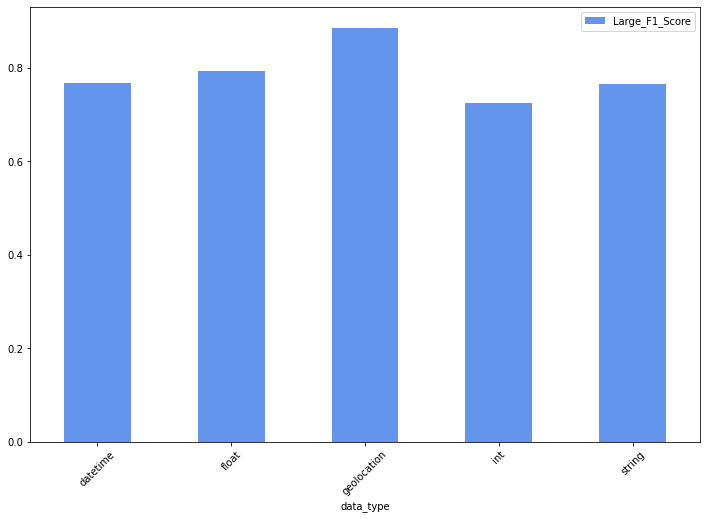

In [14]:
#plot different data type scores for large training set
f1_average_dt.plot(x='data_type', y='Large_F1_Score', kind='bar', figsize=(12,8), color='cornflowerblue')
plt.xticks(rotation=45)
plt.show()

In [14]:
#get all columns with datatype int (worst performing data type)
f1_scores_combined[f1_scores_combined['data_type']=='int']

,Columns_combined,Category,Column,per_type_instance,Small_F1_Score,Medium_F1_Score,Large_F1_Score,data_type
9,Book.numberofpages,Book,numberofpages,400000,0.5333,0.7381,0.8810,int
16,CreativeWork.commentcount,CreativeWork,commentcount,280000,0.7105,0.7714,0.9153,int
26,CreativeWork.interactioncount,CreativeWork,interactioncount,90000,0.7500,0.8000,0.8750,int
34,CreativeWork.version,CreativeWork,version,160000,0.3158,0.7586,0.8485,int
81,MusicAlbum.numtracks,MusicAlbum,numtracks,200000,0.4706,0.8182,0.8182,int
82,MusicAlbum.track,MusicAlbum,track,240000,0.6087,0.7755,0.8846,int
137,Product.gtin,Product,gtin,890000,0.0500,0.4056,0.4706,int
138,Product.gtin12,Product,gtin12,1810000,0.2109,0.4706,0.5707,int
139,Product.gtin13,Product,gtin13,3580000,0.5397,0.6402,0.7250,int
140,Product.gtin14,Product,gtin14,340000,0.0000,0.0526,0.2500,int


In [15]:
#get all columns with datatype geolocation (best performing data type)
f1_scores_combined[f1_scores_combined['data_type']=='geolocation']

,Columns_combined,Category,Column,per_type_instance,Small_F1_Score,Medium_F1_Score,Large_F1_Score,data_type
49,Hotel.geo,Hotel,geo,600000,0.6290,0.7273,0.8644,geolocation
64,LocalBusiness.geo,LocalBusiness,geo,1910000,0.8535,0.9128,0.9271,geolocation
115,Place.geo,Place,geo,1270000,0.8606,0.9106,0.9512,geolocation
136,Product.geo,Product,geo,140000,0.2857,0.5217,0.9032,geolocation
195,Restaurant.geo,Restaurant,geo,330000,0.5517,0.7647,0.7826,geolocation


In [15]:
# Get a series containing minimum value of each column
minValues = f1_average.min()
maxValues = f1_average.max()
print('Min & Max Values: ')
print(minValues)
print(maxValues)

Min & Max Values: 
Category               Book
Small_F1_Score       0.4244
Medium_F1_Score     0.52813
Large_F1_Score     0.626783
dtype: object
Category           TVEpisode
Small_F1_Score         0.762
Medium_F1_Score     0.841473
Large_F1_Score       0.94672
dtype: object


In [17]:
#find out what detailed columsn and data type the minimum or maximum columns usually entail
f1_scores_combined[f1_scores_combined['Category']=='Place']

,Columns_combined,Category,Column,per_type_instance,Small_F1_Score,Medium_F1_Score,Large_F1_Score,data_type
115,Place.geo,Place,geo,1270000,0.8606,0.9106,0.9512,geolocation
116,Place.name,Place,name,1250000,0.7137,0.8494,0.9641,string
117,Place.openinghoursspecification,Place,openinghoursspecification,140000,0.5455,0.7586,0.9630,string
118,Place.sameas,Place,sameas,240000,0.7018,0.7742,0.9057,string
119,Place.telephone,Place,telephone,1180000,0.8211,0.8720,0.9496,float


In [18]:
#find out what detailed columsn and data type the minimum or maximum columns usually entail
f1_scores_combined[f1_scores_combined['Category']=='CreativeWork']

,Columns_combined,Category,Column,per_type_instance,Small_F1_Score,Medium_F1_Score,Large_F1_Score,data_type
12,CreativeWork.aggregaterating,CreativeWork,aggregaterating,130000,0.6364,0.6667,0.7200,string
13,CreativeWork.alternativeheadline,CreativeWork,alternativeheadline,890000,0.2239,0.4260,0.5300,string
14,CreativeWork.articlebody,CreativeWork,articlebody,240000,0.4375,0.5946,0.7500,string
15,CreativeWork.author,CreativeWork,author,8170000,0.5979,0.6095,0.6961,string
16,CreativeWork.commentcount,CreativeWork,commentcount,280000,0.7105,0.7714,0.9153,int
17,CreativeWork.copyrightholder,CreativeWork,copyrightholder,120000,0.0000,0.2222,0.1333,string
18,CreativeWork.copyrightyear,CreativeWork,copyrightyear,130000,0.5185,0.6923,0.7692,datetime
19,CreativeWork.creator,CreativeWork,creator,80000,0.0000,0.0000,0.4000,string
20,CreativeWork.datecreated,CreativeWork,datecreated,1040000,0.3125,0.4885,0.4505,datetime
21,CreativeWork.datemodified,CreativeWork,datemodified,8100000,0.5374,0.5435,0.6687,datetime


In [19]:
#find out what detailed columsn and data type the minimum or maximum columns usually entail
f1_scores_combined[f1_scores_combined['Category']=='Recipe']

,Columns_combined,Category,Column,per_type_instance,Small_F1_Score,Medium_F1_Score,Large_F1_Score,data_type
168,Recipe.aggregaterating,Recipe,aggregaterating,2970000,0.9747,0.9882,0.9933,string
169,Recipe.author,Recipe,author,6200000,0.8971,0.9301,0.9519,string
170,Recipe.cookingmethod,Recipe,cookingmethod,250000,0.6154,0.8235,1.0000,string
171,Recipe.cooktime,Recipe,cooktime,5420000,0.6204,0.6973,0.8611,datetime
172,Recipe.datemodified,Recipe,datemodified,200000,0.0000,0.1481,0.4516,datetime
173,Recipe.datepublished,Recipe,datepublished,5320000,0.9617,0.9713,0.9614,datetime
174,Recipe.headline,Recipe,headline,140000,0.0000,0.0000,0.3077,string
175,Recipe.ingredients,Recipe,ingredients,1340000,0.5429,0.7037,0.7829,string
176,Recipe.ispartof,Recipe,ispartof,2390000,0.7921,0.8068,0.8305,string
177,Recipe.keywords,Recipe,keywords,3230000,0.7886,0.8632,0.8980,string


In [ ]:
#look at all columns with data type int (worst perfomring data type)
#find out what detailed columsn and data type the minimum or maximum columns usually entail
f1_scores_combined[f1_scores_combined['Category']=='CreativeWork']

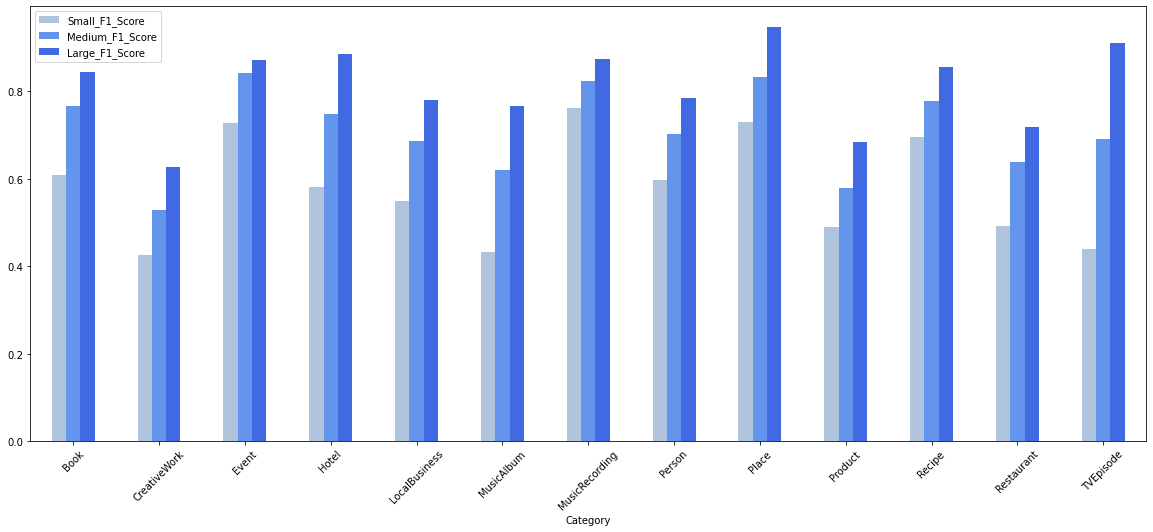

In [17]:
#plot F1 Score distribution per Category and different training set sizes
f1_average.plot(x='Category', y=['Small_F1_Score', 'Medium_F1_Score', 'Large_F1_Score'], kind='bar', figsize=(20,8), color=['lightsteelblue','cornflowerblue', 'royalblue'])
plt.xticks(rotation=45)
plt.show()

In [18]:
#get columns types with zero F1 Score for small train set
small_zero_scores = f1_scores_combined[f1_scores_combined['Small_F1_Score']==0.0]
small_zero_scores

,Columns_combined,Category,Column,per_type_instance,Small_F1_Score,Medium_F1_Score,Large_F1_Score,data_type
17,CreativeWork.copyrightholder,CreativeWork,copyrightholder,120000,0.0,0.2222,0.1333,string
19,CreativeWork.creator,CreativeWork,creator,80000,0.0,0.0000,0.4000,string
23,CreativeWork.genre,CreativeWork,genre,180000,0.0,0.0526,0.3415,string
29,CreativeWork.keywords,CreativeWork,keywords,120000,0.0,0.1429,0.5263,string
32,CreativeWork.offers,CreativeWork,offers,100000,0.0,0.1667,0.1538,string
63,LocalBusiness.founder,LocalBusiness,founder,20000,0.0,0.0000,0.0000,string
71,LocalBusiness.owns,LocalBusiness,owns,1,0.0,0.0000,0.0000,string
94,Person.birthplace,Person,birthplace,140000,0.0,0.3810,0.6154,string
99,Person.faxnumber,Person,faxnumber,230000,0.0,0.1481,0.7083,float
106,Person.mainentityofpage,Person,mainentityofpage,40000,0.0,0.0000,0.0000,string


In [19]:
medium_zero_scores = f1_scores_combined[f1_scores_combined['Medium_F1_Score']==0.0]
medium_zero_scores

,Columns_combined,Category,Column,per_type_instance,Small_F1_Score,Medium_F1_Score,Large_F1_Score,data_type
19,CreativeWork.creator,CreativeWork,creator,80000,0.0,0.0,0.4000,string
63,LocalBusiness.founder,LocalBusiness,founder,20000,0.0,0.0,0.0000,string
71,LocalBusiness.owns,LocalBusiness,owns,1,0.0,0.0,0.0000,string
106,Person.mainentityofpage,Person,mainentityofpage,40000,0.0,0.0,0.0000,string
123,Product.alternatename,Product,alternatename,200000,0.0,0.0,0.3684,string
133,Product.datepublished,Product,datepublished,80000,0.0,0.0,0.1600,datetime
135,Product.disambiguatingdescription,Product,disambiguatingdescription,110000,0.0,0.0,0.2000,string
147,Product.itemlistelement,Product,itemlistelement,20000,0.0,0.0,0.6667,string
154,Product.offerdetails,Product,offerdetails,30000,0.0,0.0,0.0000,string
162,Product.reviews,Product,reviews,40000,0.0,0.0,0.0000,string


In [20]:
#get columns types with zero F1 Score for largest train set
large_zero_scores = f1_scores_combined[f1_scores_combined['Large_F1_Score']==0.0]
large_zero_scores

,Columns_combined,Category,Column,per_type_instance,Small_F1_Score,Medium_F1_Score,Large_F1_Score,data_type
63,LocalBusiness.founder,LocalBusiness,founder,20000,0.0,0.0,0.0,string
71,LocalBusiness.owns,LocalBusiness,owns,1,0.0,0.0,0.0,string
106,Person.mainentityofpage,Person,mainentityofpage,40000,0.0,0.0,0.0,string
154,Product.offerdetails,Product,offerdetails,30000,0.0,0.0,0.0,string
162,Product.reviews,Product,reviews,40000,0.0,0.0,0.0,string
197,Restaurant.menu,Restaurant,menu,20000,0.0,0.0,0.0,string


In [21]:
#get statistics of large train set
large_train = pd.read_csv('../../../src/data/schemafiltereddata/large_tables_more_than_20.csv')
large_train

,Unnamed: 0,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,...,Restaurant_menu,Restaurant_name,Restaurant_openinghours,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries
0,0,Book_12min.com_September2020.json.gz,Book,366.0,9.0,5.0,166,0.286885,0.090710,830.0,...,0,0,0,0,0,0,0,0,0,0
1,1,Book_19shuwu.com_September2020.json.gz,Book,250.0,8.0,5.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,Book_1carpetcleaning.co.uk_September2020.json.gz,Book,1004.0,12.0,9.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,Book_2014brazil.co.uk_September2020.json.gz,Book,387.0,11.0,9.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,Book_24symbols.com_September2020.json.gz,Book,5171.0,8.0,5.0,17,0.001740,0.000658,85.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15753,15753,TVEpisode_usanetwork.com_September2020.json.gz,TVEpisode,306.0,12.0,3.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,1,1,1
15754,15754,TVEpisode_vh1.com_September2020.json.gz,TVEpisode,1448.0,9.0,3.0,8,0.005525,0.001842,24.0,...,0,0,0,0,0,0,0,1,1,1
15755,15755,TVEpisode_wikidex.net_September2020.json.gz,TVEpisode,504.0,9.0,2.0,34,0.067460,0.033730,68.0,...,0,0,0,0,0,0,0,0,1,1
15756,15756,TVEpisode_wliw.org_September2020.json.gz,TVEpisode,961.0,14.0,2.0,147,0.152966,0.076483,294.0,...,0,0,0,0,0,0,0,1,1,0


In [22]:
#match large train set with error list to find files and columns that showed errors during evaluation
large_train = large_train[large_train['filename'].isin(large_errors)]
large_train

,Unnamed: 0,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,...,Restaurant_menu,Restaurant_name,Restaurant_openinghours,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries
7,7,Book_4thestate.co.uk_September2020.json.gz,Book,1336.0,10.0,6.0,523,0.391467,0.065245,3138.0,...,0,0,0,0,0,0,0,0,0,0
19,19,Book_alexanderstreet.com_September2020.json.gz,Book,197.0,11.0,5.0,146,0.446701,0.148223,730.0,...,0,0,0,0,0,0,0,0,0,0
25,25,Book_arcadiapublishing.com_September2020.json.gz,Book,3199.0,11.0,8.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
50,50,Book_benjamins.com_September2020.json.gz,Book,1795.0,14.0,8.0,2363,0.431755,0.164554,18904.0,...,0,0,0,0,0,0,0,0,0,0
55,55,Book_biodiversitylibrary.org_September2020.jso...,Book,1515.0,13.0,6.0,169,0.038284,0.018592,1014.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15697,15697,TVEpisode_grnrngr.com_September2020.json.gz,TVEpisode,910.0,7.0,3.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,1,1,1
15707,15707,TVEpisode_moviesbeast.com_September2020.json.gz,TVEpisode,1023.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,1
15722,15722,TVEpisode_pogdesign.co.uk_September2020.json.gz,TVEpisode,3638.0,7.0,3.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,1,1,1
15724,15724,TVEpisode_putlockerapp.com_September2020.json.gz,TVEpisode,962.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,1


In [23]:
book_errors = large_train[(large_train['Class']=='Book') & (large_train['Book_aggregaterating']==1)]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
book_errors

,Unnamed: 0,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,Book_bookedition,Book_bookformat,Book_datepublished,Book_genre,Book_inlanguage,Book_isbn,Book_name,Book_numberofpages,Book_offers,Book_publisher,CreativeWork_aggregaterating,CreativeWork_alternativeheadline,CreativeWork_articlebody,CreativeWork_author,CreativeWork_commentcount,CreativeWork_copyrightholder,CreativeWork_copyrightyear,CreativeWork_creator,CreativeWork_datecreated,CreativeWork_datemodified,CreativeWork_datepublished,CreativeWork_genre,CreativeWork_headline,CreativeWork_inlanguage,CreativeWork_interactioncount,CreativeWork_interactionstatistic,CreativeWork_interactiontype,CreativeWork_keywords,CreativeWork_mainentityofpage,CreativeWork_name,CreativeWork_offers,CreativeWork_publisher,CreativeWork_version,Event_doortime,Event_duration,Event_enddate,Event_eventattendancemode,Event_eventstatus,Event_location,Event_name,Event_organizer,Event_performer,Event_performers,Event_typicalagerange,Hotel_address,Hotel_aggregaterating,Hotel_email,Hotel_geo,Hotel_name,Hotel_pricerange,Hotel_starrating,Hotel_telephone,LocalBusiness_address,LocalBusiness_addresslocality,LocalBusiness_addressregion,LocalBusiness_aggregaterating,LocalBusiness_areaserved,LocalBusiness_citystatezip,LocalBusiness_contactpoint,LocalBusiness_email,LocalBusiness_faxnumber,LocalBusiness_geo,LocalBusiness_hasmap,LocalBusiness_legalname,LocalBusiness_location,LocalBusiness_name,LocalBusiness_openinghours,LocalBusiness_openinghoursspecification,LocalBusiness_paymentaccepted,LocalBusiness_postalcode,LocalBusiness_pricerange,LocalBusiness_review,LocalBusiness_sameas,LocalBusiness_streetaddress,LocalBusiness_telephone,MusicAlbum_byartist,MusicAlbum_name,MusicAlbum_numtracks,MusicAlbum_track,MusicRecording_byartist,MusicRecording_datecreated,MusicRecording_datepublished,MusicRecording_duration,MusicRecording_genre,MusicRecording_inalbum,MusicRecording_name,Person_additionalname,Person_address,Person_affiliation,Person_birthdate,Person_birthplace,Person_contactpoint,Person_deathdate,Person_email,Person_familyname,Person_faxnumber,Person_gender,Person_givenname,Person_height,Person_homelocation,Person_jobtitle,Person_knowslanguage,Person_makesoffer,Person_memberof,Person_nationality,Person_sameas,Person_telephone,Person_weight,Person_worklocation,Person_worksfor,Place_geo,Place_name,Place_openinghoursspecification,Place_sameas,Place_telephone,Product_additionalproperty,Product_address,Product_aggregaterating,Product_alternatename,Product_audience,Product_author,Product_availability,Product_bestrating,Product_brand,Product_breadcrumb,Product_category,Product_color,Product_condition,Product_datepublished,Product_depth,Product_disambiguatingdescription,Product_geo,Product_gtin,Product_gtin12,Product_gtin13,Product_gtin14,Product_gtin8,Product_height,Product_identifier,Product_isrelatedto,Product_issimilarto,Product_itemcondition,Product_mainentityofpage,Product_manufacturer,Product_material,Product_model,Product_mpn,Product_name,Product_offers,Product_price,Product_pricecurrency,Product_ratingvalue,Product_releasedate,Product_review,Product_reviewcount,Product_reviews,Product_shop-currency,Product_title,Product_weight,Product_width,Product_worstrating,Recipe_aggregaterating,Recipe_author,Recipe_cookingmethod,Recipe_cooktime,Recipe_datemodified,Recipe_datepublished,Recipe_headline,Recipe_ingredients,Recipe_ispartof,Recipe_keywords,Recipe_mainentityofpage,Recipe_name,Recipe_nutrition,Recipe_performtime,Recipe_preptime,Recipe_publisher,Recipe_recipecategory,Recipe_recipecuisine,Recipe_recipeingredient,Recipe_recipeinstructions,Recipe_recipeyield,Recipe_review,Recipe_suitablefordiet,Recipe_totaltime,Restaurant_acceptsreservations,Restaurant_address,Restaurant_aggregaterating,Restaurant_geo,Restaurant_hasmenu,Restaurant_menu,Restaurant_name,Restaurant_openinghours,Restaurant_openinghoursspecification,Restaurant_pri

In [ ]:
#get small train set & match with error list
small_train = pd.read_csv('../../../src/data/schemafiltereddata/small_tables_more_than_20.csv')
small_train = small_train[small_train['filename'].isin(large_errors)]
small_train

In [25]:
#get book errors within small train set
sm_book_errors = small_train[(small_train['Class']=='Book') & (small_train['Book_aggregaterating']==1)]
sm_book_errors

,Unnamed: 0,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,Book_bookedition,Book_bookformat,Book_datepublished,Book_genre,Book_inlanguage,Book_isbn,Book_name,Book_numberofpages,Book_offers,Book_publisher,CreativeWork_aggregaterating,CreativeWork_alternativeheadline,CreativeWork_articlebody,CreativeWork_author,CreativeWork_commentcount,CreativeWork_copyrightholder,CreativeWork_copyrightyear,CreativeWork_creator,CreativeWork_datecreated,CreativeWork_datemodified,CreativeWork_datepublished,CreativeWork_genre,CreativeWork_headline,CreativeWork_inlanguage,CreativeWork_interactioncount,CreativeWork_interactionstatistic,CreativeWork_interactiontype,CreativeWork_keywords,CreativeWork_mainentityofpage,CreativeWork_name,CreativeWork_offers,CreativeWork_publisher,CreativeWork_version,Event_doortime,Event_duration,Event_enddate,Event_eventattendancemode,Event_eventstatus,Event_location,Event_name,Event_organizer,Event_performer,Event_performers,Event_typicalagerange,Hotel_address,Hotel_aggregaterating,Hotel_email,Hotel_geo,Hotel_name,Hotel_pricerange,Hotel_starrating,Hotel_telephone,LocalBusiness_address,LocalBusiness_addresslocality,LocalBusiness_addressregion,LocalBusiness_aggregaterating,LocalBusiness_areaserved,LocalBusiness_citystatezip,LocalBusiness_contactpoint,LocalBusiness_email,LocalBusiness_faxnumber,LocalBusiness_geo,LocalBusiness_hasmap,LocalBusiness_legalname,LocalBusiness_location,LocalBusiness_name,LocalBusiness_openinghours,LocalBusiness_openinghoursspecification,LocalBusiness_paymentaccepted,LocalBusiness_postalcode,LocalBusiness_pricerange,LocalBusiness_review,LocalBusiness_sameas,LocalBusiness_streetaddress,LocalBusiness_telephone,MusicAlbum_byartist,MusicAlbum_name,MusicAlbum_numtracks,MusicAlbum_track,MusicRecording_byartist,MusicRecording_datecreated,MusicRecording_datepublished,MusicRecording_duration,MusicRecording_genre,MusicRecording_inalbum,MusicRecording_name,Person_additionalname,Person_address,Person_affiliation,Person_birthdate,Person_birthplace,Person_contactpoint,Person_deathdate,Person_email,Person_familyname,Person_faxnumber,Person_gender,Person_givenname,Person_height,Person_homelocation,Person_jobtitle,Person_knowslanguage,Person_makesoffer,Person_memberof,Person_nationality,Person_sameas,Person_telephone,Person_weight,Person_worklocation,Person_worksfor,Place_geo,Place_name,Place_openinghoursspecification,Place_sameas,Place_telephone,Product_additionalproperty,Product_address,Product_aggregaterating,Product_alternatename,Product_audience,Product_author,Product_availability,Product_bestrating,Product_brand,Product_breadcrumb,Product_category,Product_color,Product_condition,Product_datepublished,Product_depth,Product_disambiguatingdescription,Product_geo,Product_gtin,Product_gtin12,Product_gtin13,Product_gtin14,Product_gtin8,Product_height,Product_identifier,Product_isrelatedto,Product_issimilarto,Product_itemcondition,Product_mainentityofpage,Product_manufacturer,Product_material,Product_model,Product_mpn,Product_name,Product_offers,Product_price,Product_pricecurrency,Product_ratingvalue,Product_releasedate,Product_review,Product_reviewcount,Product_reviews,Product_shop-currency,Product_title,Product_weight,Product_width,Product_worstrating,Recipe_aggregaterating,Recipe_author,Recipe_cookingmethod,Recipe_cooktime,Recipe_datemodified,Recipe_datepublished,Recipe_headline,Recipe_ingredients,Recipe_ispartof,Recipe_keywords,Recipe_mainentityofpage,Recipe_name,Recipe_nutrition,Recipe_performtime,Recipe_preptime,Recipe_publisher,Recipe_recipecategory,Recipe_recipecuisine,Recipe_recipeingredient,Recipe_recipeinstructions,Recipe_recipeyield,Recipe_review,Recipe_suitablefordiet,Recipe_totaltime,Restaurant_acceptsreservations,Restaurant_address,Restaurant_aggregaterating,Restaurant_geo,Restaurant_hasmenu,Restaurant_menu,Restaurant_name,Restaurant_openinghours,Restaurant_openinghoursspecification,Restaurant_pri

### Get more infos on Product gtin scores - do they often occur in combination?

In [3]:
# get more infos on amount of columns within test tables to see whether there is lots of context
test_set = pd.read_csv('../../../src/data/schemafiltereddata/TrainTestTables/Test/8912_test_cleaned.csv')
test_set

,Unnamed: 0,index,Unnamed: 0.1,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
0,0,1,7,Book_4thestate.co.uk_September2020.json.gz,Book,1336.0,10.0,6.0,523,0.391467,...,0,0,0,0,0,0,0,0.0,0.0,1.0
1,1,3,21,Book_alexanderstreet.com_September2020.json.gz,Book,197.0,11.0,5.0,146,0.446701,...,0,0,0,0,0,0,0,0.0,0.0,1.0
2,2,4,28,Book_apress.com_September2020.json.gz,Book,399.0,8.0,5.0,124,0.308271,...,0,0,0,0,0,0,0,0.0,0.0,1.0
3,3,5,29,Book_arcadiapublishing.com_September2020.json.gz,Book,3199.0,11.0,8.0,0,0.000000,...,0,0,0,0,0,0,0,0.0,0.0,1.0
4,4,6,37,Book_atlantavintagebooks.com_September2020.jso...,Book,401.0,8.0,5.0,313,0.478803,...,0,0,0,0,0,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,8907,9749,54164,TVEpisode_tvxx1.com_September2020.json.gz,TVEpisode,32.0,7.0,2.0,0,0.000000,...,0,0,0,0,0,1,1,1.0,0.0,0.0
8908,8908,9751,54174,TVEpisode_votenova.org_September2020.json.gz,TVEpisode,55.0,9.0,2.0,0,0.000000,...,0,0,0,0,0,1,1,0.0,1.0,0.0
8909,8909,9752,54176,TVEpisode_watermarkthefilm.com_September2020.j...,TVEpisode,40.0,9.0,2.0,0,0.000000,...,0,0,0,0,0,1,1,1.0,0.0,0.0
8910,8910,9753,54182,TVEpisode_ww2d.org_September2020.json.gz,TVEpisode,54.0,8.0,2.0,0,0.000000,...,0,0,0,0,0,1,1,0.0,1.0,0.0


In [12]:
#check whether product gtins are individually represented or often in the same table
test_set[(test_set['Product_gtin12']==1) & (test_set['Product_gtin']==1)]

,Unnamed: 0,index,Unnamed: 0.1,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
4425,4425,4816,26660,Product_amoils.com_September2020.json.gz,Product,25.0,11.0,7.0,1,0.040000,...,0,0,0,0,0,0,0,1.0,0.0,0.0
4473,4473,4867,26910,Product_aquadesign.com_September2020.json.gz,Product,67.0,13.0,8.0,87,0.343284,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4623,4623,5035,27846,Product_beardowear.com_September2020.json.gz,Product,23.0,12.0,7.0,11,0.217391,...,0,0,0,0,0,0,0,1.0,0.0,0.0
4808,4808,5233,29032,Product_bulluna.com_September2020.json.gz,Product,1032.0,12.0,7.0,231,0.223837,...,0,0,0,0,0,0,0,0.0,0.0,1.0
4996,4996,5436,30059,Product_chubbiesshorts.com_September2020.json.gz,Product,741.0,13.0,8.0,148,0.157895,...,0,0,0,0,0,0,0,0.0,0.0,1.0
5801,5801,6329,34998,Product_hardwareandtools.com_September2020.jso...,Product,2771.0,10.0,5.0,0,0.000000,...,0,0,0,0,0,0,0,0.0,0.0,1.0
6383,6383,6975,38360,Product_mad-canada.com_September2020.json.gz,Product,305.0,9.0,5.0,288,0.472131,...,0,0,0,0,0,0,0,0.0,0.0,1.0
6386,6386,6978,38370,Product_maddesigngroup.com_September2020.json.gz,Product,392.0,9.0,5.0,368,0.469388,...,0,0,0,0,0,0,0,0.0,0.0,1.0
6659,6659,7276,40136,Product_nanny-annie.com_September2020.json.gz,Product,223.0,9.0,5.0,2,0.008969,...,0,0,0,0,0,0,0,0.0,0.0,1.0
6895,6895,7540,41715,Product_phillgrovereviews.com_September2020.js...,Product,27.0,31.0,20.0,0,0.000000,...,0,0,0,0,0,0,0,1.0,0.0,0.0


In [18]:
# get more infos on amount of columns within large train tables to see whether there is lots of context
large_train = pd.read_csv('../../../src/data/schemafiltereddata/TrainTestTables/Large/Training_Files.csv')
large_train

,Unnamed: 0,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
0,0,Book_12min.com_September2020.json.gz,Book,366.0,9.0,5.0,166,0.286885,0.090710,830.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
1,2,Book_1carpetcleaning.co.uk_September2020.json.gz,Book,1004.0,12.0,9.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
2,3,Book_2014brazil.co.uk_September2020.json.gz,Book,387.0,11.0,9.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
3,4,Book_24symbols.com_September2020.json.gz,Book,5171.0,8.0,5.0,17,0.001740,0.000658,85.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
4,5,Book_2d-market.com_September2020.json.gz,Book,262.0,19.0,7.0,76,0.129771,0.041439,532.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44430,54184,TVEpisode_yahooboard.net_September2020.json.gz,TVEpisode,55.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,0.0,1.0,0.0
44431,54185,TVEpisode_yara-online.org_September2020.json.gz,TVEpisode,40.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,1.0,0.0,0.0
44432,54186,TVEpisode_yesmoviess.com_September2020.json.gz,TVEpisode,37.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,1.0,0.0,0.0
44433,54187,TVEpisode_zazangels.com_September2020.json.gz,TVEpisode,38.0,8.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,1.0,0.0,0.0


In [21]:
#check whether product gtins are individually represented or often in the same table
large_train[(large_train['Product_gtin12']==1) & (large_train['Product_gtin']==1)]

,Unnamed: 0,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
21362,26068,Product_act-machinery.com_September2020.json.gz,Product,630.0,14.0,9.0,264,0.328571,0.046561,2376.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
21597,26352,Product_alchemyfinehome.com_September2020.json.gz,Product,33.0,13.0,7.0,17,0.333333,0.073593,119.0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
21848,26666,Product_ampro-online.com_September2020.json.gz,Product,388.0,10.0,6.0,4,0.010309,0.001718,24.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
21849,26667,Product_amputeestore.com_September2020.json.gz,Product,131.0,13.0,8.0,117,0.465649,0.111641,936.0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
22041,26906,Product_aqoutdoors.com_September2020.json.gz,Product,248.0,12.0,7.0,200,0.326613,0.115207,1400.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
22181,27083,Product_artisticofficeproducts.com_September20...,Product,96.0,12.0,7.0,4,0.041667,0.005952,28.0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
22793,27819,Product_beachgoer.com_September2020.json.gz,Product,55.0,9.0,5.0,54,0.490909,0.196364,270.0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
22825,27868,Product_beautybio.com_September2020.json.gz,Product,169.0,13.0,7.0,73,0.213018,0.061708,511.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
22892,27953,Product_bellabohemian.com_September2020.json.gz,Product,164.0,12.0,7.0,2,0.006098,0.001742,14.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
23865,29117,Product_buybrakes.com_September2020.json.gz,Product,1588.0,12.0,8.0,664,0.137909,0.052267,5312.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0


### Get infos on average columns of specific tables

In [33]:
# get more infos on amount of columns within large train tables to see whether there is lots of context
large_train = pd.read_csv('../../../src/data/schemafiltereddata/TrainTestTables/Large/Training_Files.csv')
large_train

,Unnamed: 0,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
0,0,Book_12min.com_September2020.json.gz,Book,366.0,9.0,5.0,166,0.286885,0.090710,830.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
1,2,Book_1carpetcleaning.co.uk_September2020.json.gz,Book,1004.0,12.0,9.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
2,3,Book_2014brazil.co.uk_September2020.json.gz,Book,387.0,11.0,9.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
3,4,Book_24symbols.com_September2020.json.gz,Book,5171.0,8.0,5.0,17,0.001740,0.000658,85.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
4,5,Book_2d-market.com_September2020.json.gz,Book,262.0,19.0,7.0,76,0.129771,0.041439,532.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44430,54184,TVEpisode_yahooboard.net_September2020.json.gz,TVEpisode,55.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,0.0,1.0,0.0
44431,54185,TVEpisode_yara-online.org_September2020.json.gz,TVEpisode,40.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,1.0,0.0,0.0
44432,54186,TVEpisode_yesmoviess.com_September2020.json.gz,TVEpisode,37.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,1.0,0.0,0.0
44433,54187,TVEpisode_zazangels.com_September2020.json.gz,TVEpisode,38.0,8.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,1.0,0.0,0.0


In [34]:
#how many columns do hotel tables with the column address have on average
hotel = large_train[large_train['Hotel_address']==1]
hotel.describe()

,Unnamed: 0,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.0,663.0,...,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.000000,663.000000,663.000000
mean,11448.019608,430.138763,8.191554,4.348416,82.380090,0.082113,0.022608,428.986425,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.325792,0.383107,0.291101
std,245.788929,1781.254079,2.273143,1.044707,498.318723,0.124851,0.036135,2709.321328,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469024,0.486511,0.454613
min,11020.000000,21.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,11239.000000,33.000000,7.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,11455.000000,66.000000,8.000000,4.000000,1.000000,0.012987,0.003521,4.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,11657.500000,219.500000,9.000000,5.000000,12.000000,0.118979,0.032923,58.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000
max,11872.000000,31890.000000,18.000000,8.000000,7270.000000,0.496851,0.205479,37896.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [61]:
#how many columns do LB tables with the column address & hasmap have on average
#LB = large_train[large_train['LocalBusiness_address']==1]
LB = large_train[large_train['LocalBusiness_hasmap']==1]
LB.describe()

,Unnamed: 0,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.0,...,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.000000,85.000000,85.000000
mean,13203.400000,704.635294,9.894118,5.811765,257.952941,0.218656,0.101918,1362.776471,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188235,0.235294,0.576471
std,775.715326,3158.123338,1.945835,1.384387,356.986258,0.192206,0.097426,2229.602022,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.393220,0.426700,0.497050
min,11885.000000,22.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,12445.000000,48.000000,9.000000,5.000000,1.000000,0.007874,0.000893,5.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,13386.000000,345.000000,9.000000,5.000000,103.000000,0.322835,0.090909,618.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000
75%,13815.000000,517.000000,10.000000,6.000000,476.000000,0.399676,0.198344,2380.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000
max,14533.000000,28992.000000,17.000000,11.000000,2615.000000,0.485294,0.256863,18305.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [38]:
#how many columns do person tables with the column address & weight have on average
#person= large_train[large_train['Person_address']==1]
person= large_train[large_train['Person_weight']==1]
person.describe()

,Unnamed: 0,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.0,320.0,...,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.000000,320.000000,320.000000
mean,22856.990625,411.087500,9.734375,6.615625,166.562500,0.273119,0.058415,1219.121875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.325000,0.550000
std,1186.288127,1056.304298,1.933391,1.950582,502.044237,0.179978,0.042428,3616.512428,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.331237,0.469108,0.498273
min,20928.000000,22.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,21642.500000,68.750000,8.000000,5.000000,13.000000,0.052637,0.022140,71.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,22949.500000,185.500000,11.000000,8.000000,72.000000,0.357817,0.067994,522.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000
75%,23998.250000,392.500000,11.000000,8.000000,177.250000,0.426597,0.080183,1356.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000
max,24769.000000,16154.000000,13.000000,9.000000,6428.000000,0.492537,0.250000,51424.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [46]:
#how many columns do product tables with the column title, availability & bestrating have on average
#product= large_train[large_train['Product_title']==1]
#product= large_train[large_train['Product_availability']==1]
product= large_train[large_train['Product_bestrating']==1]
product.describe()

,Unnamed: 0,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
count,174.000000,174.000000,174.00000,174.000000,174.000000,174.000000,174.000000,174.000000,174.0,174.0,...,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.000000,174.000000,174.000000
mean,37813.459770,383.431034,10.83908,6.741379,170.431034,0.185168,0.095617,1132.936782,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212644,0.402299,0.385057
std,7130.722211,1321.408350,1.53475,1.171339,461.917646,0.152682,0.093173,2889.819810,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.410359,0.491777,0.488013
min,25951.000000,21.000000,7.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,31306.500000,46.000000,10.00000,6.000000,8.000000,0.043478,0.010045,64.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,38628.000000,112.000000,11.00000,6.000000,40.000000,0.166538,0.065200,256.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,43901.250000,342.250000,12.00000,8.000000,120.000000,0.323983,0.168025,779.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000
max,49101.000000,16339.000000,16.00000,10.000000,4041.000000,0.496753,0.298851,23009.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [60]:
#how many columns do recipe tables with the column total time & mainentityofpagehave on average
#recipe= large_train[large_train['Recipe_totaltime']==1]
recipe= large_train[large_train['Recipe_mainentityofpage']==1]
recipe.describe()

,Unnamed: 0,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
count,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.0,1136.0,...,1136.0,1136.0,1136.0,1136.0,1136.0,1136.0,1136.0,1136.000000,1136.000000,1136.000000
mean,51489.904049,130.780810,17.346831,14.201585,98.392606,0.270041,0.051446,1516.607394,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240317,0.501761,0.257923
std,1239.880221,146.825337,3.060239,2.805727,160.781207,0.141155,0.042775,2599.958756,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.427464,0.500217,0.437684
min,49266.000000,21.000000,8.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,50437.750000,41.000000,16.000000,13.000000,19.000000,0.167904,0.020578,259.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,51488.500000,83.000000,18.000000,15.000000,44.000000,0.271132,0.040174,653.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
75%,52620.250000,163.250000,19.000000,16.000000,109.250000,0.391105,0.071327,1713.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000
max,53550.000000,2063.000000,24.000000,19.000000,2140.000000,0.497797,0.293447,36380.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [59]:
#how many columns do CW tables with the column version & copyrightholder have on average
#CW= large_train[large_train['CreativeWork_version']==1]
CW= large_train[large_train['CreativeWork_copyrightholder']==1]
CW.describe()

,Unnamed: 0,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.0,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.000000,52.000000,52.000000
mean,3101.807692,458.692308,12.442308,8.596154,10.576923,0.007419,0.001395,56.115385,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.461538,0.384615,0.153846
std,1367.349462,1964.775830,2.420610,2.107499,70.106738,0.032527,0.004654,350.571615,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.503382,0.491251,0.364321
min,730.000000,11.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1777.750000,24.750000,11.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,3189.000000,55.500000,11.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,4261.500000,108.750000,13.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000
max,5372.000000,13578.000000,17.000000,12.000000,506.000000,0.230769,0.028846,2530.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [44]:
#how many columns do restaurant tables with the column acceptsreservation have on average
restaurant= large_train[large_train['Restaurant_acceptsreservations']==1]
restaurant.describe()

,Unnamed: 0,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.0,...,76.000000,76.000000,76.000000,76.0,76.0,76.0,76.0,76.000000,76.000000,76.000000
mean,53808.302632,222.605263,12.342105,8.986842,86.302632,0.185764,0.025726,789.118421,0.0,0.0,...,0.328947,0.973684,0.986842,1.0,0.0,0.0,0.0,0.473684,0.447368,0.078947
std,98.404068,955.721830,1.195019,0.824515,385.073881,0.161941,0.036104,3725.248459,0.0,0.0,...,0.472953,0.161136,0.114708,0.0,0.0,0.0,0.0,0.502625,0.500526,0.271448
min,53638.000000,21.000000,8.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,53712.750000,29.000000,12.000000,9.000000,4.000000,0.081633,0.009589,36.000000,0.0,0.0,...,0.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,53835.000000,44.500000,12.000000,9.000000,7.000000,0.120467,0.014709,63.000000,0.0,0.0,...,0.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,53889.250000,68.750000,13.000000,9.000000,11.250000,0.379310,0.041571,103.500000,0.0,0.0,...,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,1.000000,1.000000,0.000000
max,53991.000000,7913.000000,17.000000,10.000000,2899.000000,0.482759,0.289385,28990.000000,0.0,0.0,...,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [63]:
#how many columns do book tables with the column bookformat & genre have on average
#book= large_train[large_train['Book_bookformat']==1]
book= large_train[large_train['Book_genre']==1]
book.describe()

,Unnamed: 0,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,...,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.000000,139.000000,139.000000
mean,306.971223,1376.827338,10.812950,6.611511,590.100719,0.164378,0.042349,4342.949640,0.043165,0.971223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100719,0.237410,0.661871
std,168.380304,2293.411578,1.692132,1.182669,1021.112645,0.163407,0.051253,8079.378932,0.203964,0.167784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.302045,0.427034,0.474784
min,5.000000,21.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,181.000000,91.500000,10.000000,6.000000,2.000000,0.013173,0.002403,12.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,282.000000,425.000000,11.000000,7.000000,42.000000,0.112360,0.022321,246.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000
75%,409.500000,1610.500000,12.000000,7.000000,936.000000,0.299091,0.065722,6653.500000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000
max,655.000000,14521.000000,19.000000,10.000000,5175.000000,0.499671,0.277363,46575.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [64]:
#how many columns do MR tables with the column genre have on average
MR= large_train[large_train['MusicRecording_genre']==1]
MR.describe()

,Unnamed: 0,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,Book_author,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.0,...,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.000000,77.000000,77.000000
mean,18320.155844,830.207792,7.792208,4.064935,317.935065,0.070024,0.024726,1301.324675,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.532468,0.155844,0.311688
std,1678.262448,3403.469249,1.649064,0.546223,1837.643094,0.120683,0.048000,7352.026812,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.502217,0.365086,0.466221
min,14798.000000,10.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,16937.000000,13.000000,7.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,18600.000000,35.000000,7.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
75%,19613.000000,417.000000,9.000000,4.000000,22.000000,0.077342,0.031250,105.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000
max,20925.000000,28638.000000,14.000000,5.000000,15716.000000,0.485714,0.292857,62864.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000
